# PROJECT:FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile as zip
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"D:\Simpli Learn\Projects\PYTHON\Project_Dataset_Feature_Engineering\PEP1.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### 1. Understand the dataset:

#### a] Identify the shape of the dataset

In [3]:
df.shape

(1460, 81)

#### b] Identify variables with null values

In [4]:
df_nulls=pd.DataFrame(df.isnull().sum(),columns=['Nulls'])

In [5]:
df_nulls=df_nulls[df_nulls.Nulls!=0]

In [6]:
df_nulls

Nulls
LotFrontage     259
Alley          1369
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
PoolQC         1453
Fence          1179
MiscFeature    1406

#### c] Identify variables with unique values

In [7]:
for cols in df.columns:
    print(cols,":")
    print(df[cols].value_counts())
    print('#'*75)


Id :
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
###########################################################################
MSSubClass :
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
###########################################################################
MSZoning :
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
###########################################################################
LotFrontage :
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
###########################################################################
LotArea :
720

In [8]:
for cols in df.columns:
    print(cols,":")
    print(df[cols].unique())
    print('#'*75)


Id :
[   1    2    3 ... 1458 1459 1460]
###########################################################################
MSSubClass :
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
###########################################################################
MSZoning :
['RL' 'RM' 'C (all)' 'FV' 'RH']
###########################################################################
LotFrontage :
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
###################################

### 2. Generate a separate dataset for numerical and categorical variables

In [9]:
numeric_df=df.select_dtypes(include=[np.number])
numeric_df_columns=numeric_df.columns

In [10]:
numeric_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [11]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
categorical_df=df.select_dtypes(exclude=[np.number])
categorical_df_columns=categorical_df.columns

In [13]:
categorical_df

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458          mes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [14]:
categorical_df_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### 3.	EDA of numerical variables:

#### a.	Missing value treatment

In [15]:
numeric_df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchebvGr         0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
numeric_df.LotFrontage.fillna(numeric_df.LotFrontage.median(),inplace=True)
numeric_df.GarageYrBlt.fillna(numeric_df.GarageYrBlt.median(),inplace=True)
numeric_df.MasVnrArea.fillna(numeric_df.MasVnrArea.median(),inplace=True)

In [17]:
numeric_df.isna().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

### b. Identify the skewness and distribution

In [18]:
 numeric_df.shape

(1460, 38)

In [19]:

numeric_df.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.409147
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.678333
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

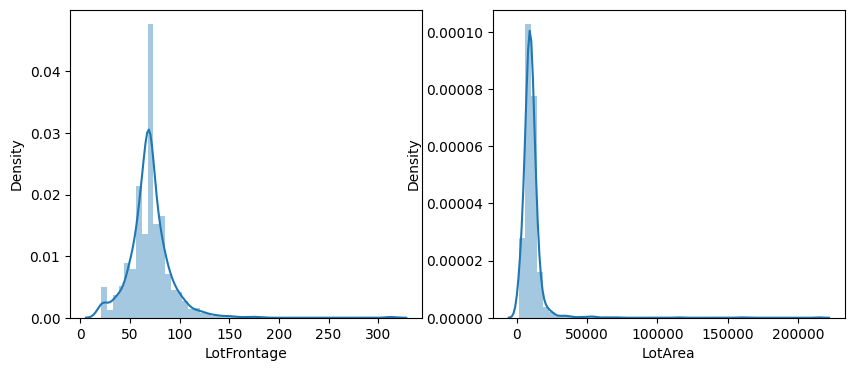

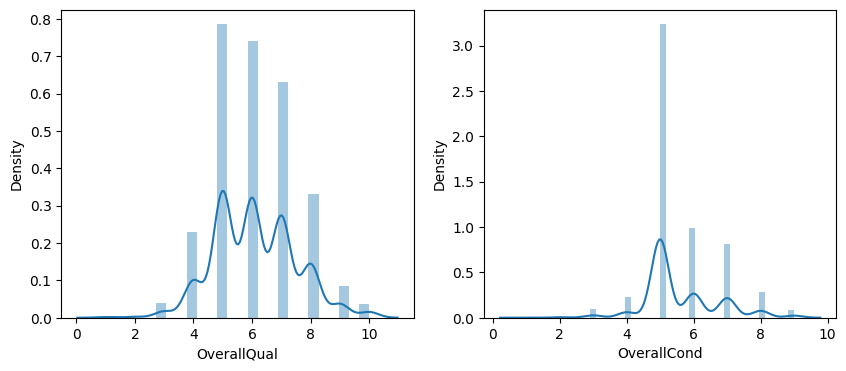

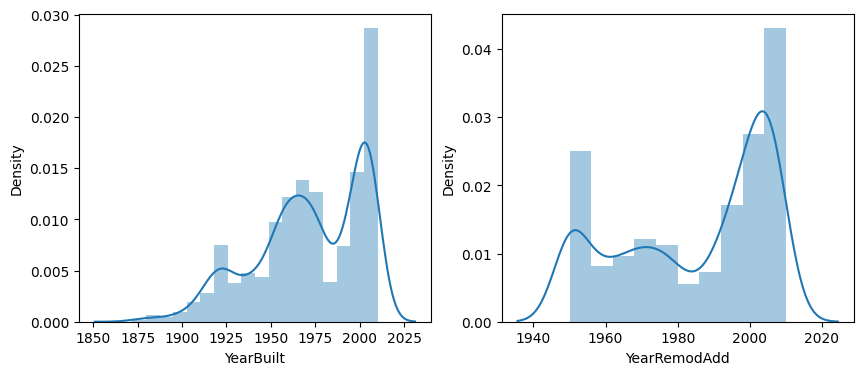

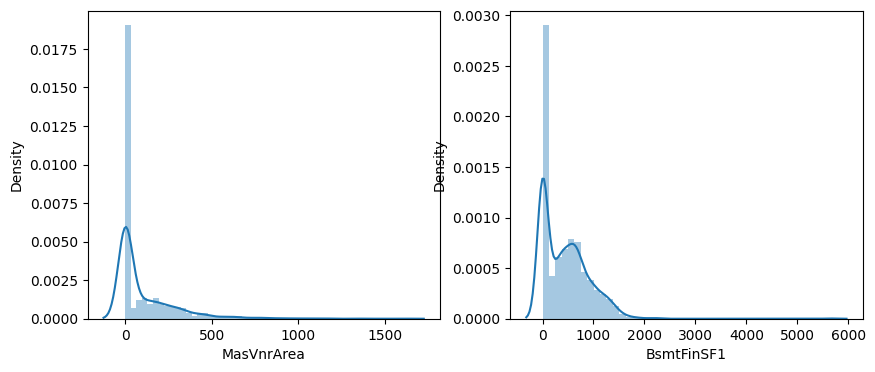

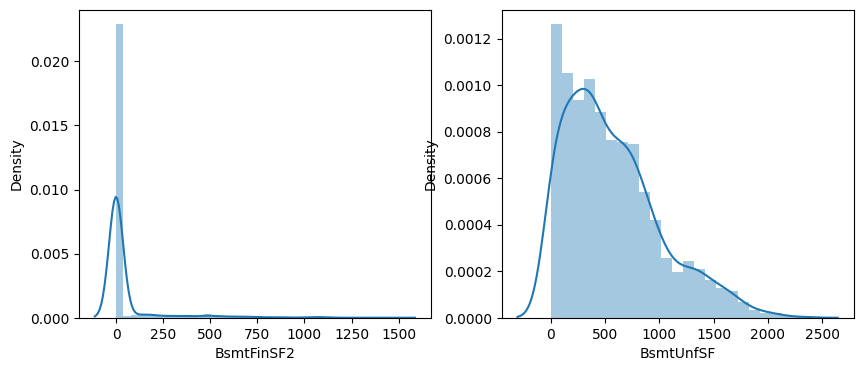

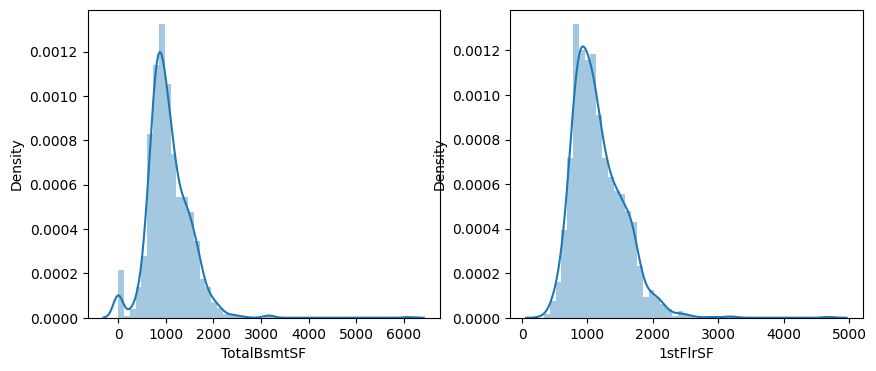

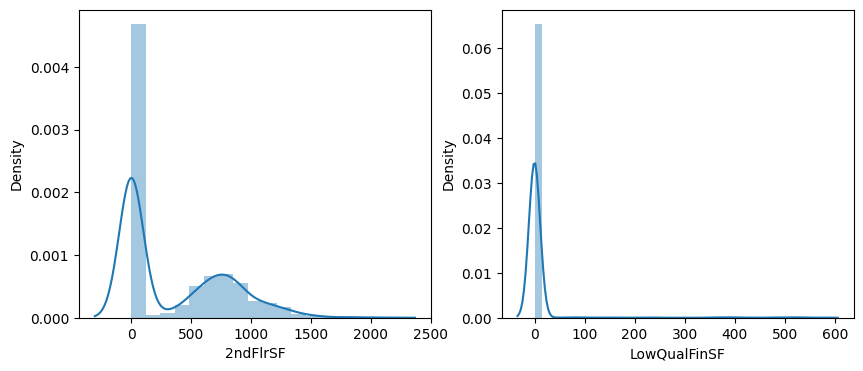

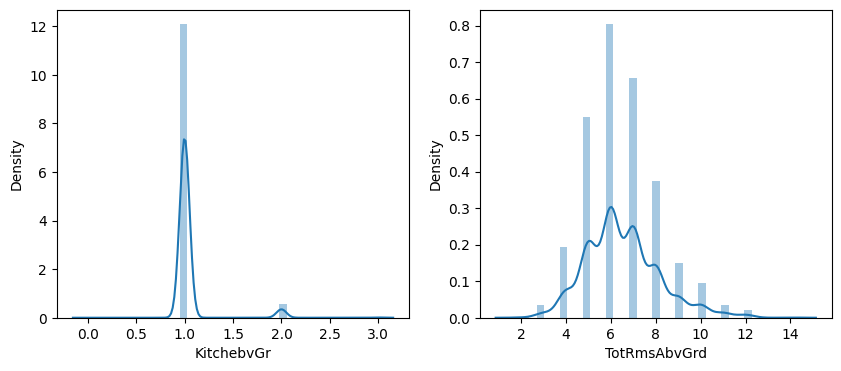

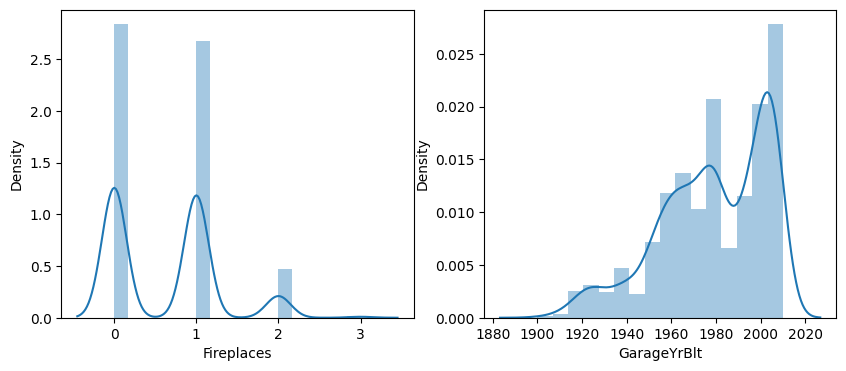

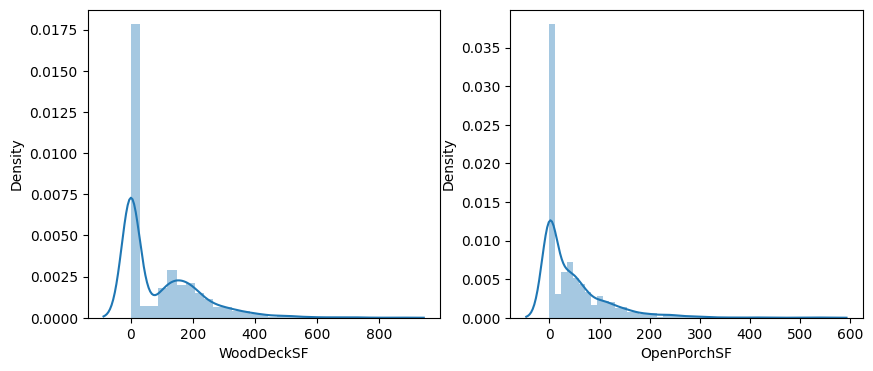

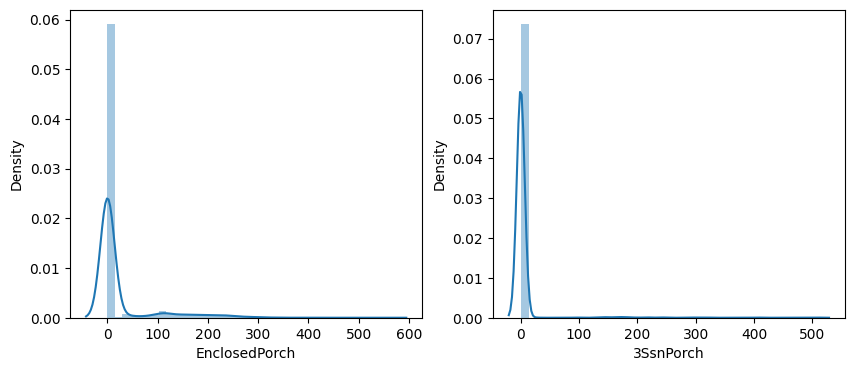

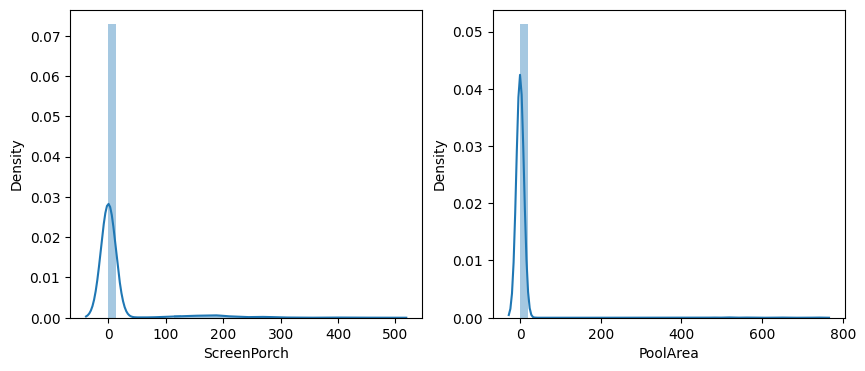

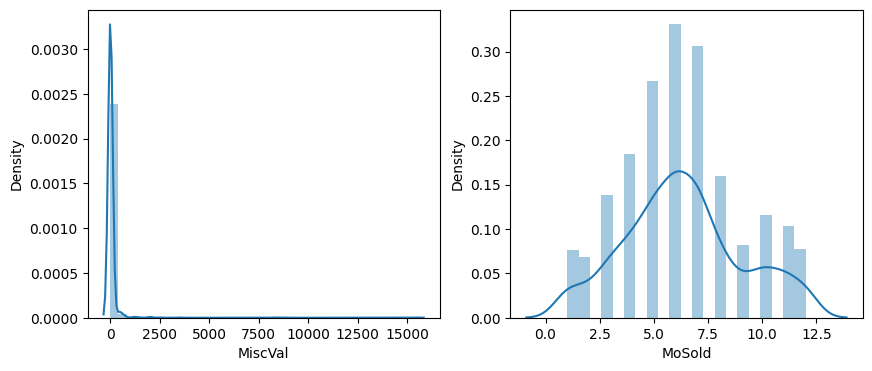

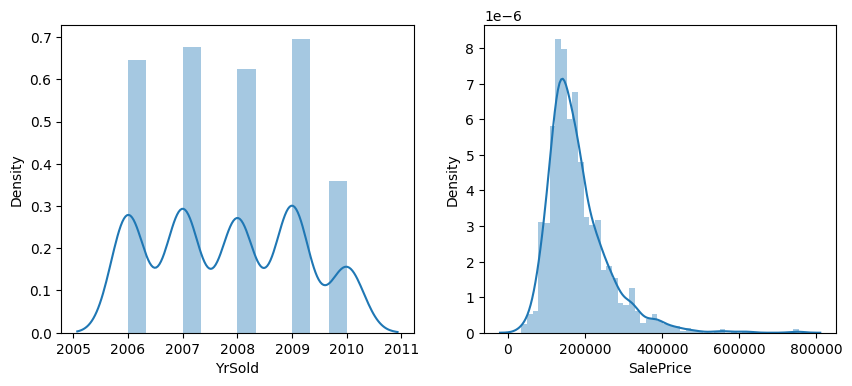

In [20]:
for i in range(0,len(numeric_df_columns),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.distplot(numeric_df[numeric_df_columns[i]])
    plt.subplot(122)
    sns.distplot(numeric_df[numeric_df_columns[i+1]])

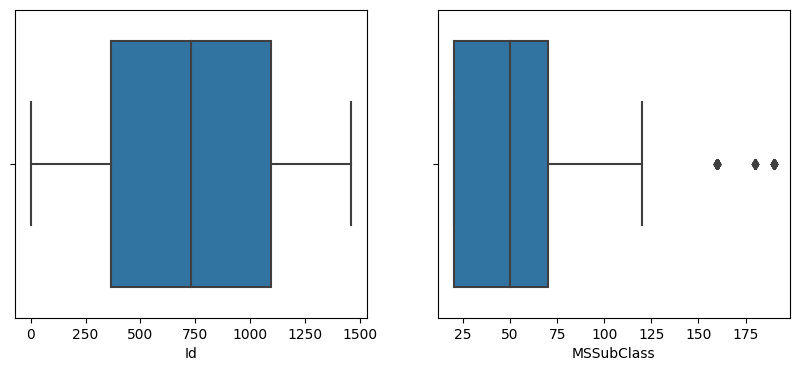

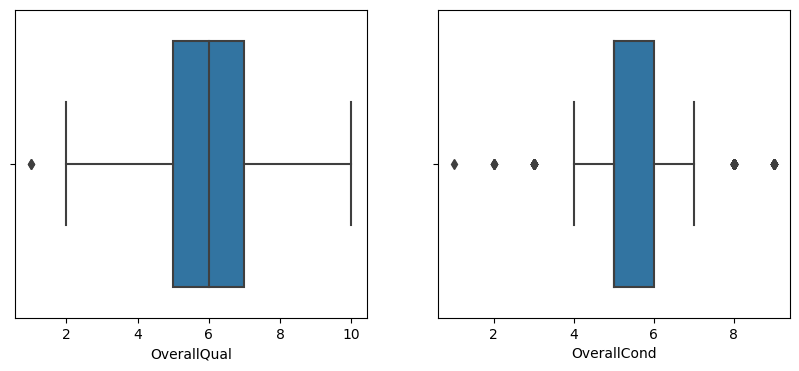

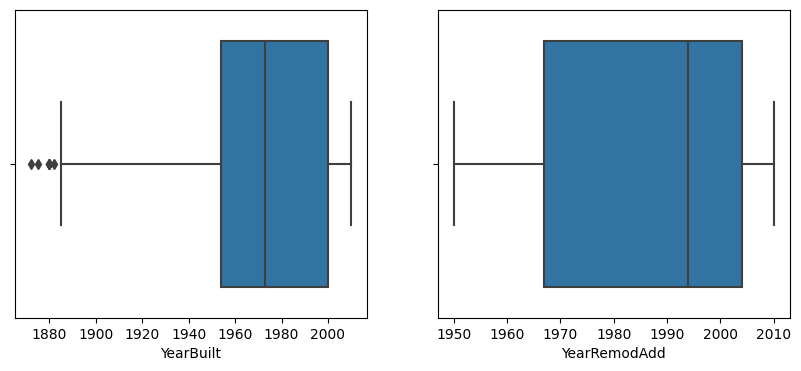

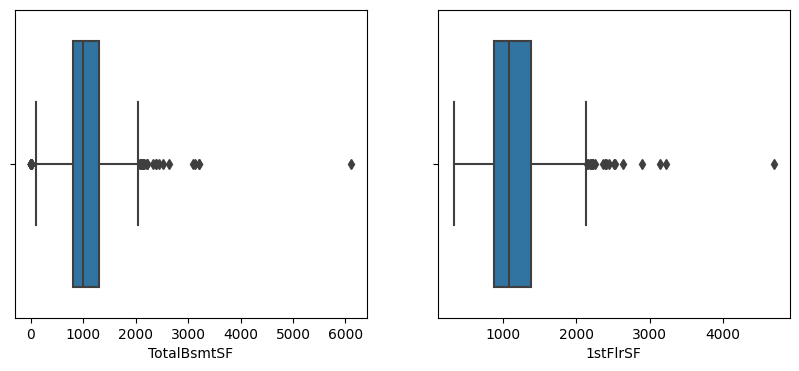

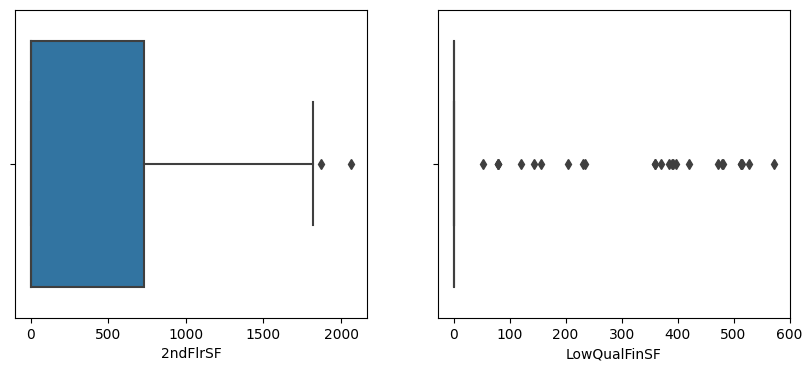

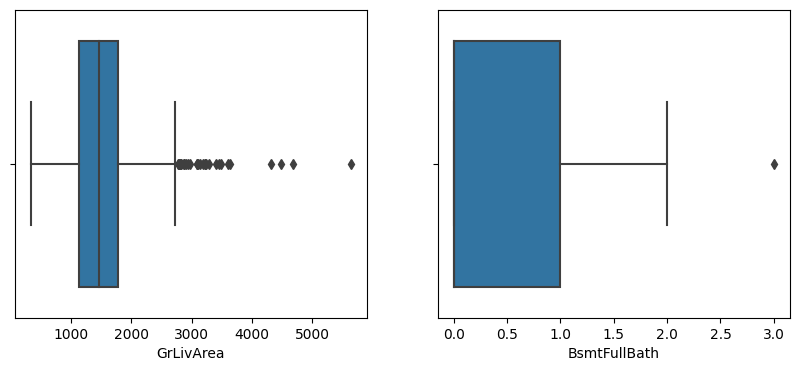

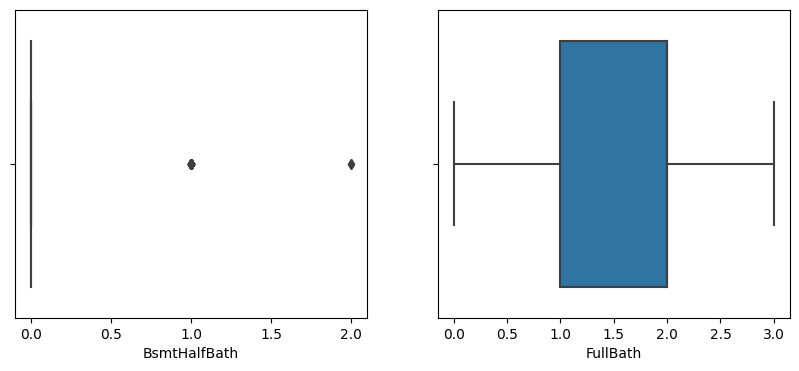

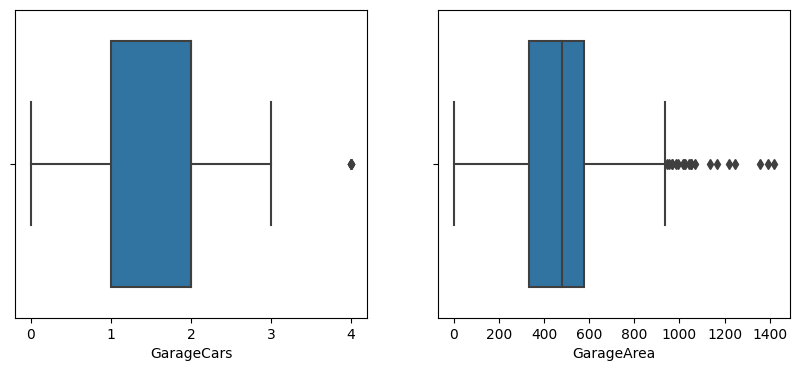

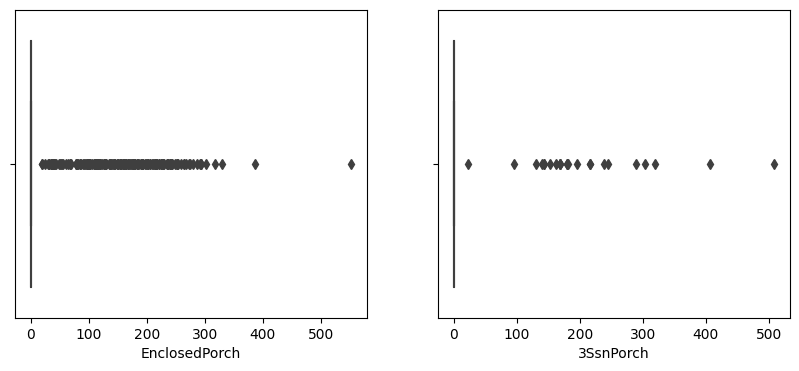

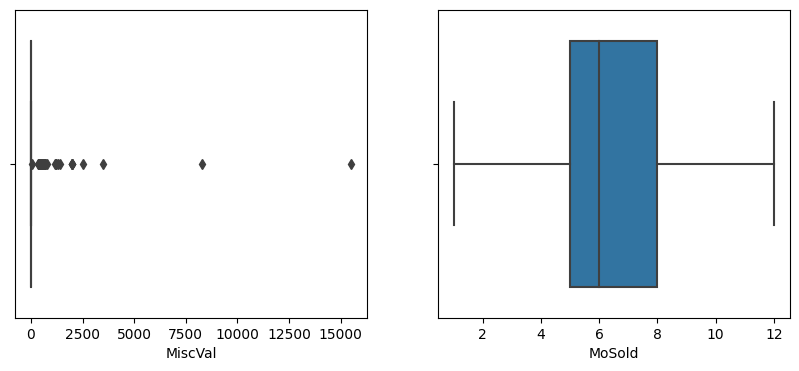

In [21]:
for i in range(0,len(numeric_df_columns),2):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(numeric_df[numeric_df_columns[i]])
    plt.subplot(122)
    sns.boxplot(numeric_df[numeric_df_columns[i+1]])

#### c.Identify significant variables using a correlation matrix 

<AxesSubplot:>

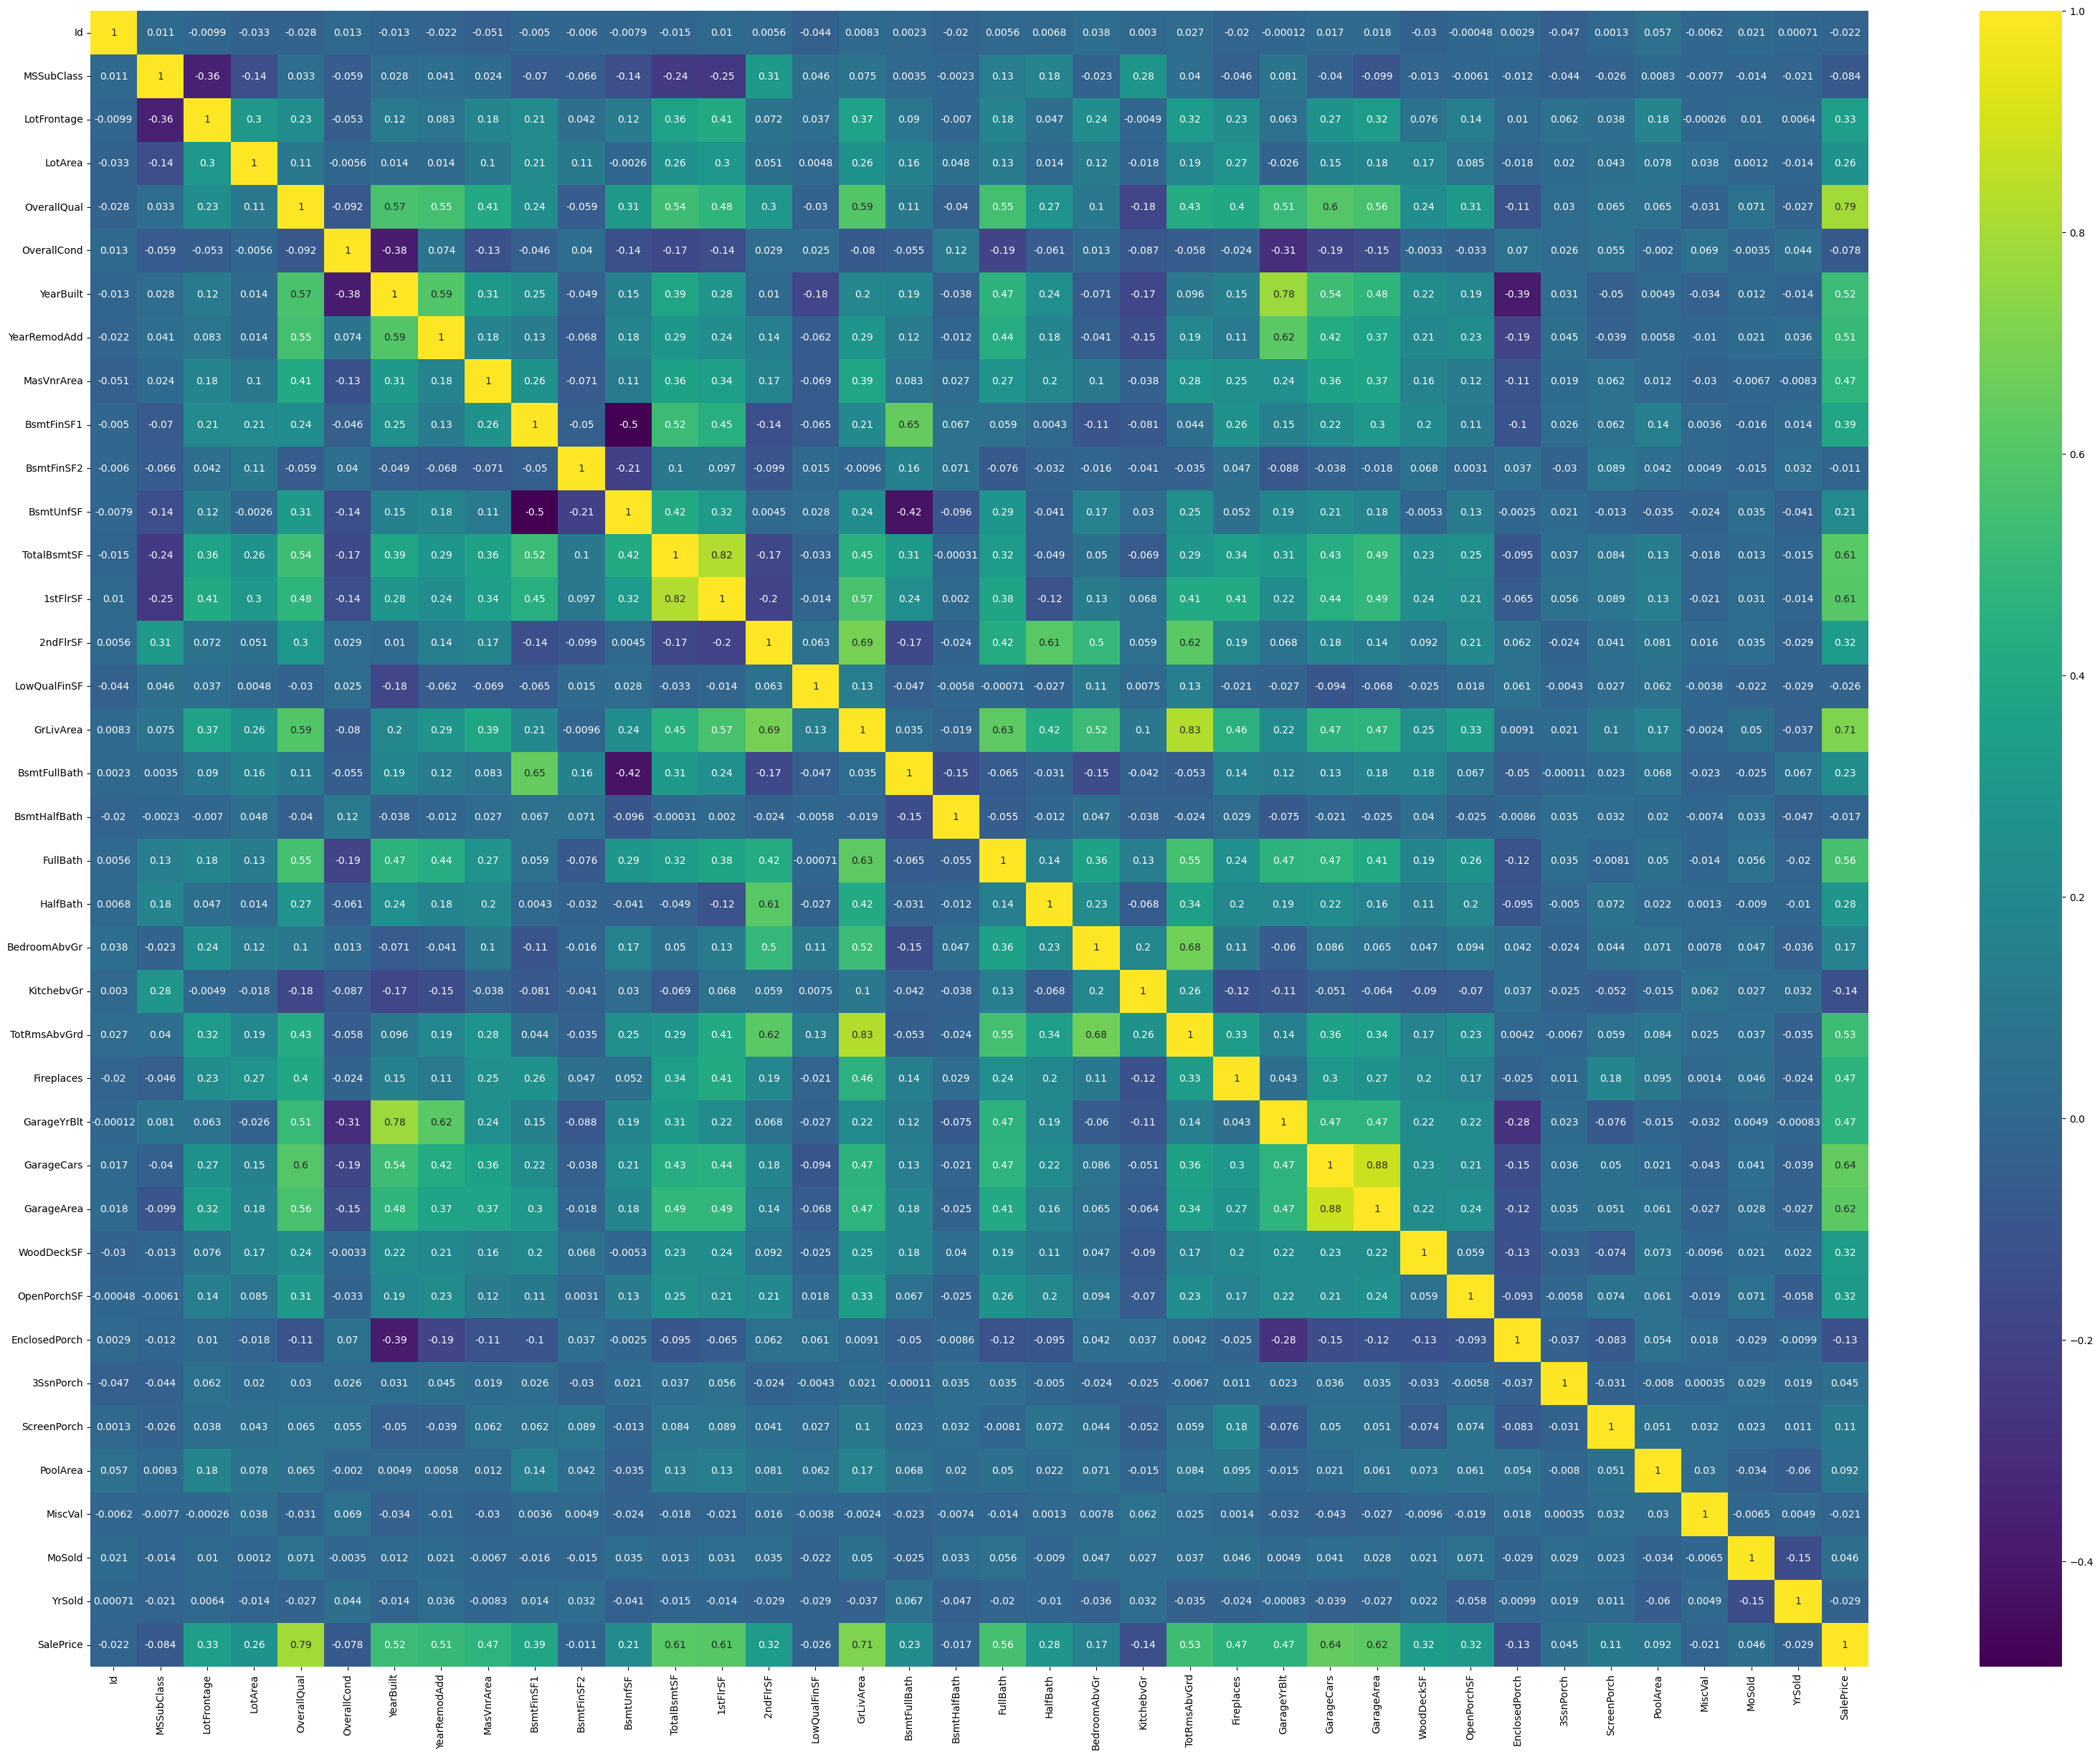

In [22]:
plt.figure(figsize=(40,30))
sns.heatmap(numeric_df.corr(),cmap='viridis',annot=True)

In [23]:
numeric_df.corr().nlargest(10,'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [24]:
selected_columns=['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','FullBath','YearBuilt']

In [25]:
selected_df=numeric_df[selected_columns]

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(selected_df.corr(),cmap='viridis',annot=True)

<AxesSubplot:>

#### d.Pair plot for distribution and density

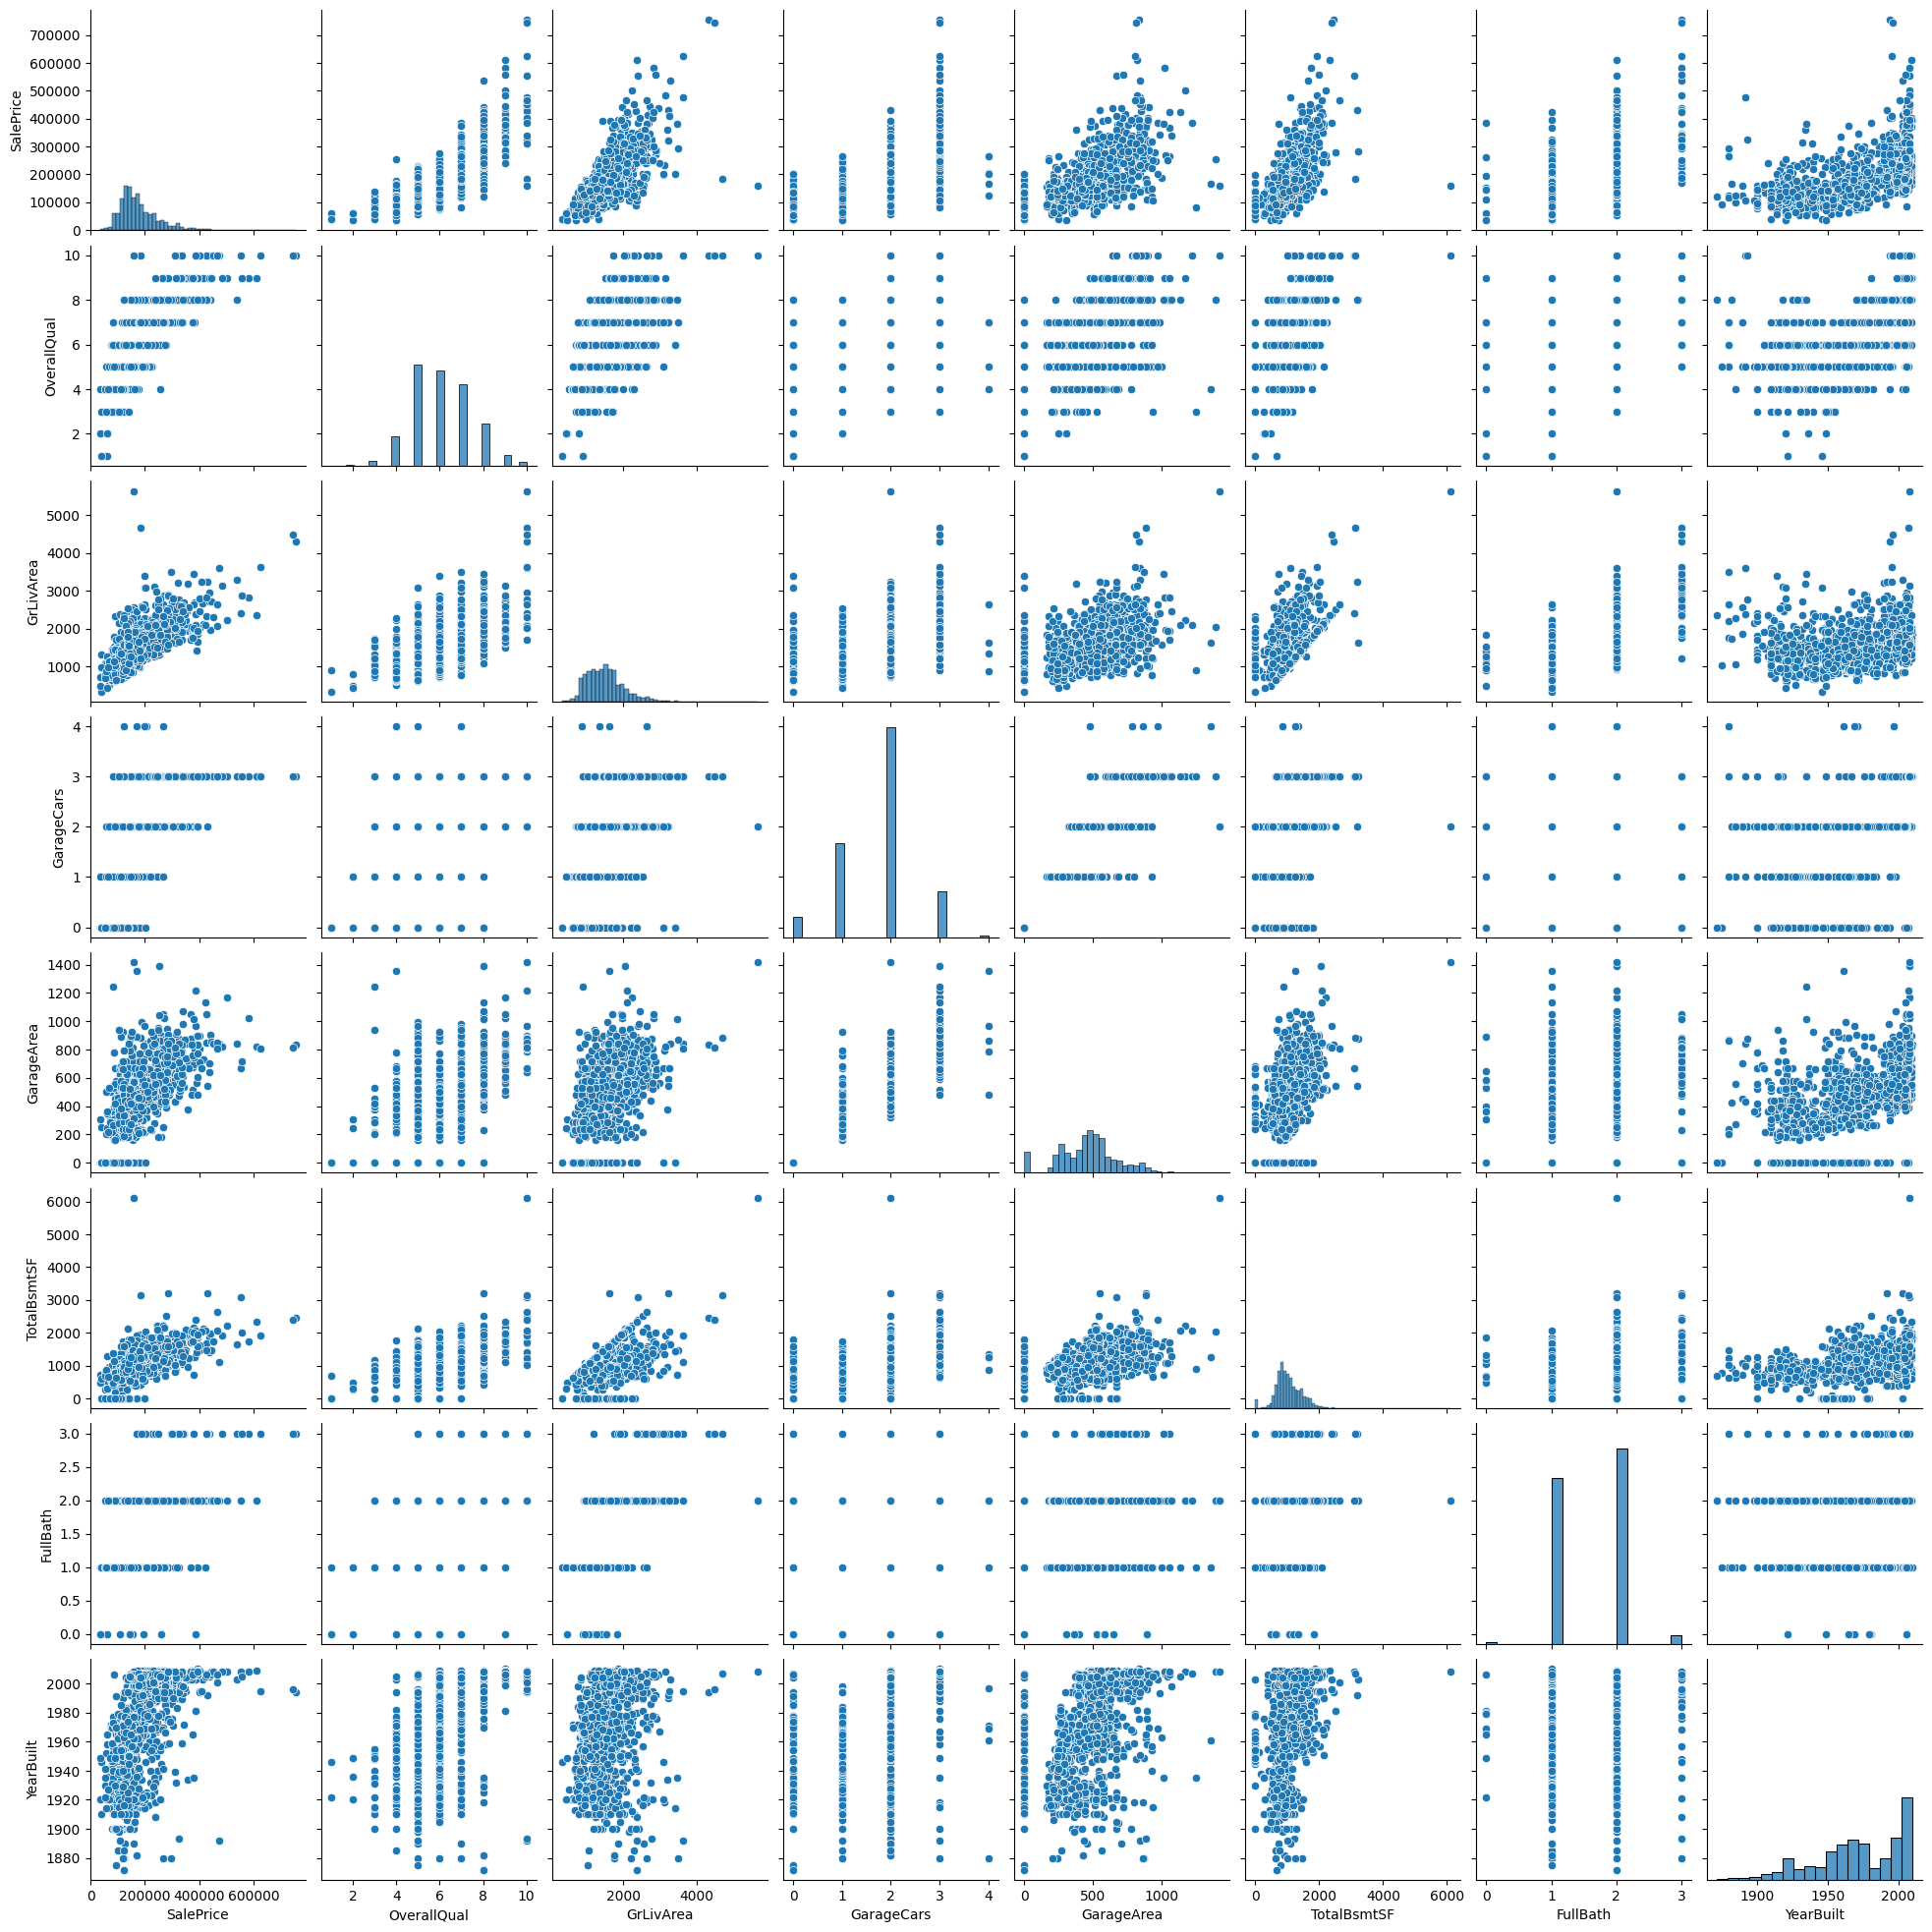

In [27]:
sns.pairplot(selected_df)

### 4.EDA of categorical variables

#### a.Missing value treatment

In [28]:
categorical_df.shape

(1460, 43)

In [29]:
categorical_df.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [30]:
categorical_df.isnull().sum()/1460*100

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functiol          0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [31]:
drop_columns=['Alley','MiscFeature','Fence','PoolQC','FireplaceQu']
categorical_df.drop(drop_columns,axis=1,inplace=True)

In [32]:
categorical_df.isnull().mean()*100

MSZoning         0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.547945
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.068493
KitchenQual      0.000000
Functiol         0.000000
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PavedDrive       0.000000
SaleType         0.000000
SaleCondition    0.000000
dtype: float

In [33]:
categorical_df.mode()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2  ... Electrical KitchenQual Functiol  \
0          mes       Norm       Norm  ...      SBrkr          TA      Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          Unf         TA         TA          Y       WD   

  SaleCondition  
0        Normal  

[1 rows x 38 columns]

In [34]:
categorical_df.GarageType.mode()[0]

'Attchd'

In [35]:
categorical_df['GarageType'].fillna(categorical_df.GarageType.mode()[0],inplace=True)
categorical_df['GarageFinish'].fillna(categorical_df.GarageFinish.mode()[0],inplace=True)
categorical_df['GarageQual'].fillna(categorical_df.GarageQual.mode()[0],inplace=True)
categorical_df['GarageCond'].fillna(categorical_df.GarageCond.mode()[0],inplace=True)
categorical_df['MasVnrType'].fillna(categorical_df.MasVnrType.mode()[0],inplace=True)
categorical_df['BsmtQual'].fillna(categorical_df.BsmtQual.mode()[0],inplace=True)
categorical_df['GarageCond'].fillna(categorical_df.GarageCond.mode()[0],inplace=True)
categorical_df['Electrical'].fillna(categorical_df.Electrical.mode()[0],inplace=True)
categorical_df['BsmtFinType2'].fillna(categorical_df.BsmtFinType2.mode()[0],inplace=True)
categorical_df['BsmtFinType1'].fillna(categorical_df.BsmtFinType1.mode()[0],inplace=True)
categorical_df['BsmtCond'].fillna(categorical_df.BsmtCond.mode()[0],inplace=True)
categorical_df['BsmtExposure'].fillna(categorical_df.BsmtExposure.mode()[0],inplace=True)


#### b.Count plot and box plot for bivariate analysis

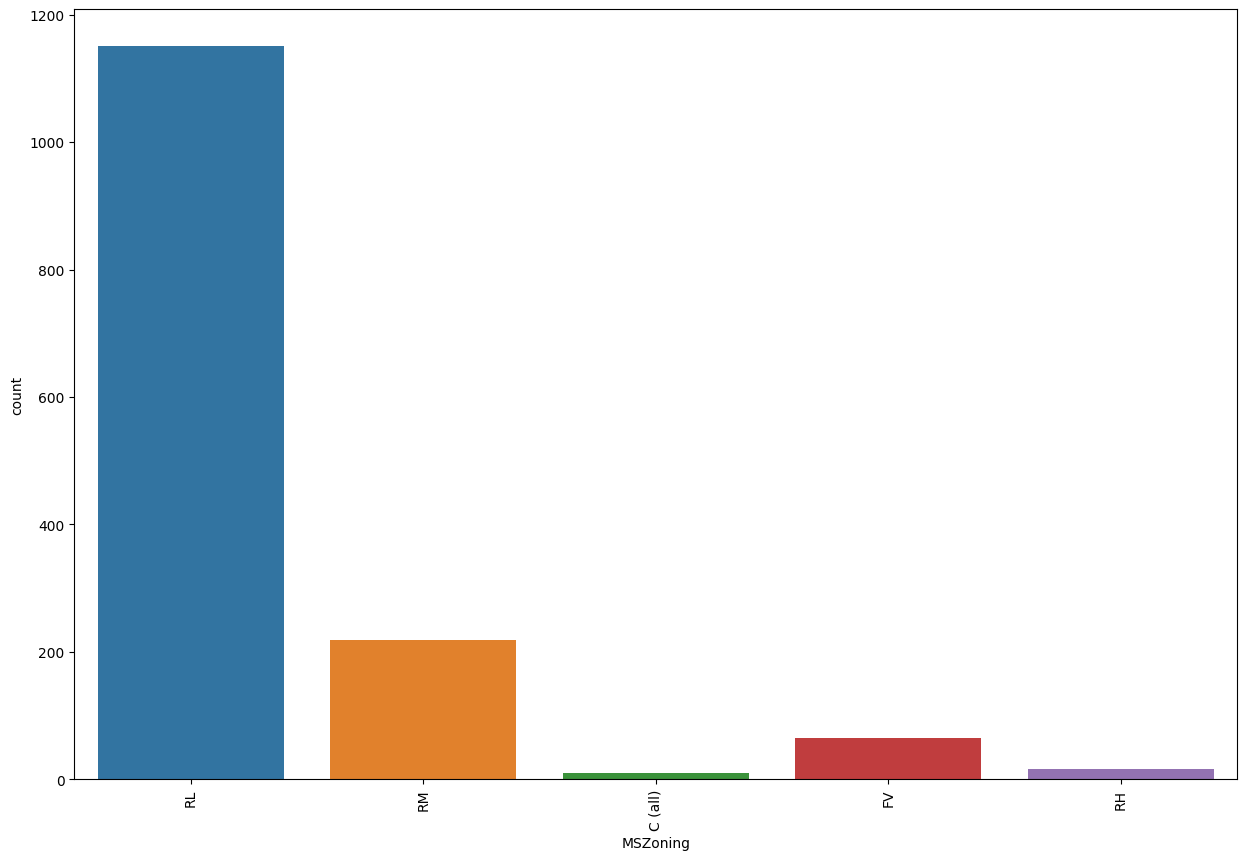

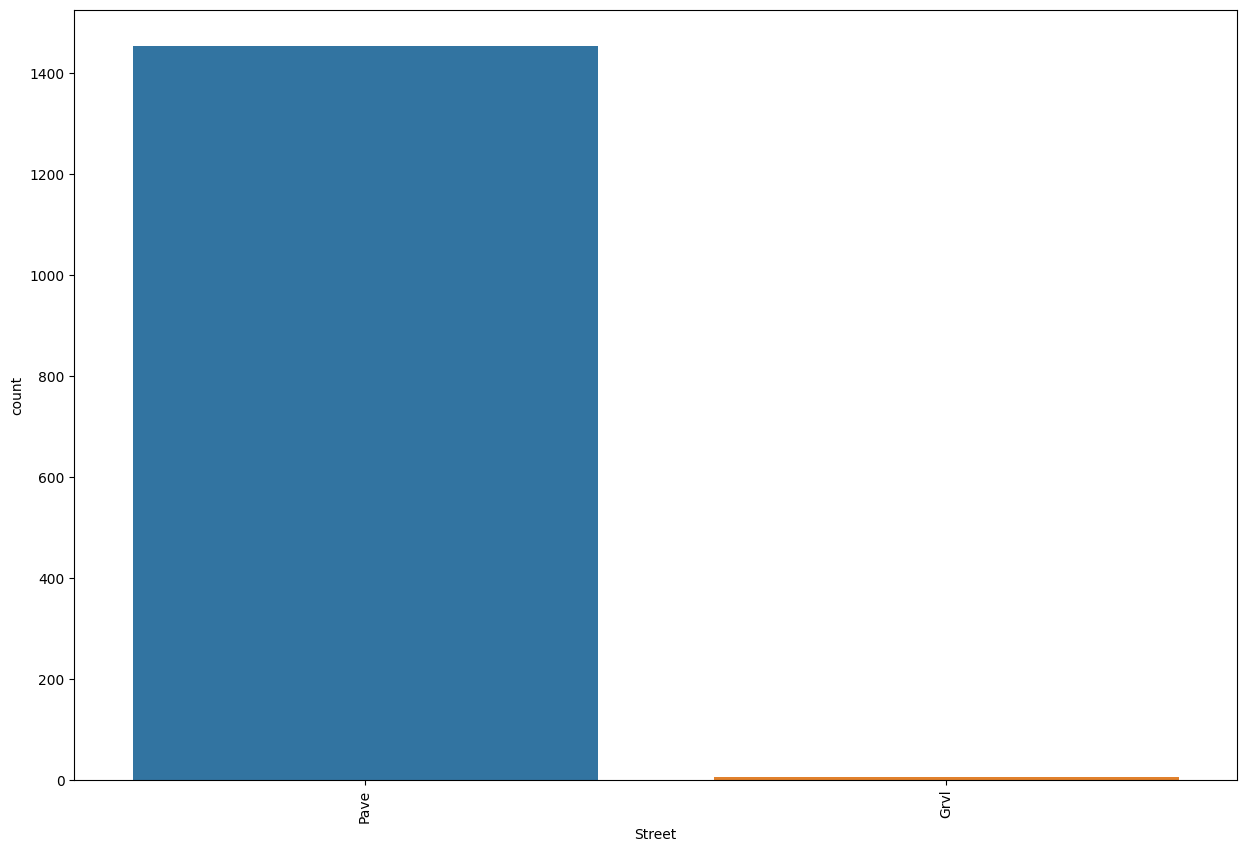

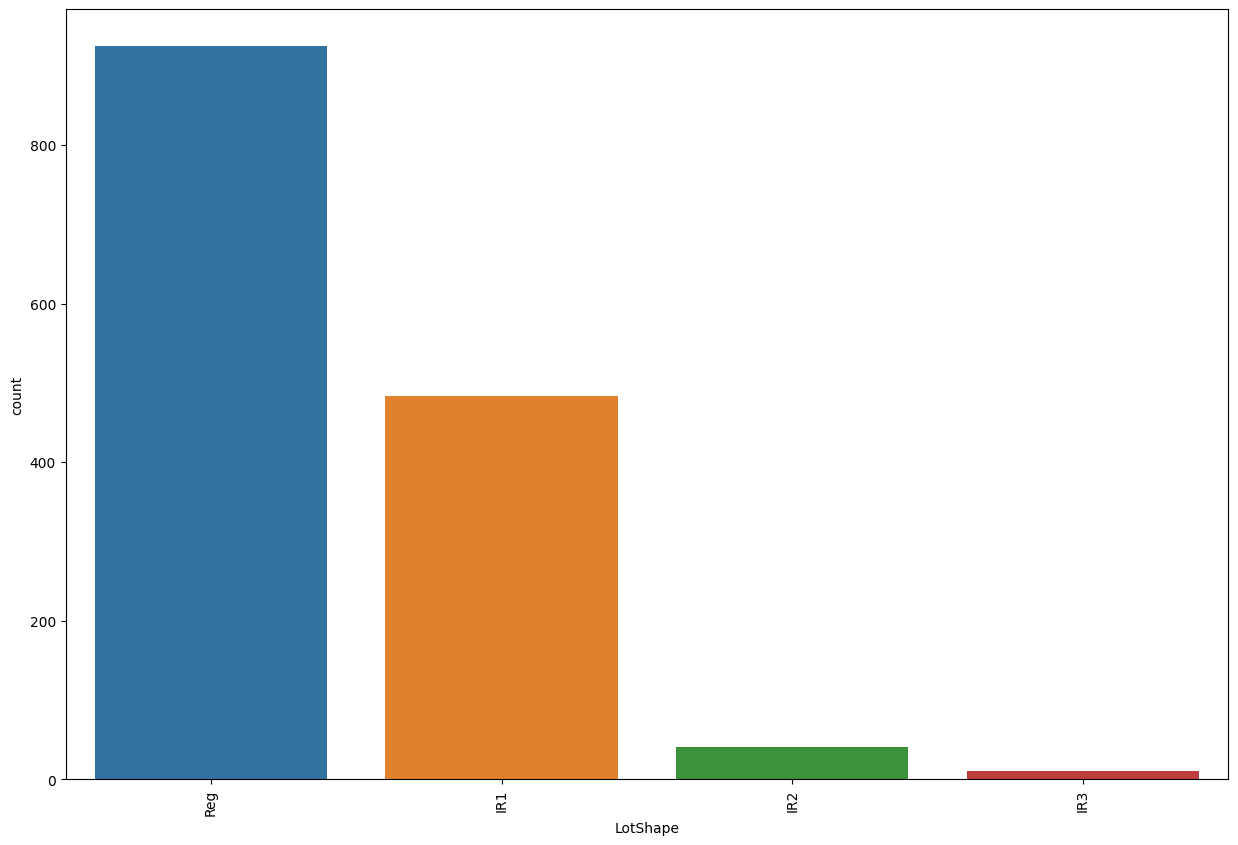

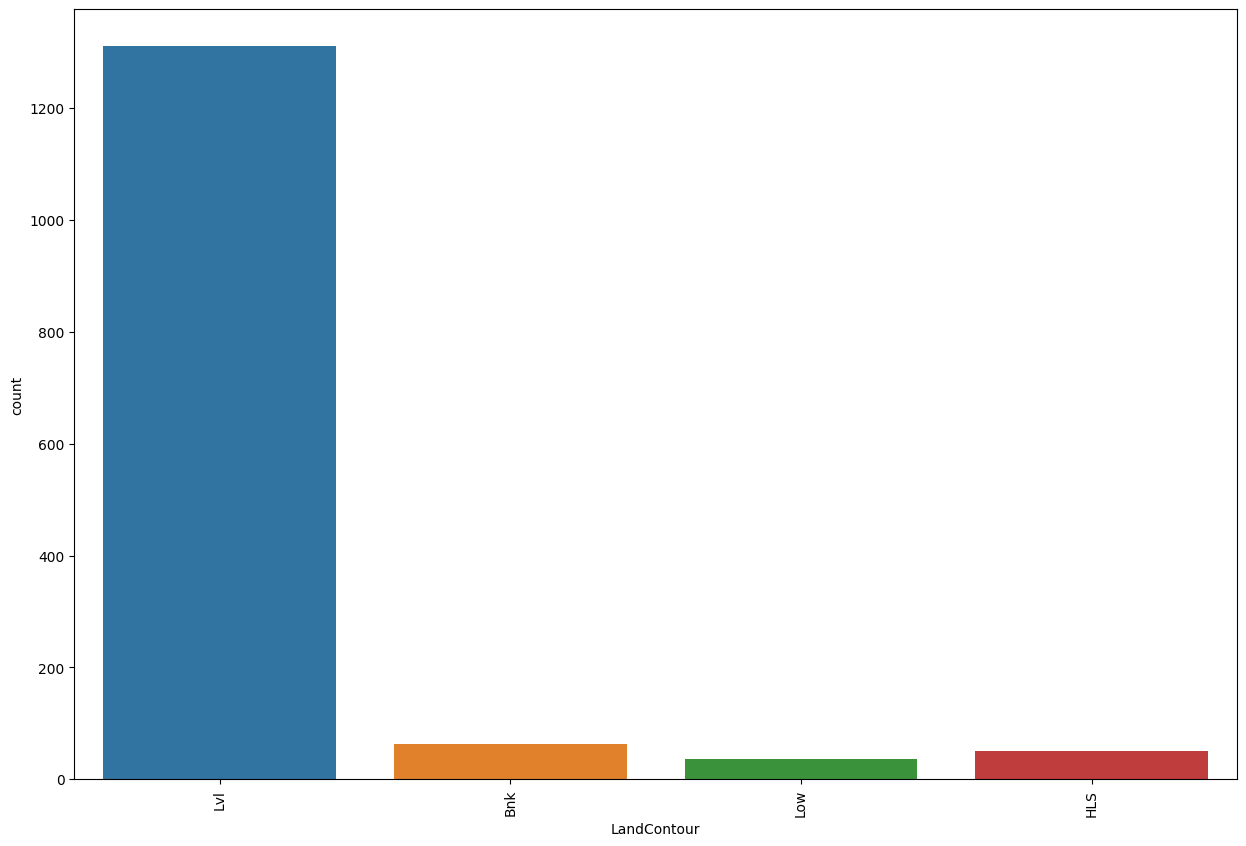

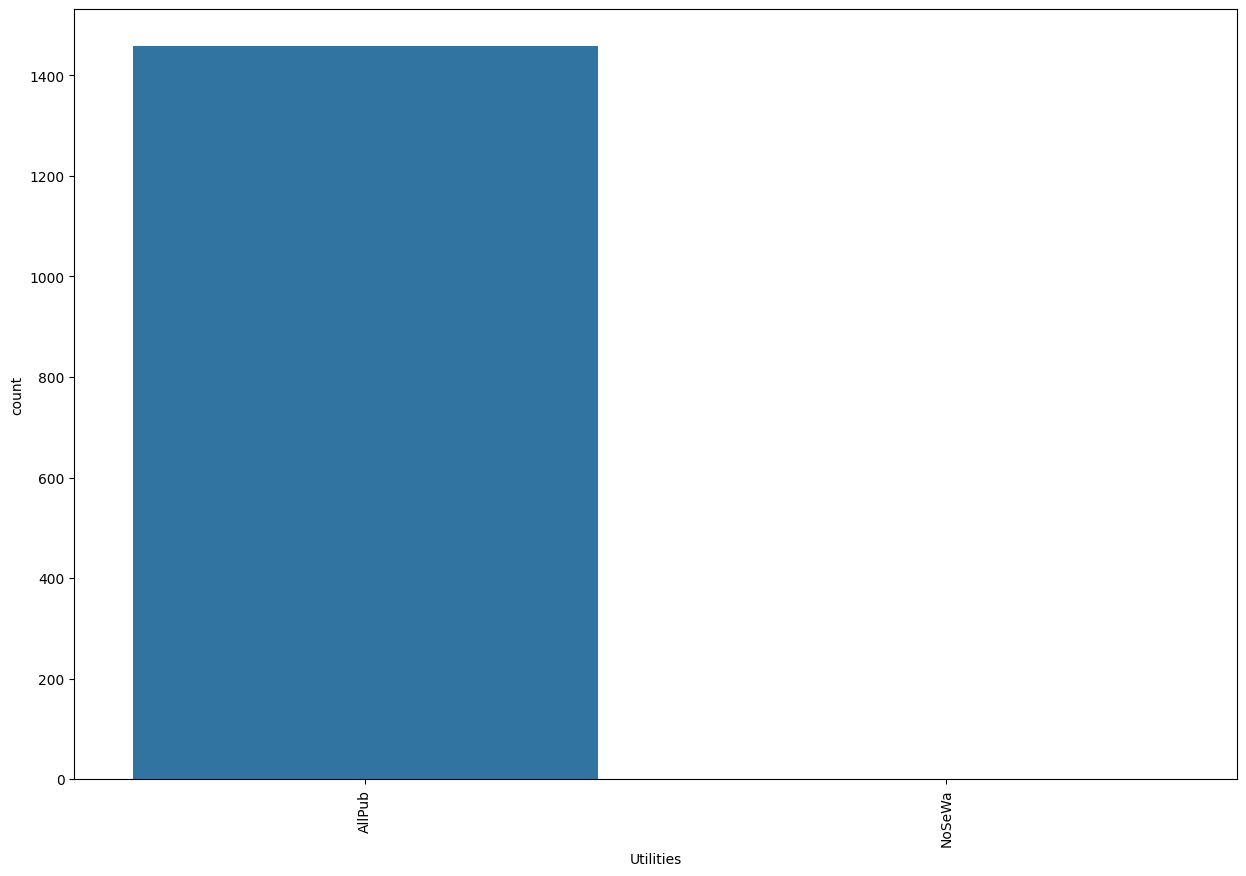

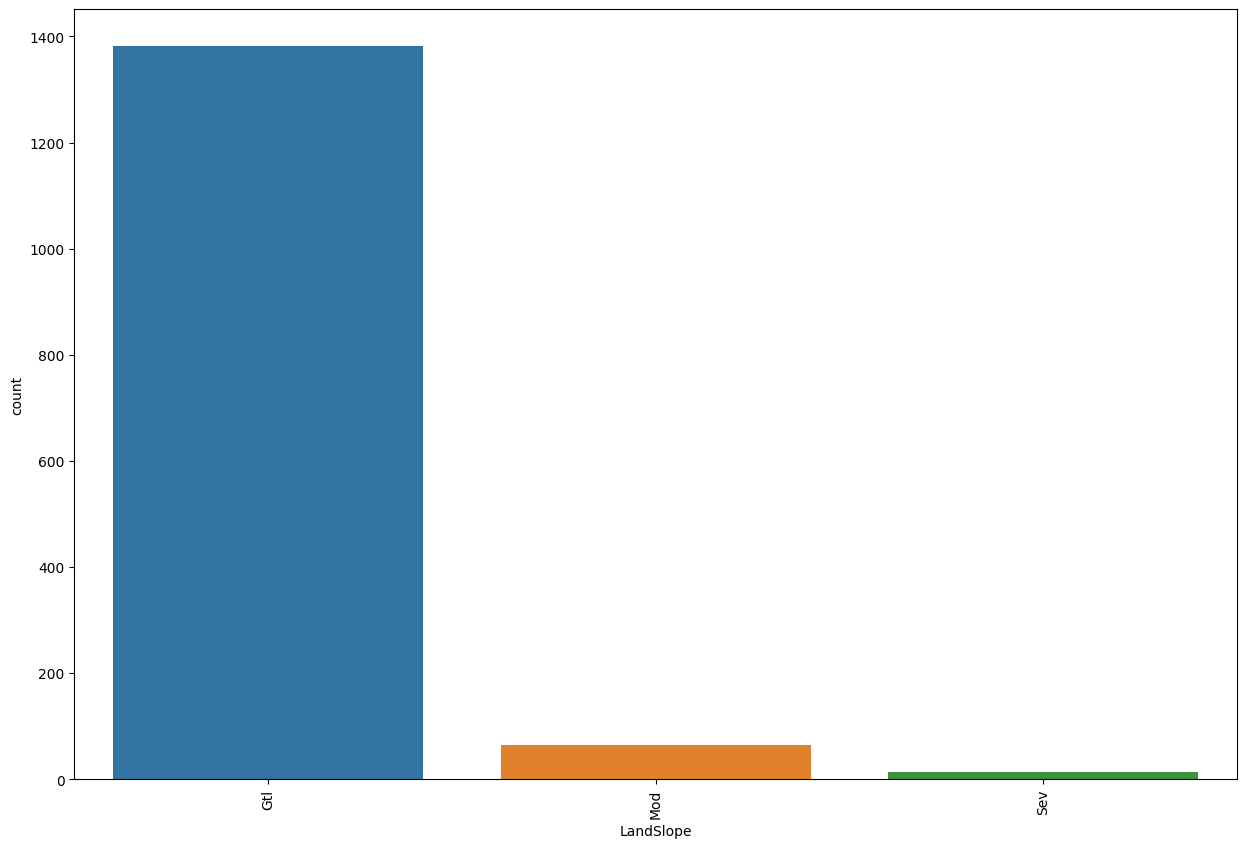

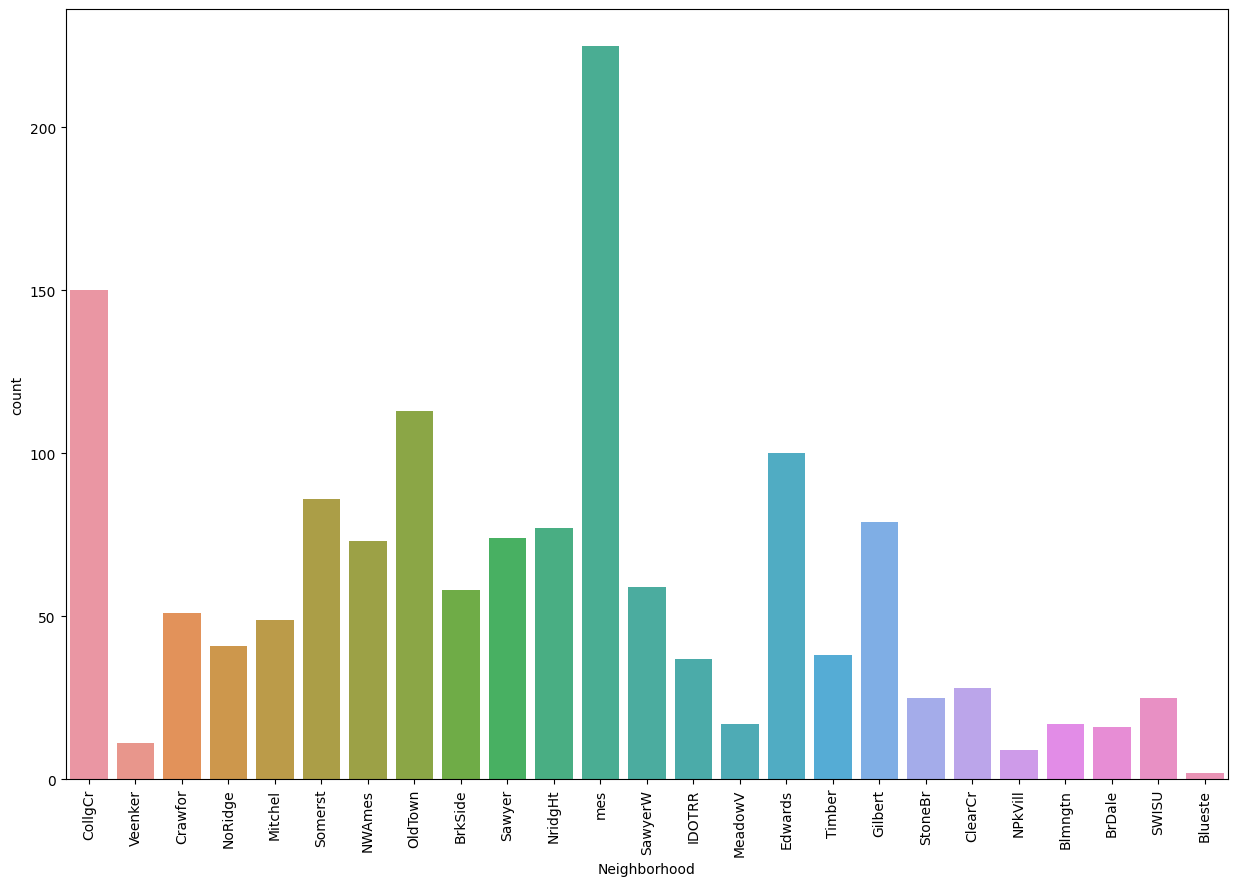

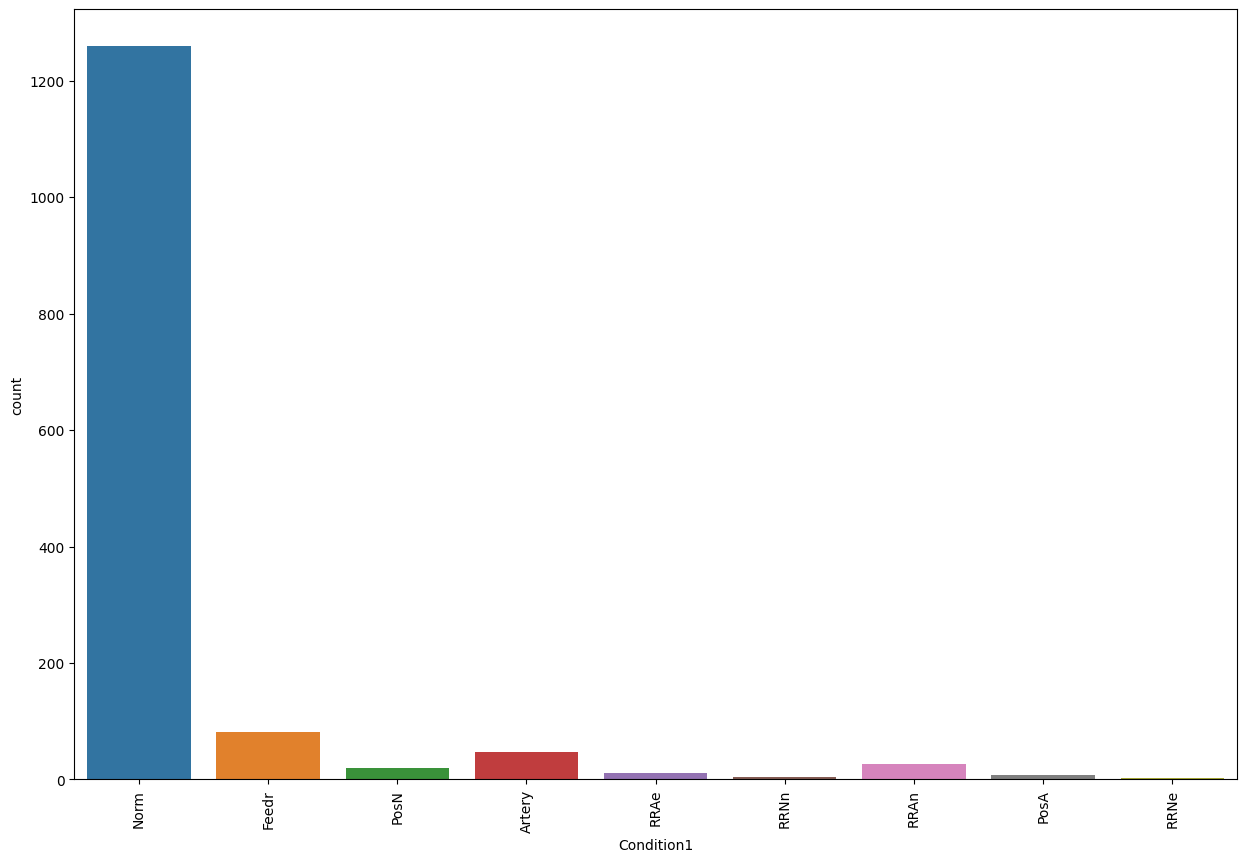

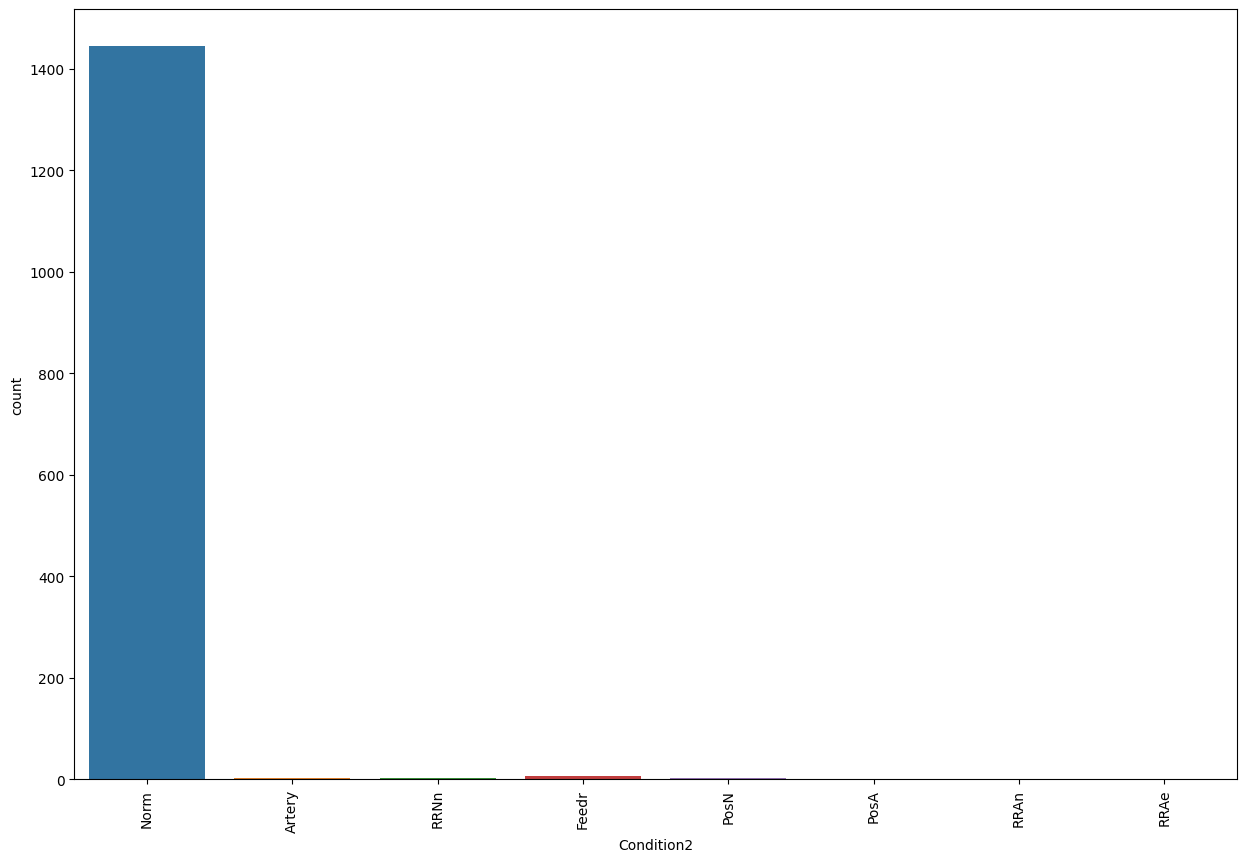

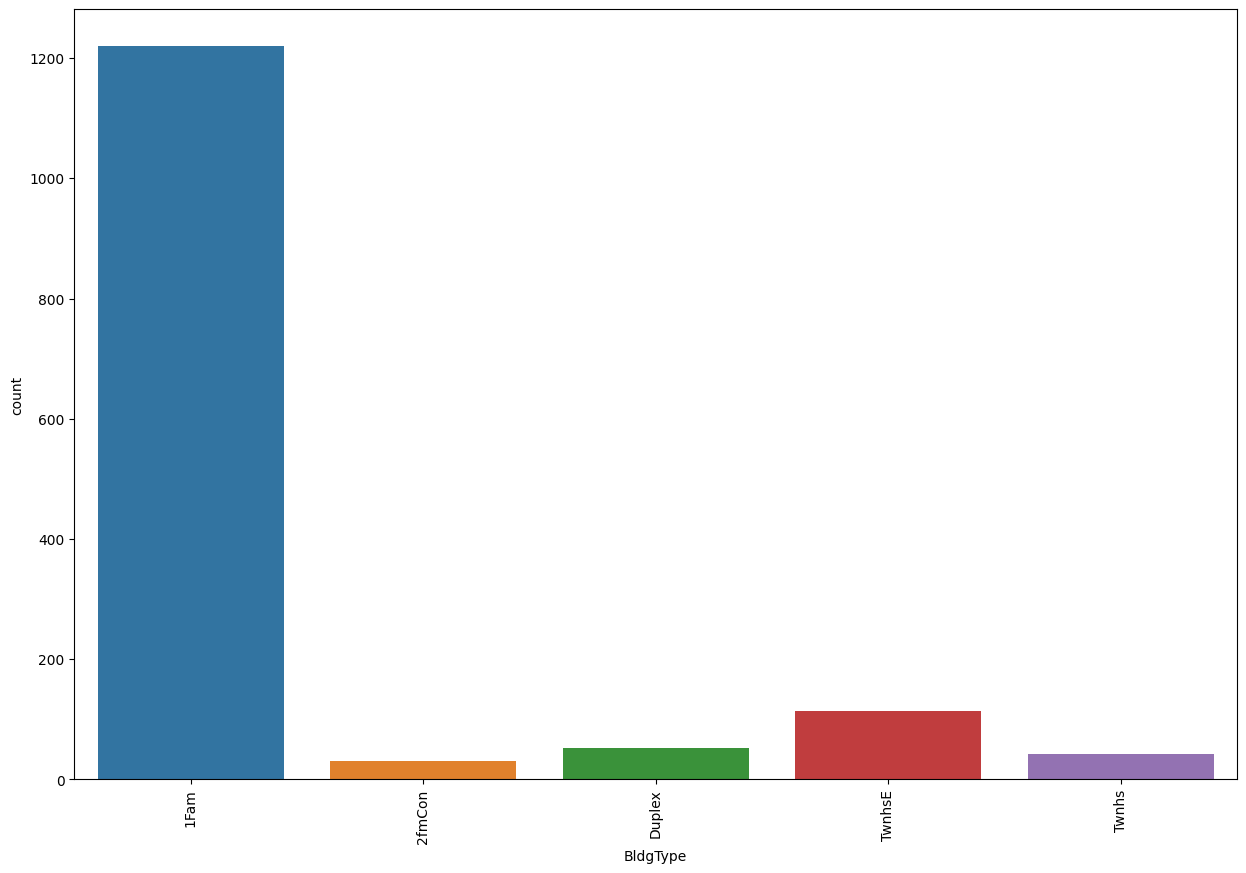

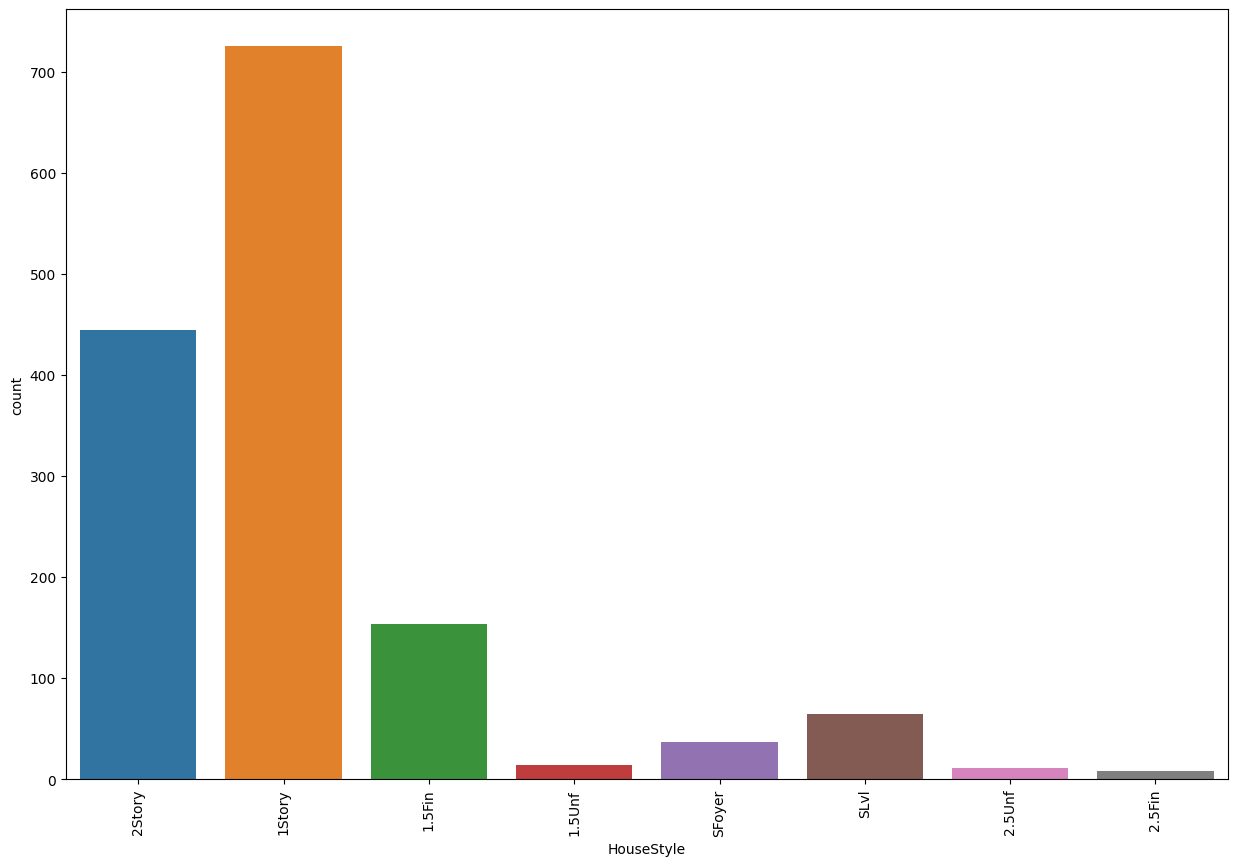

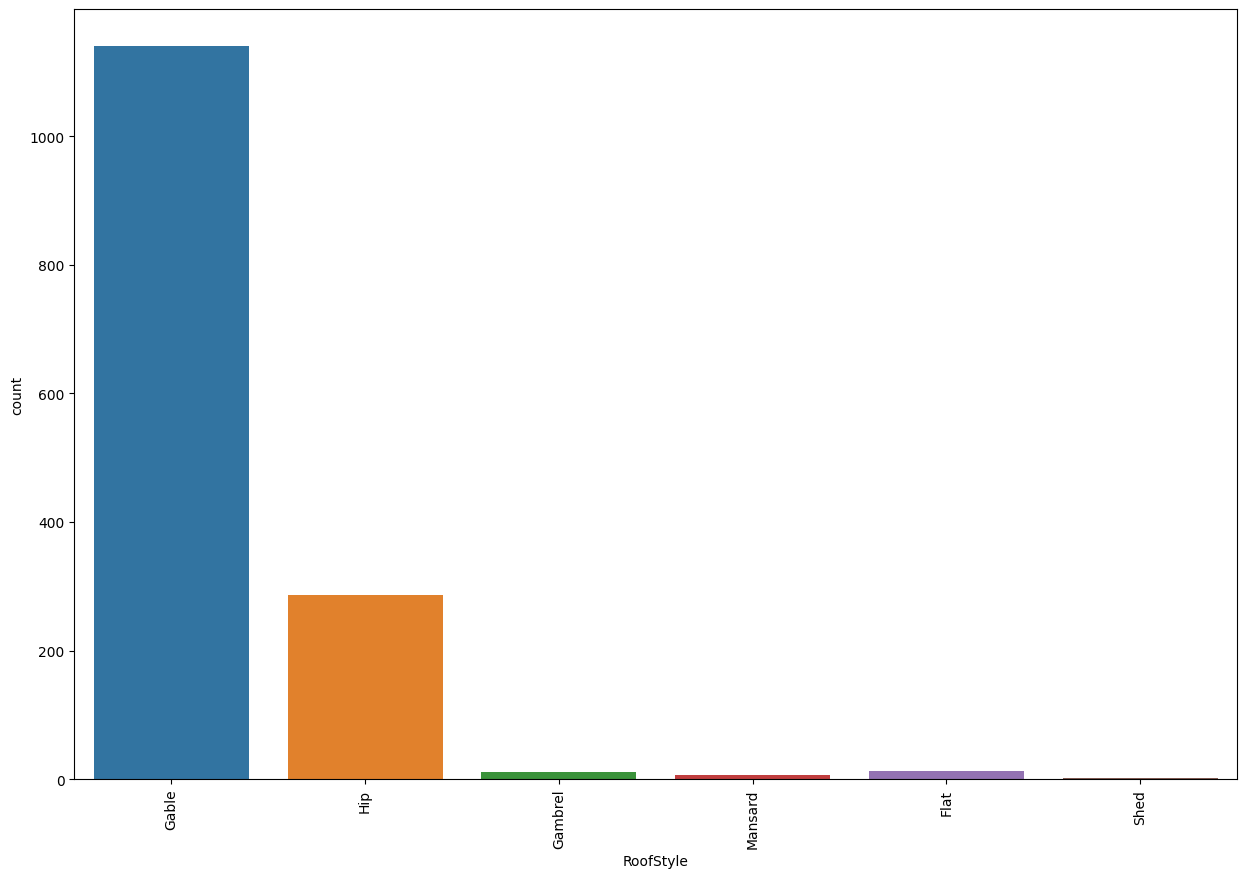

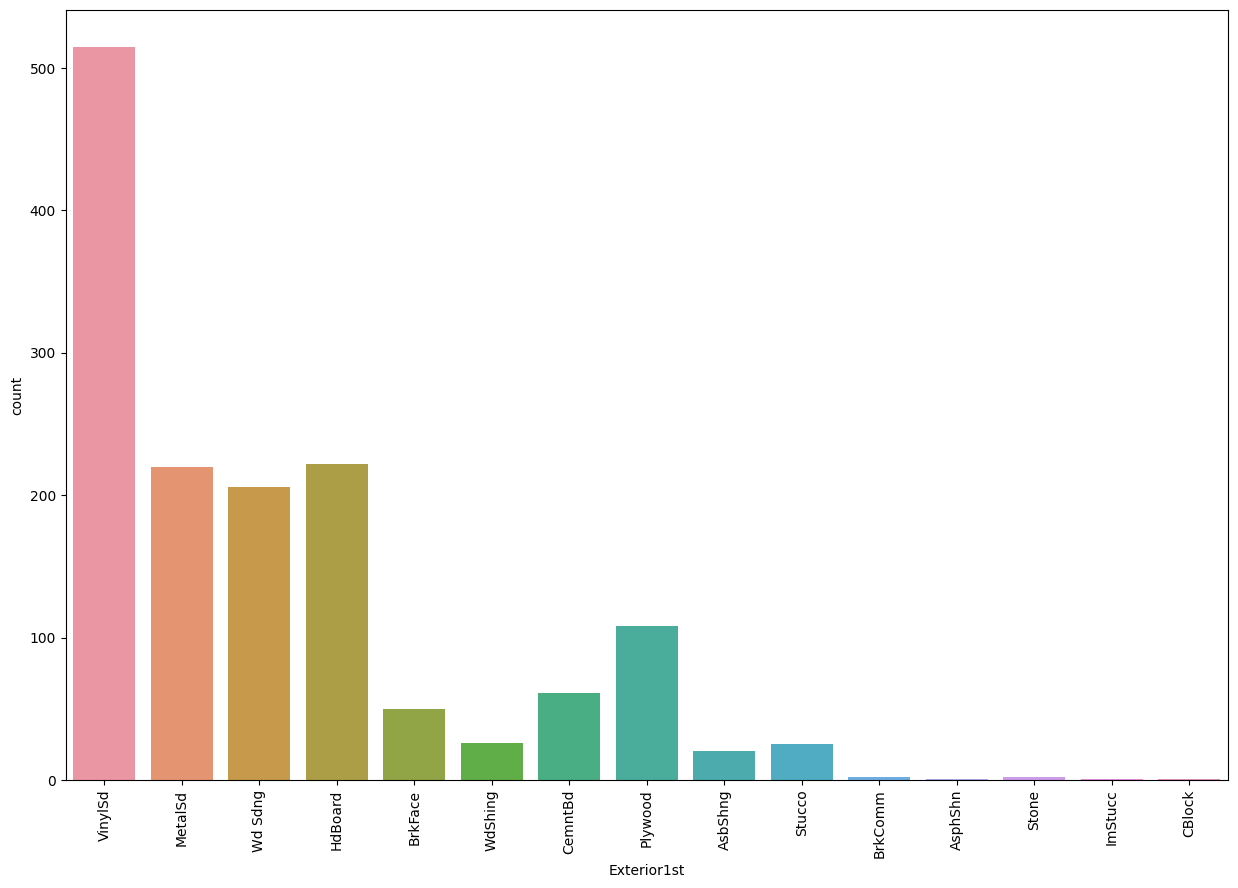

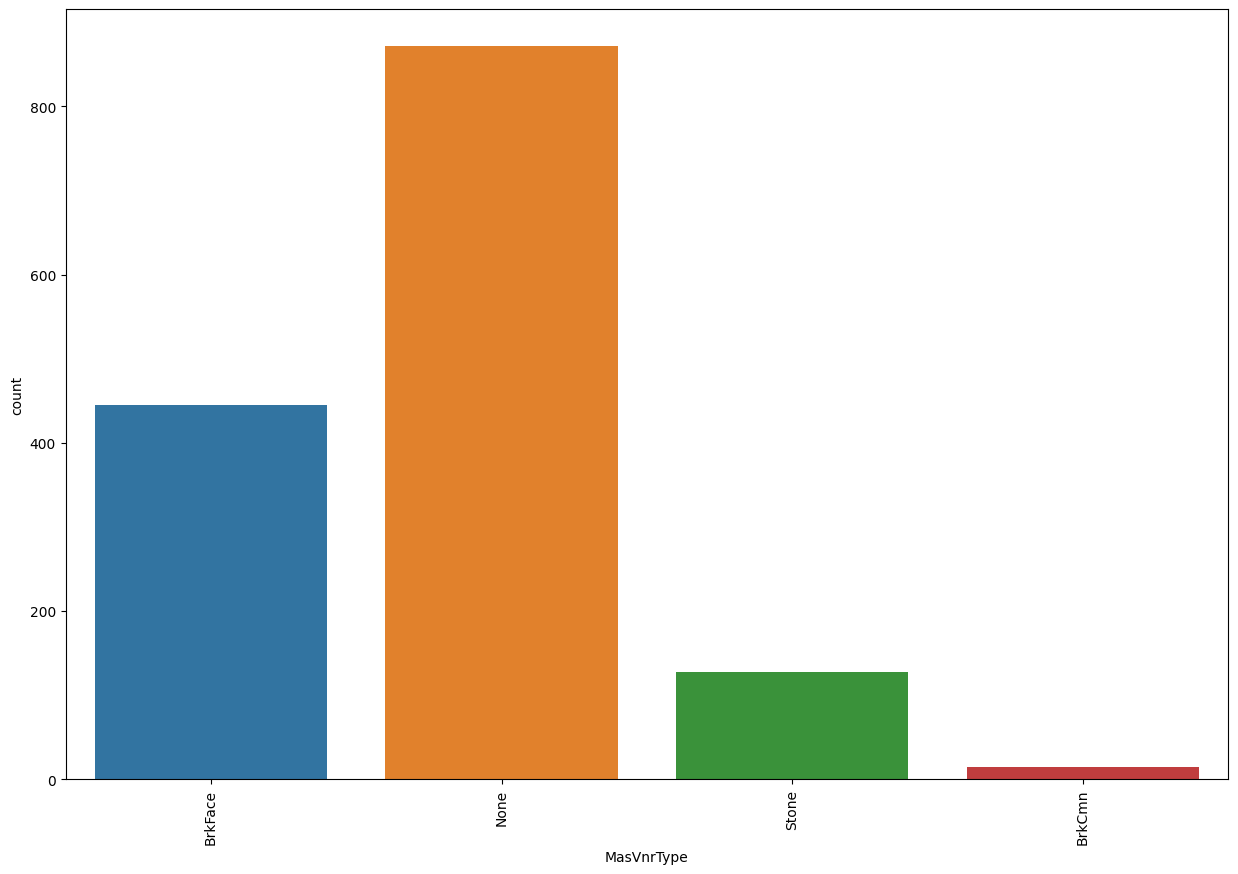

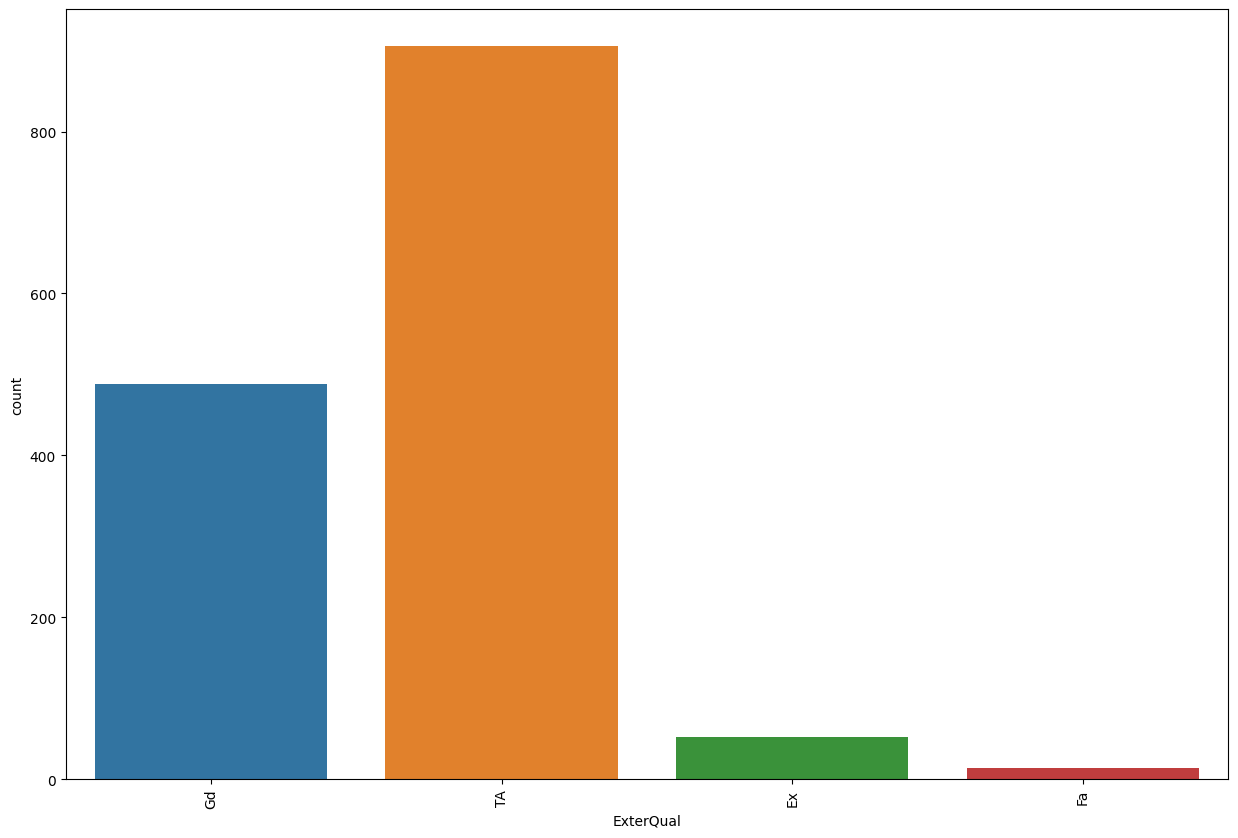

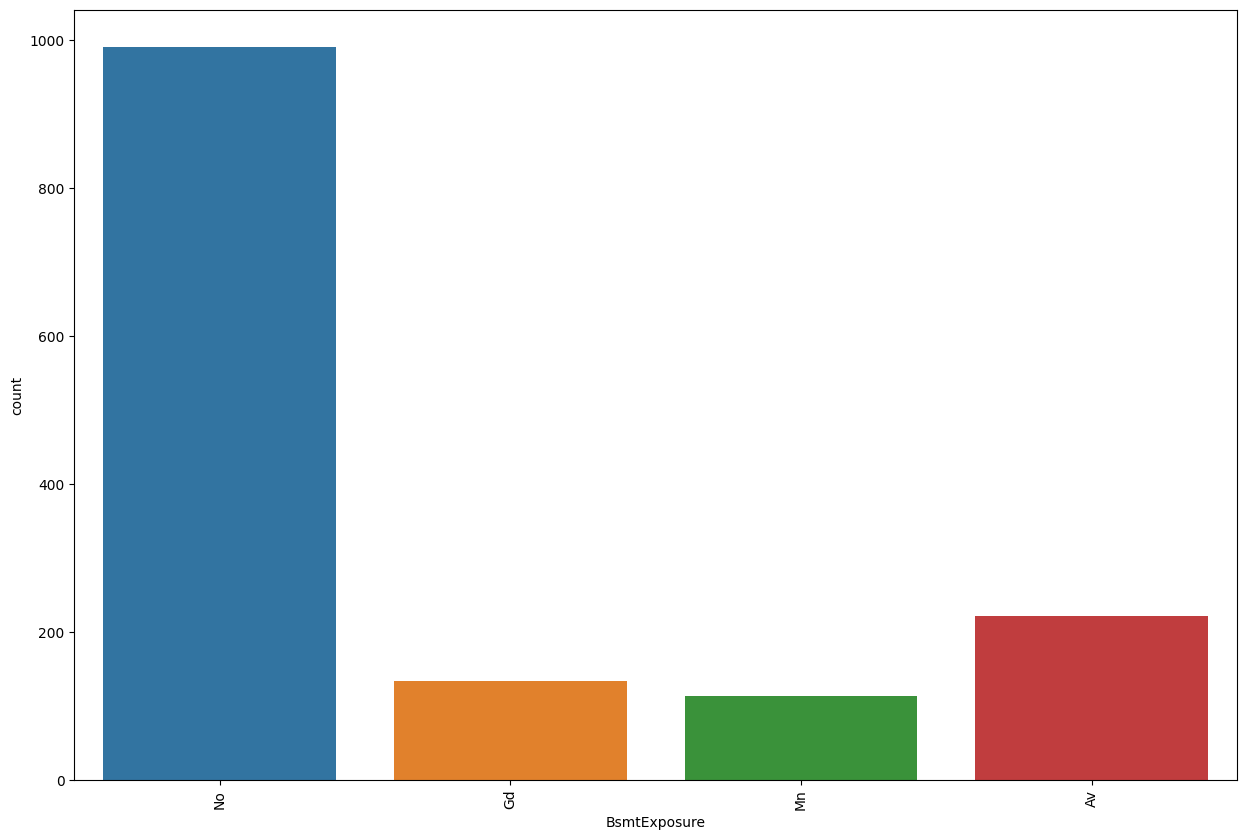

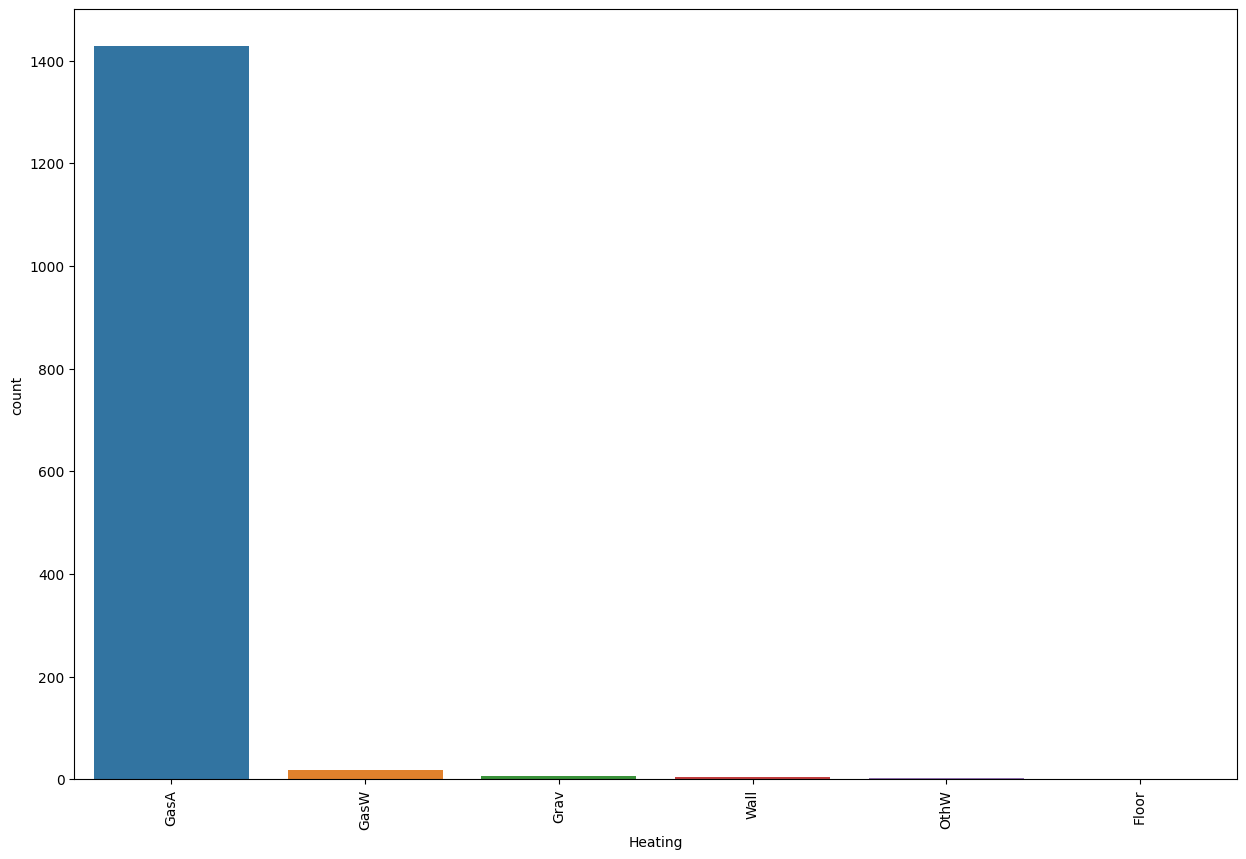

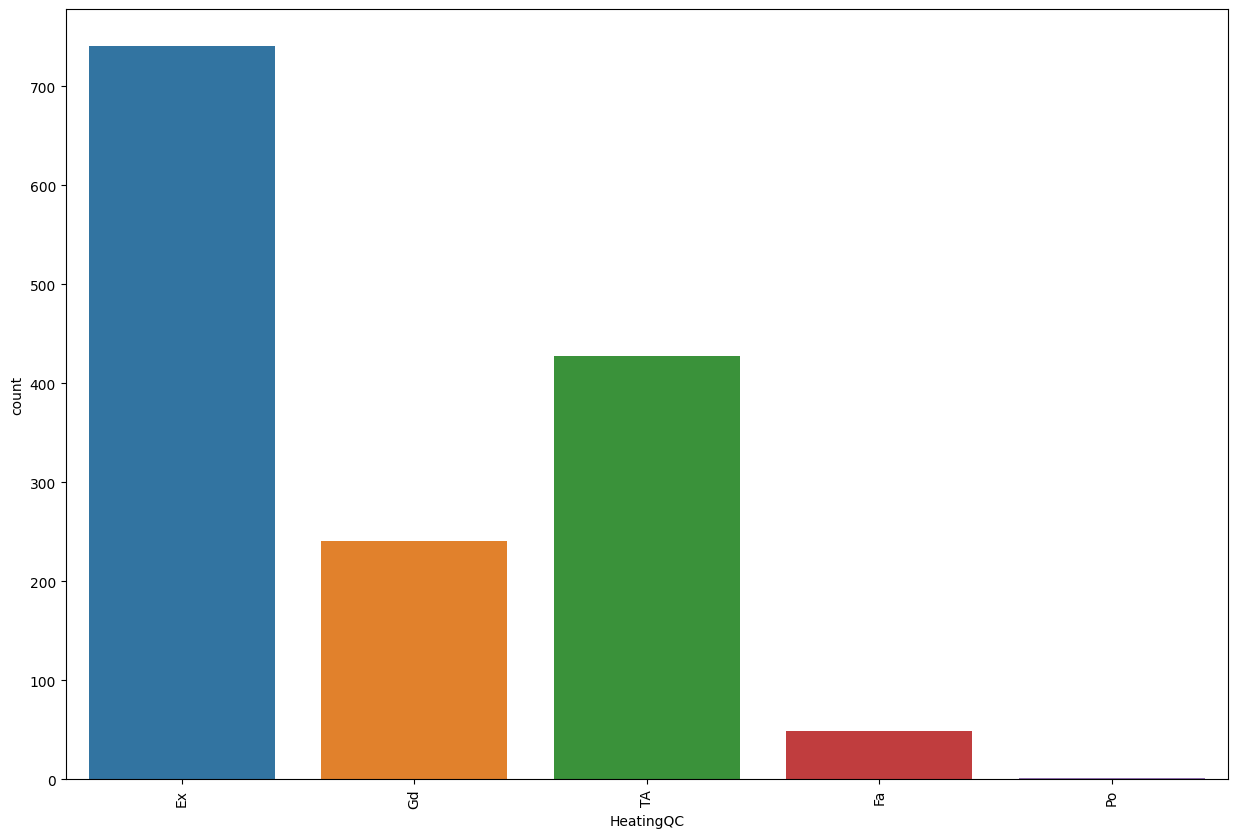

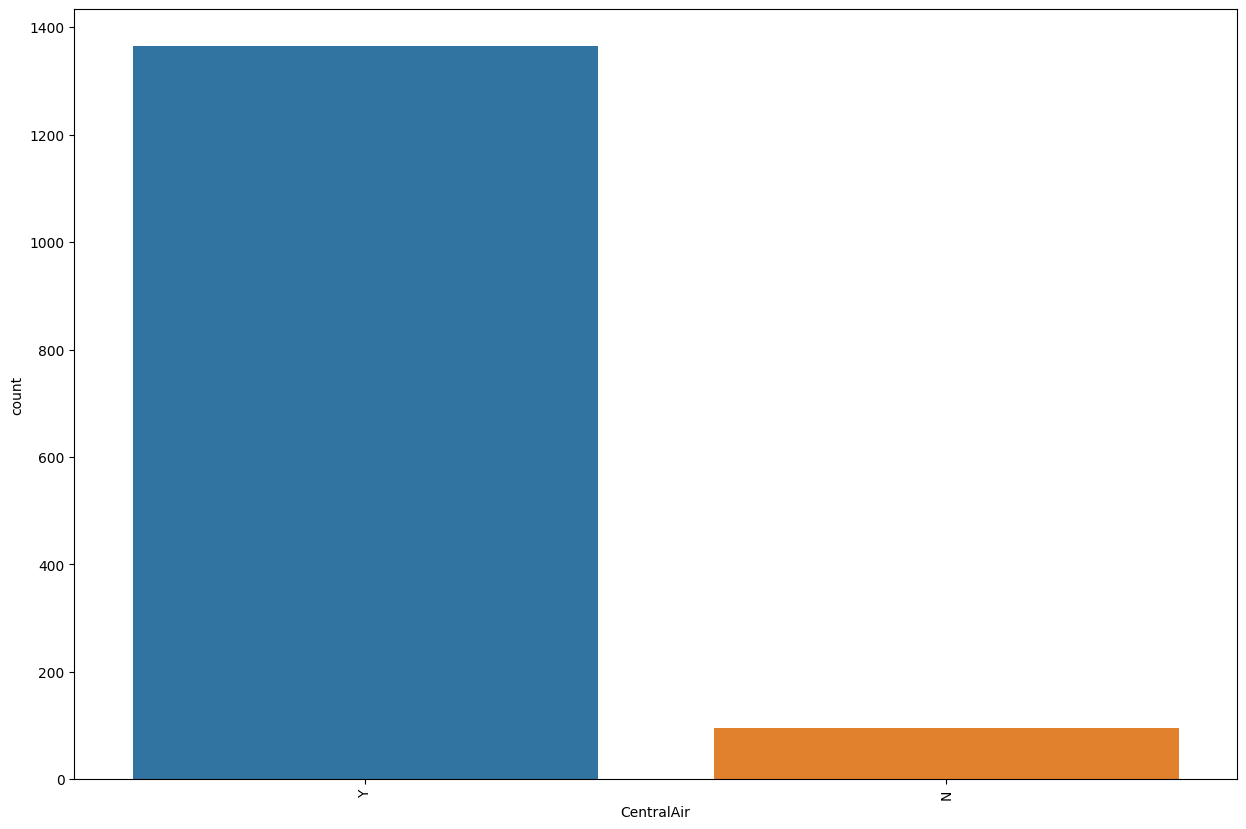

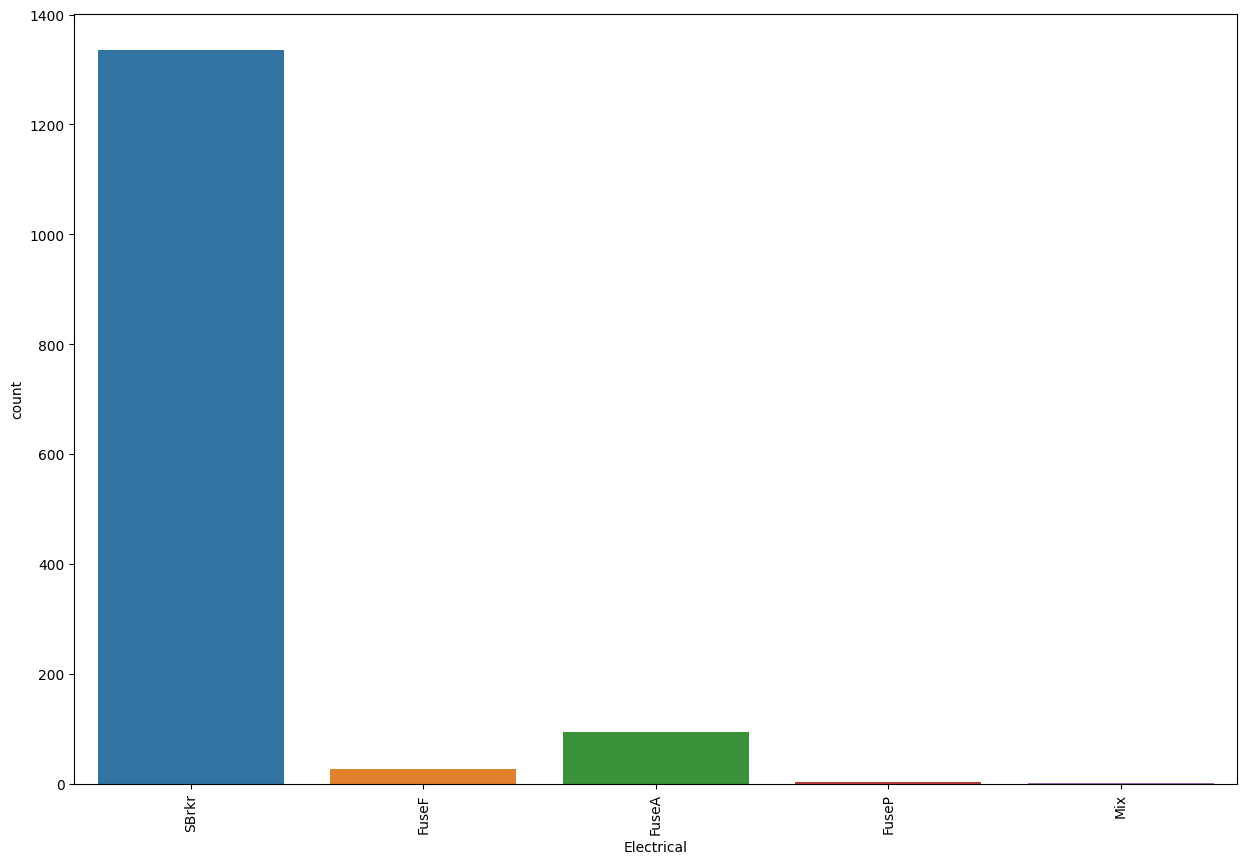

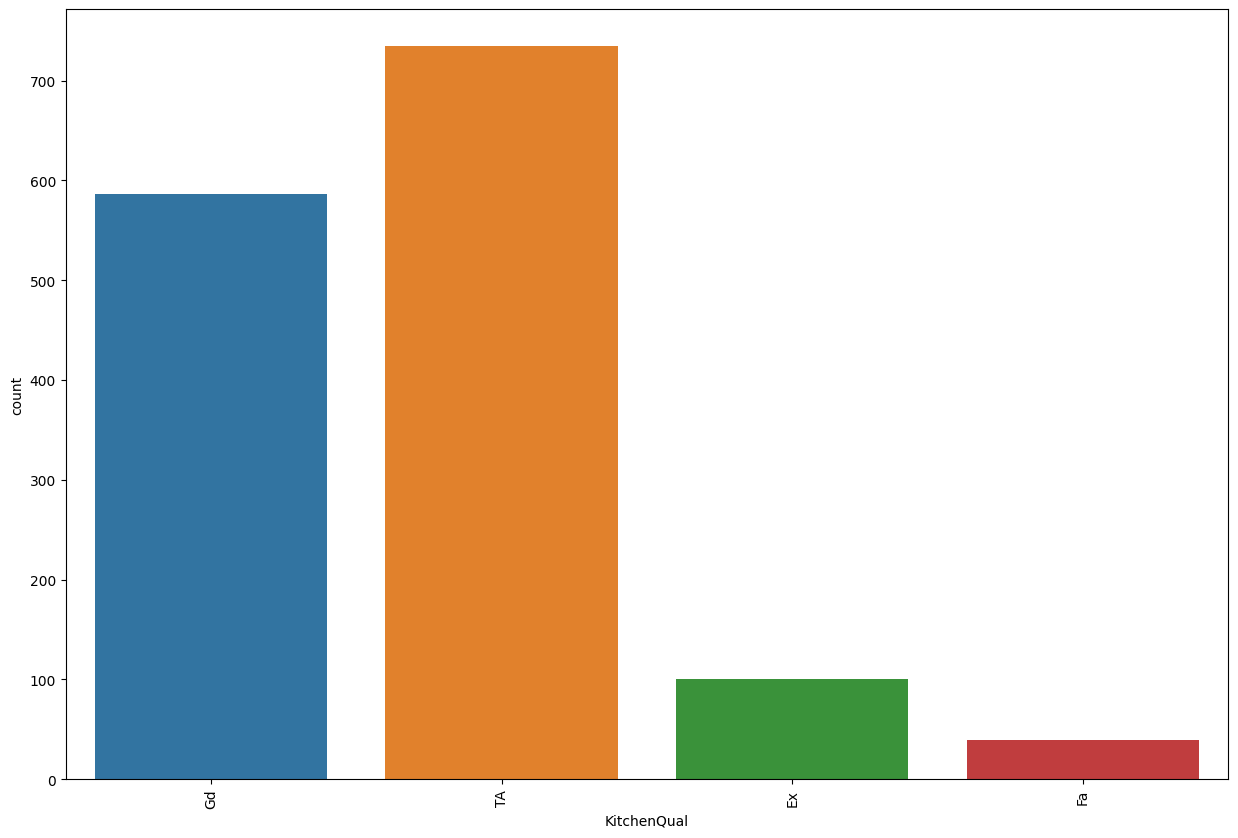

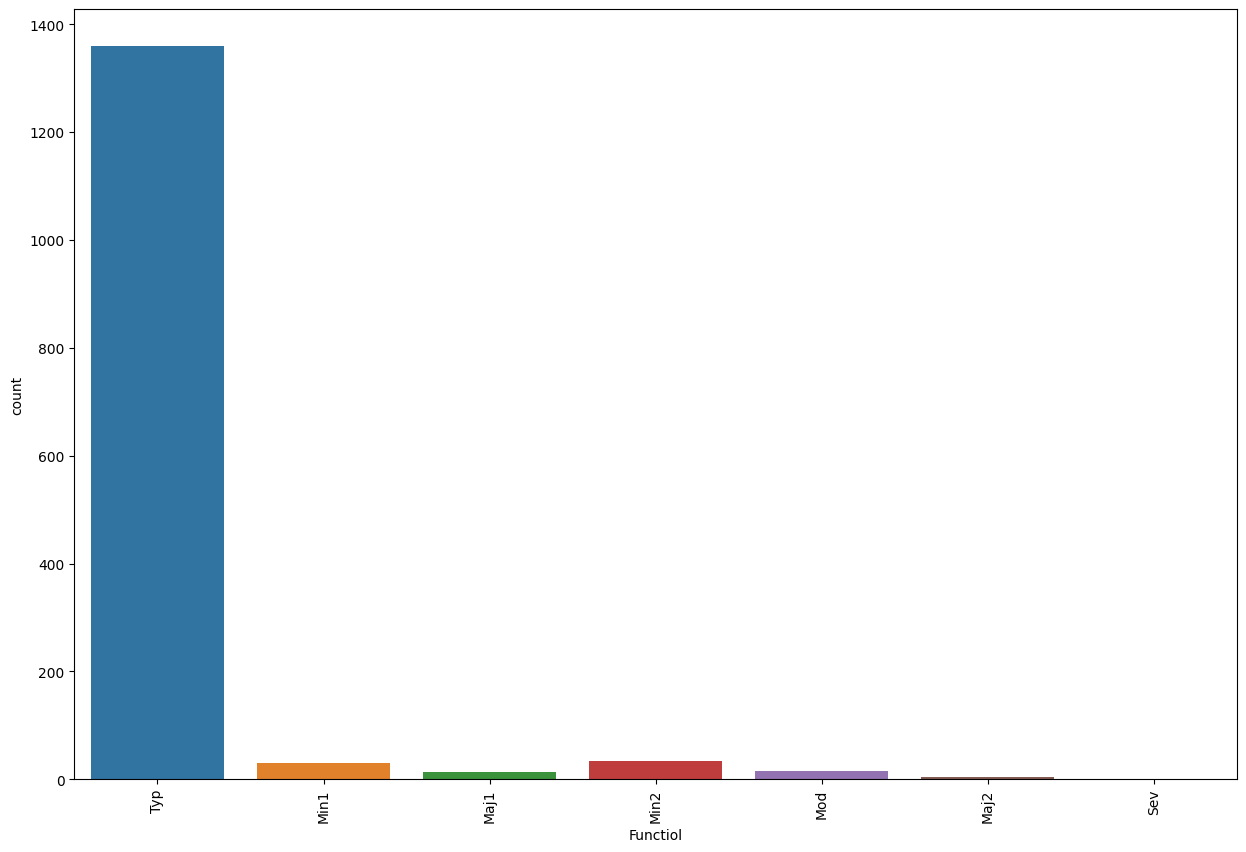

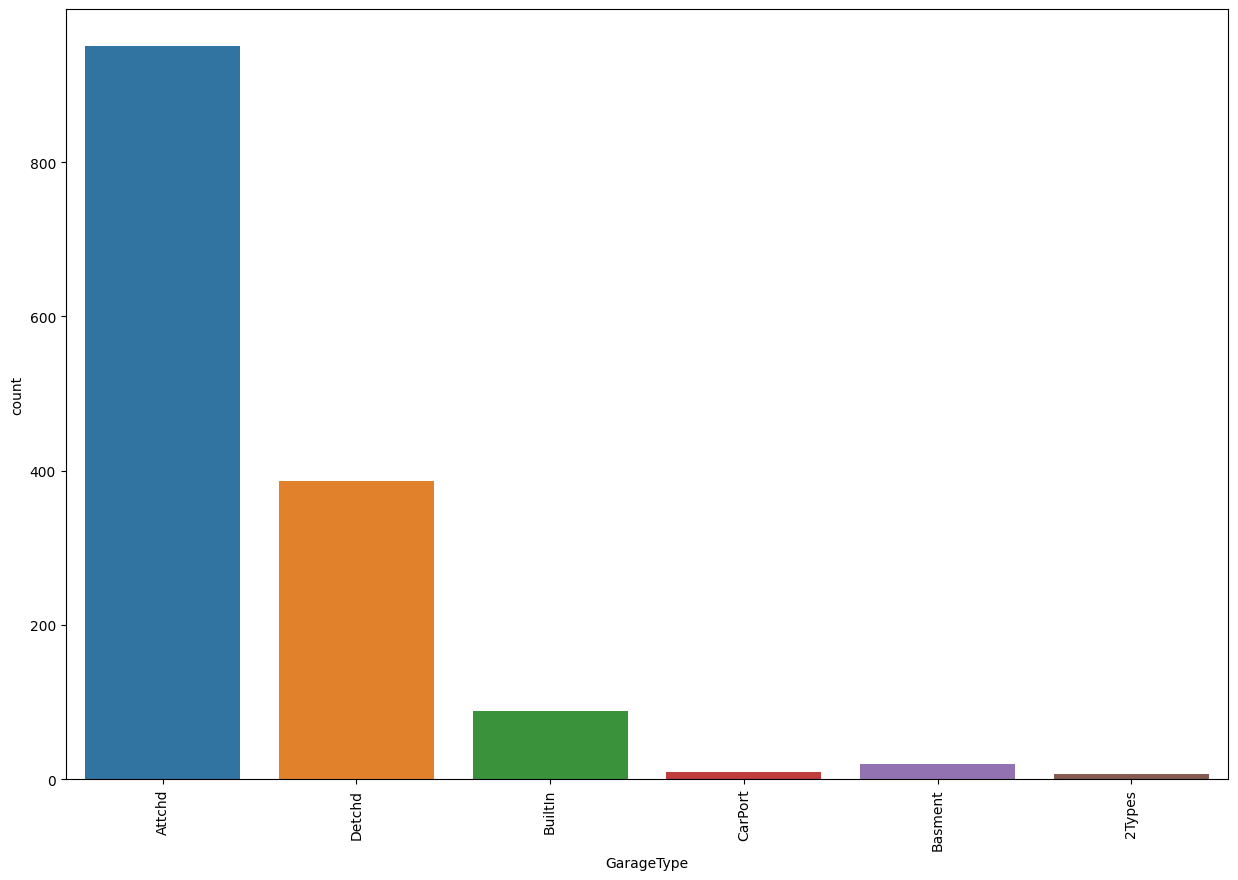

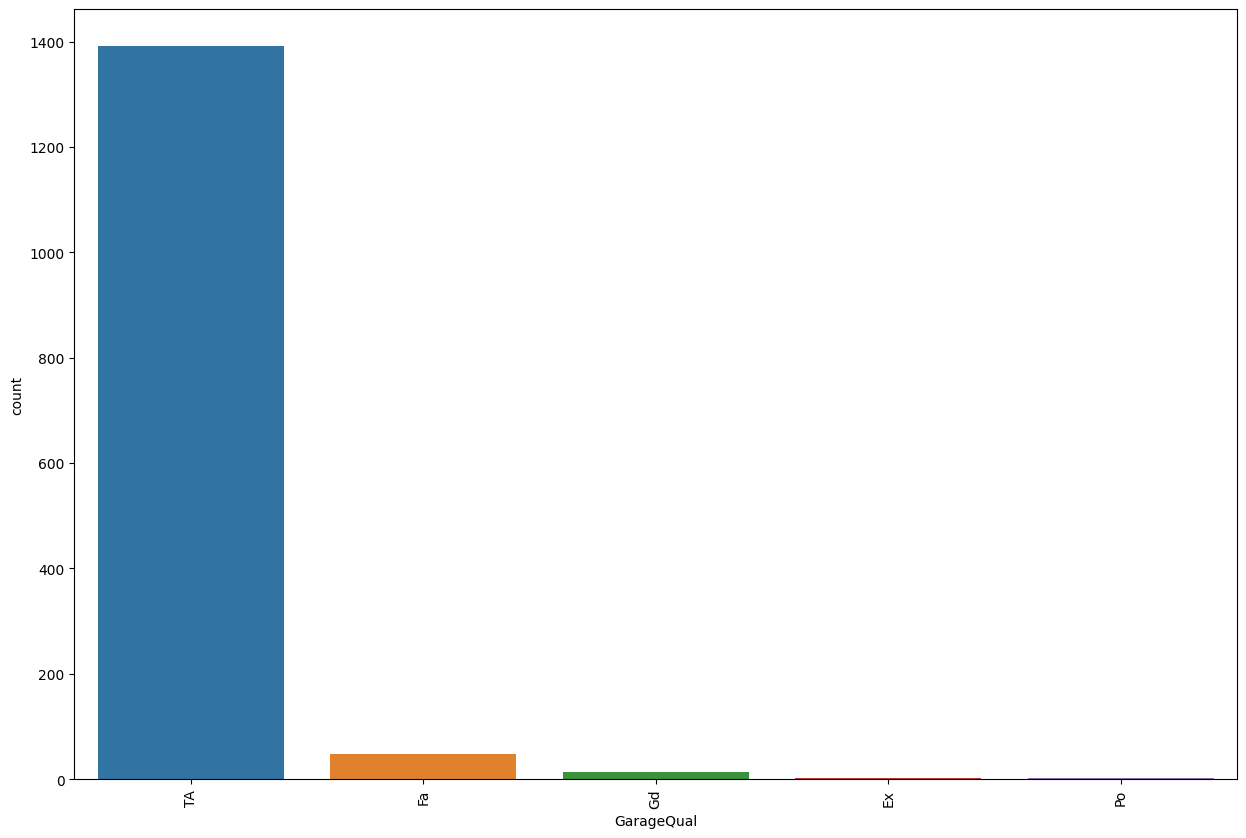

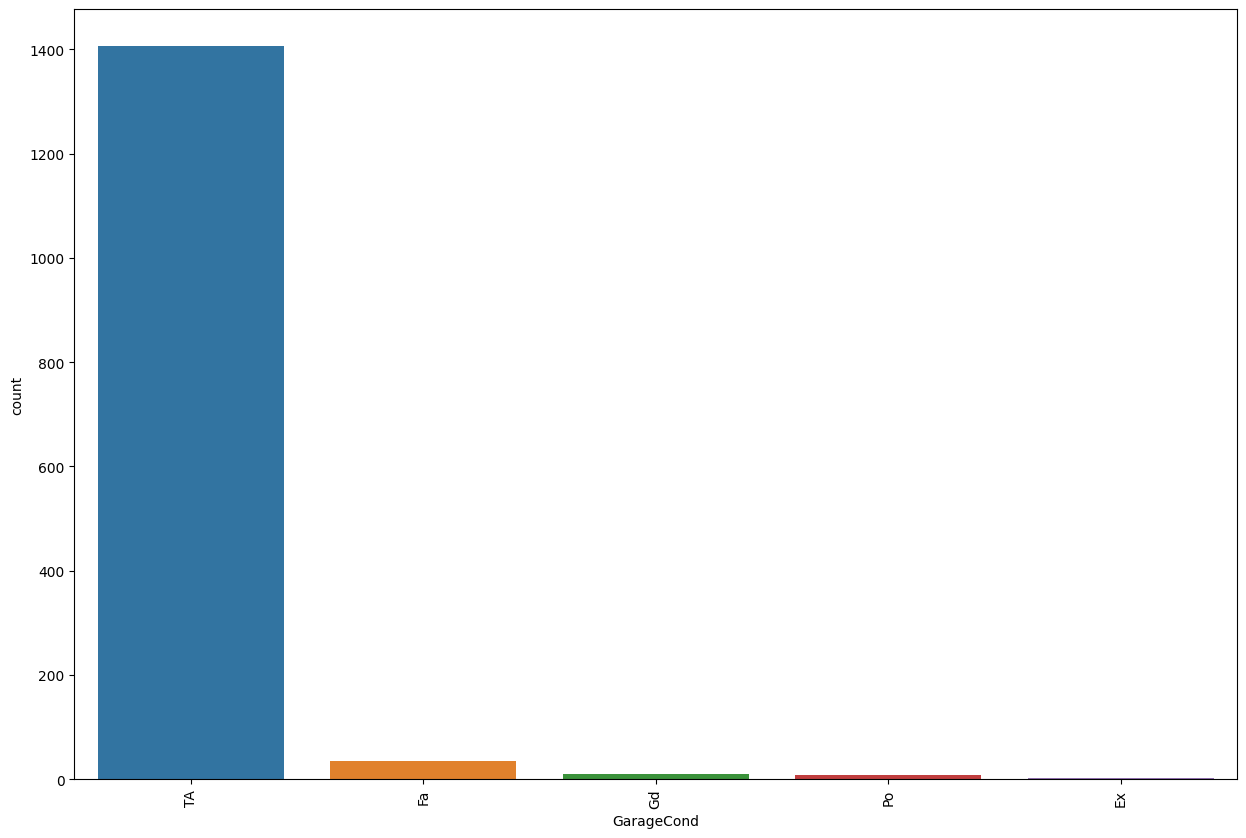

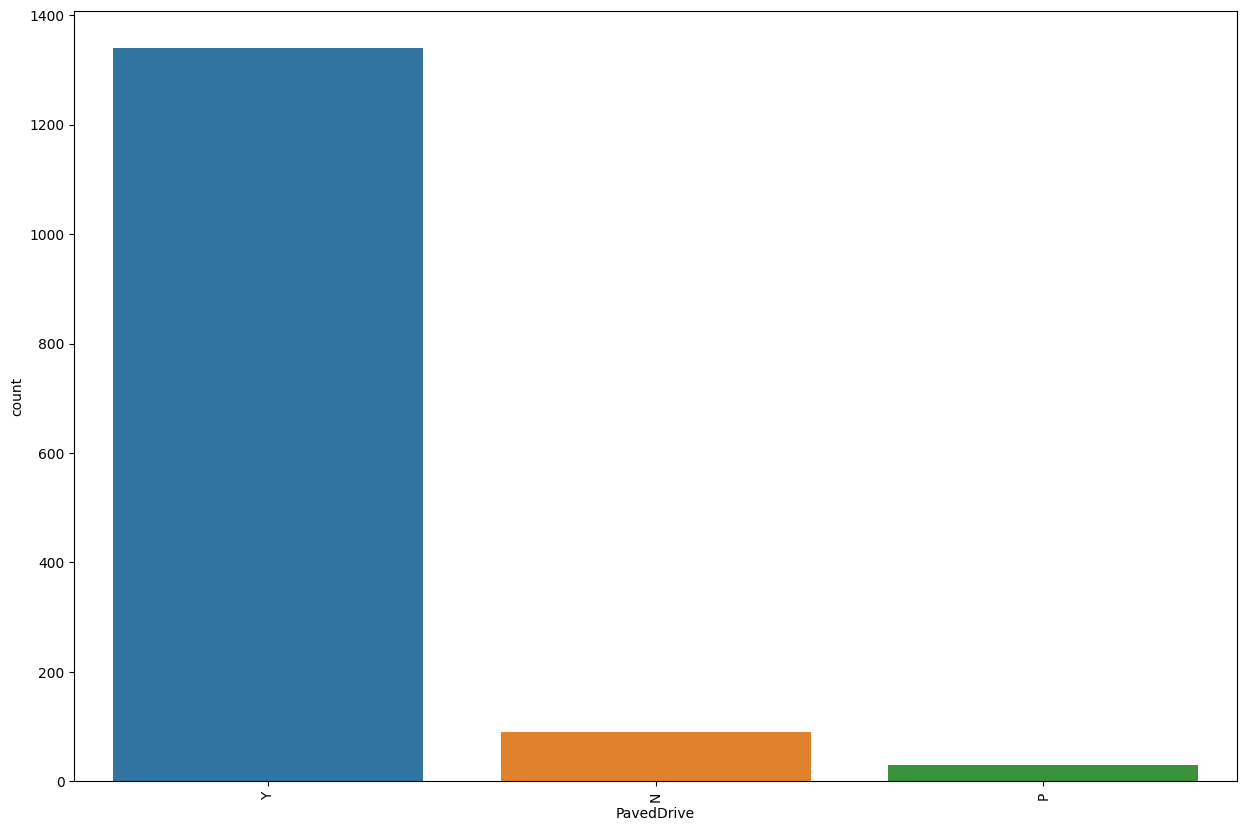

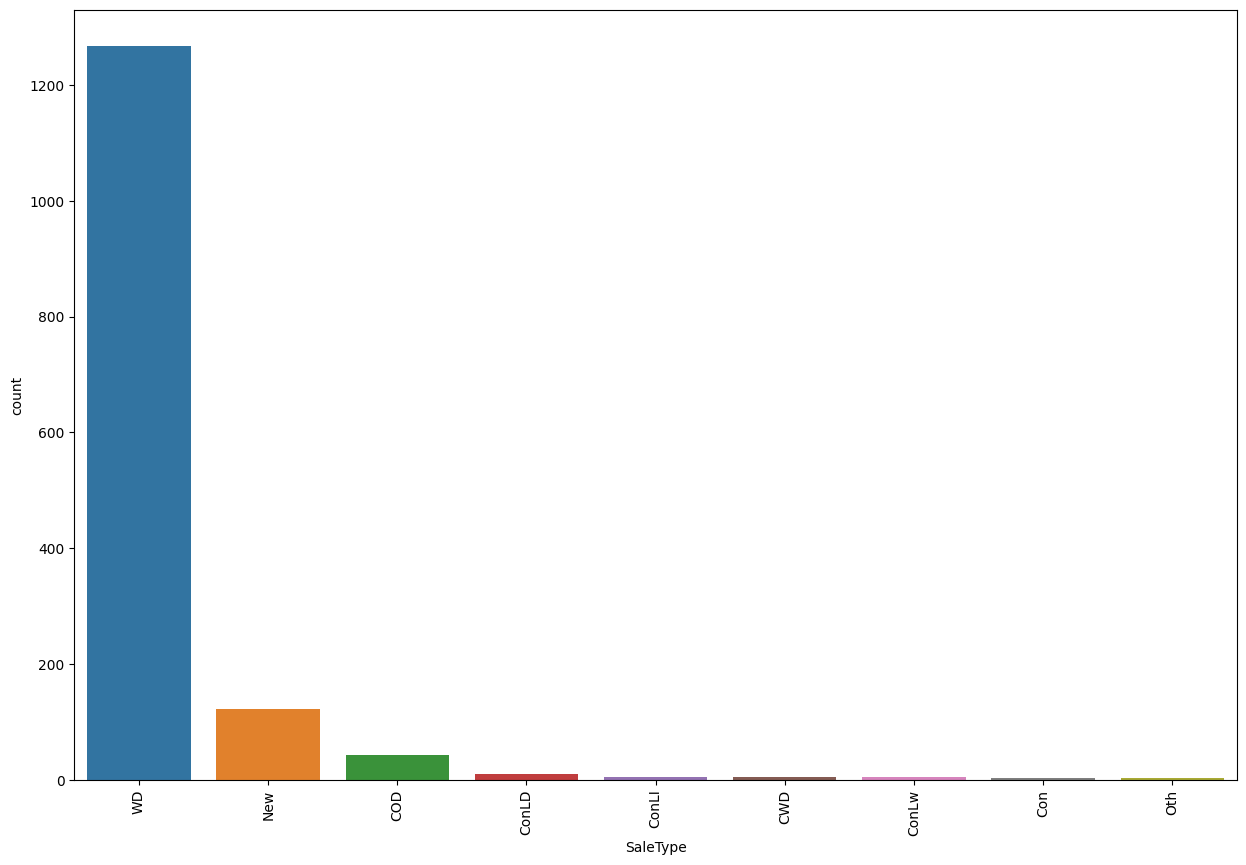

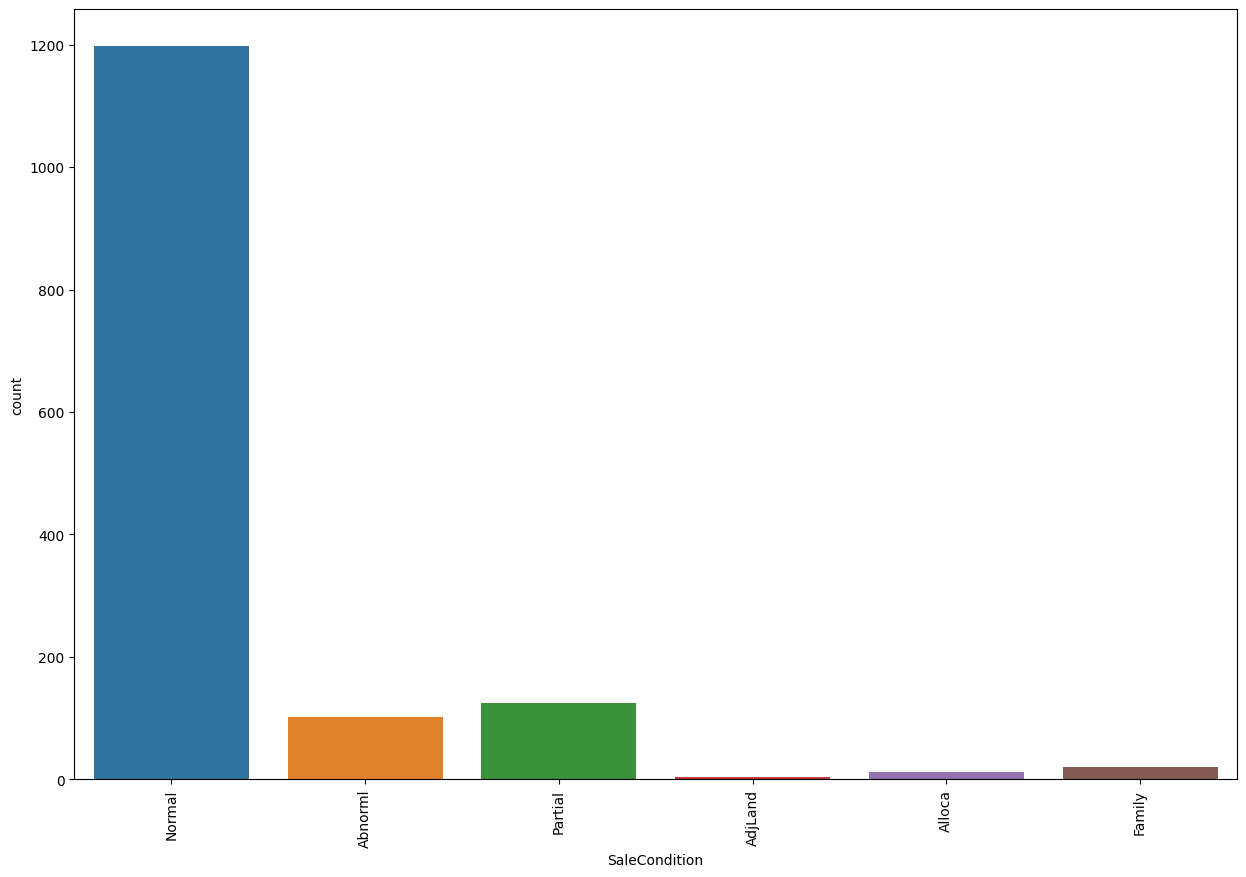

In [36]:
for cols in categorical_df.columns:
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=90)
    sns.countplot(x=cols,data=categorical_df)

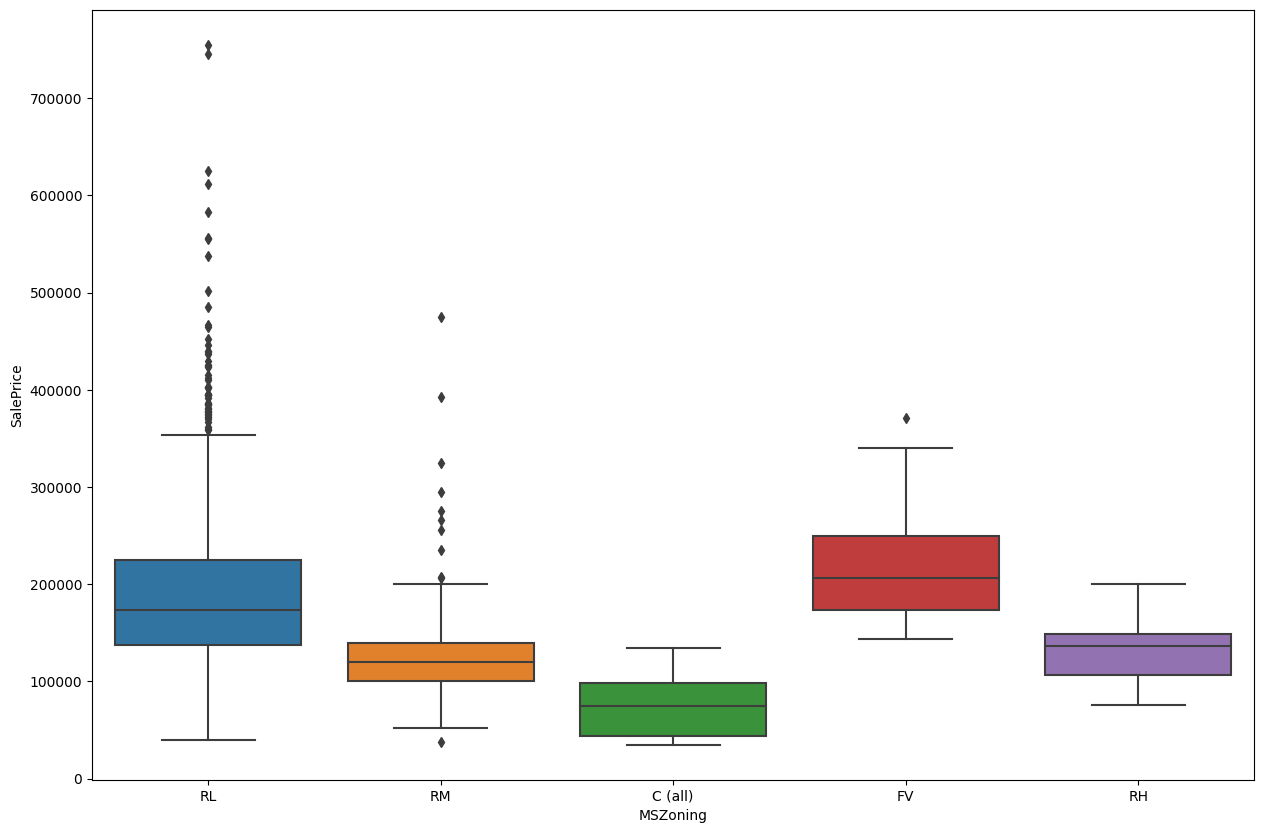

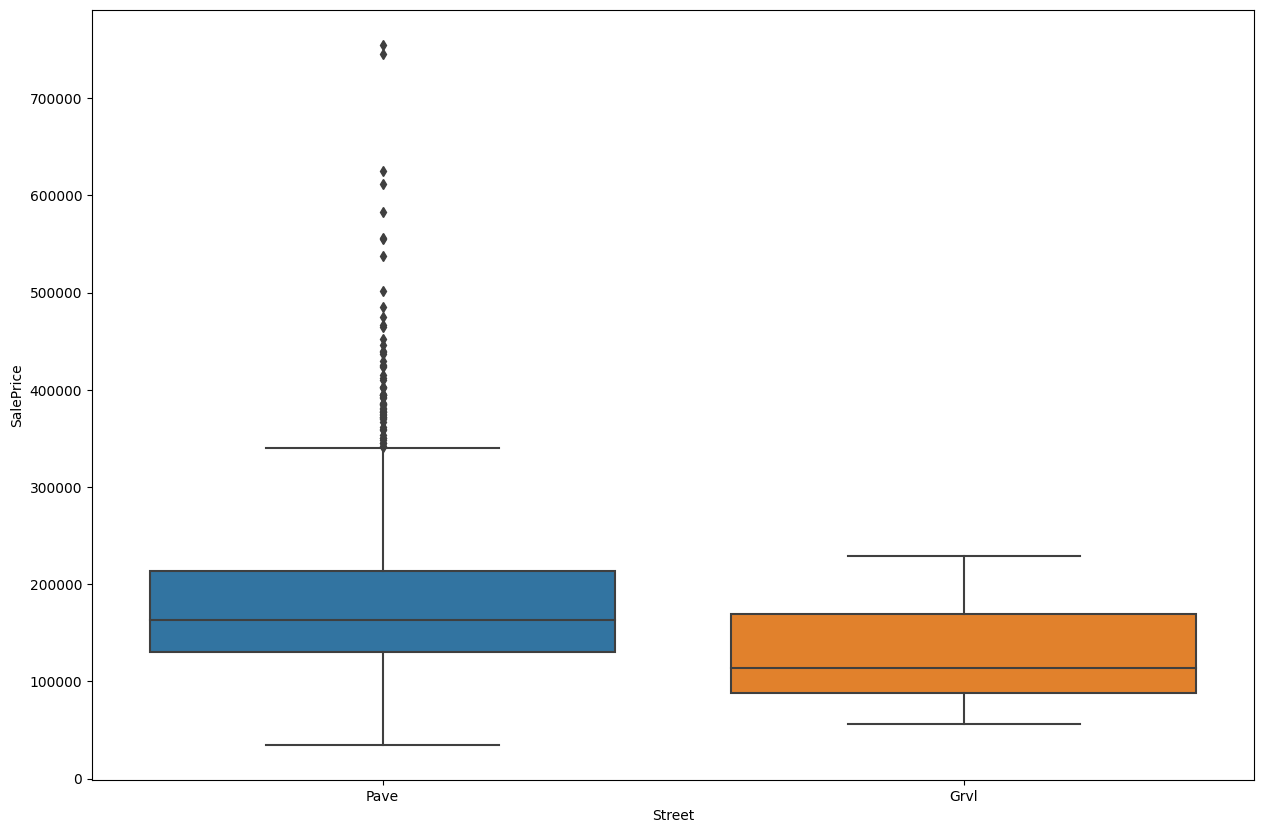

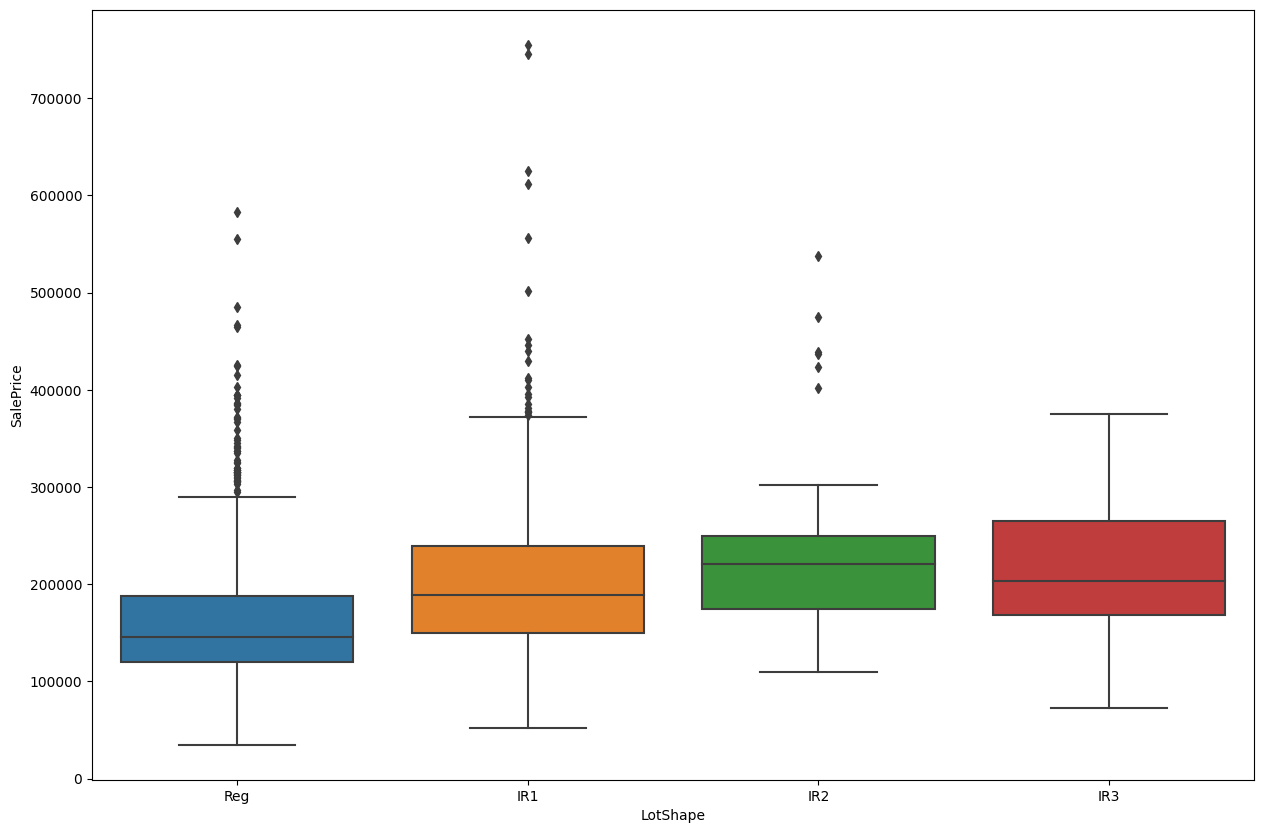

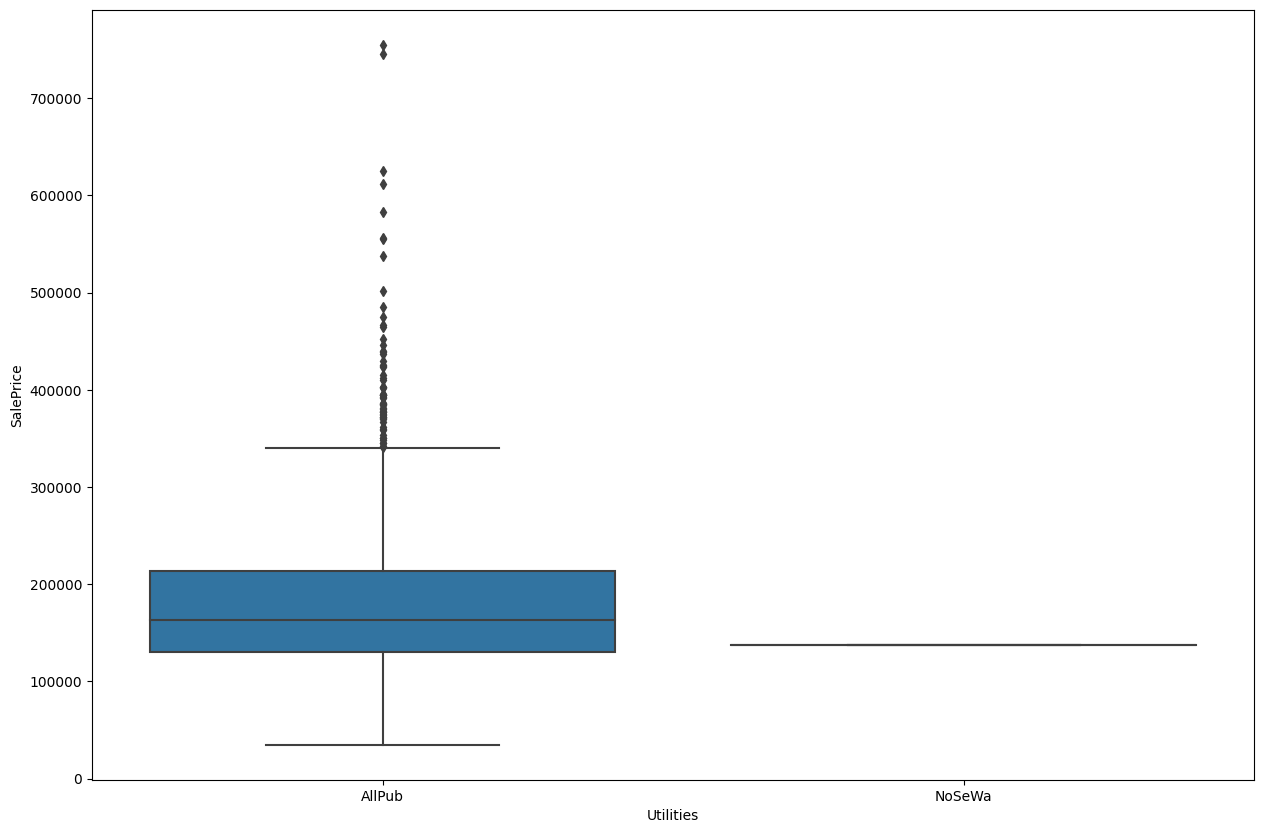

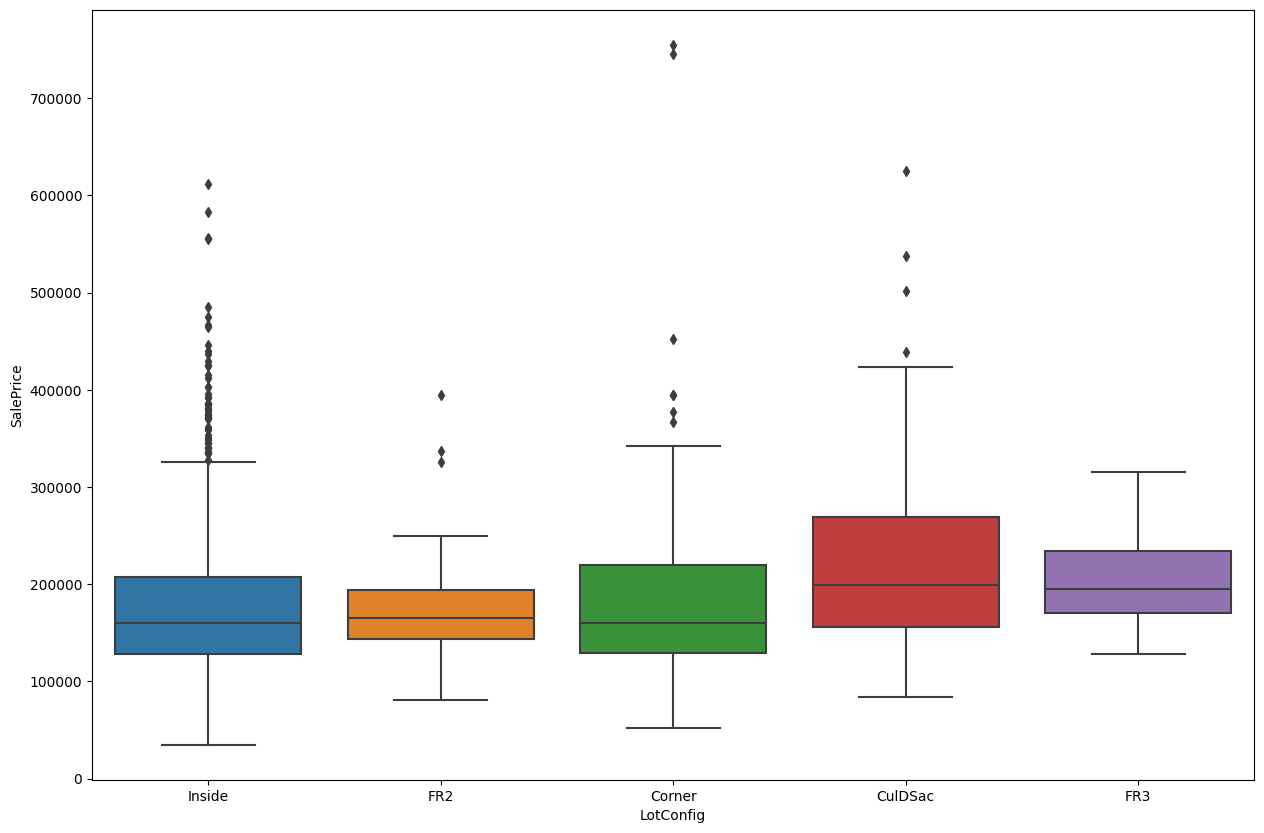

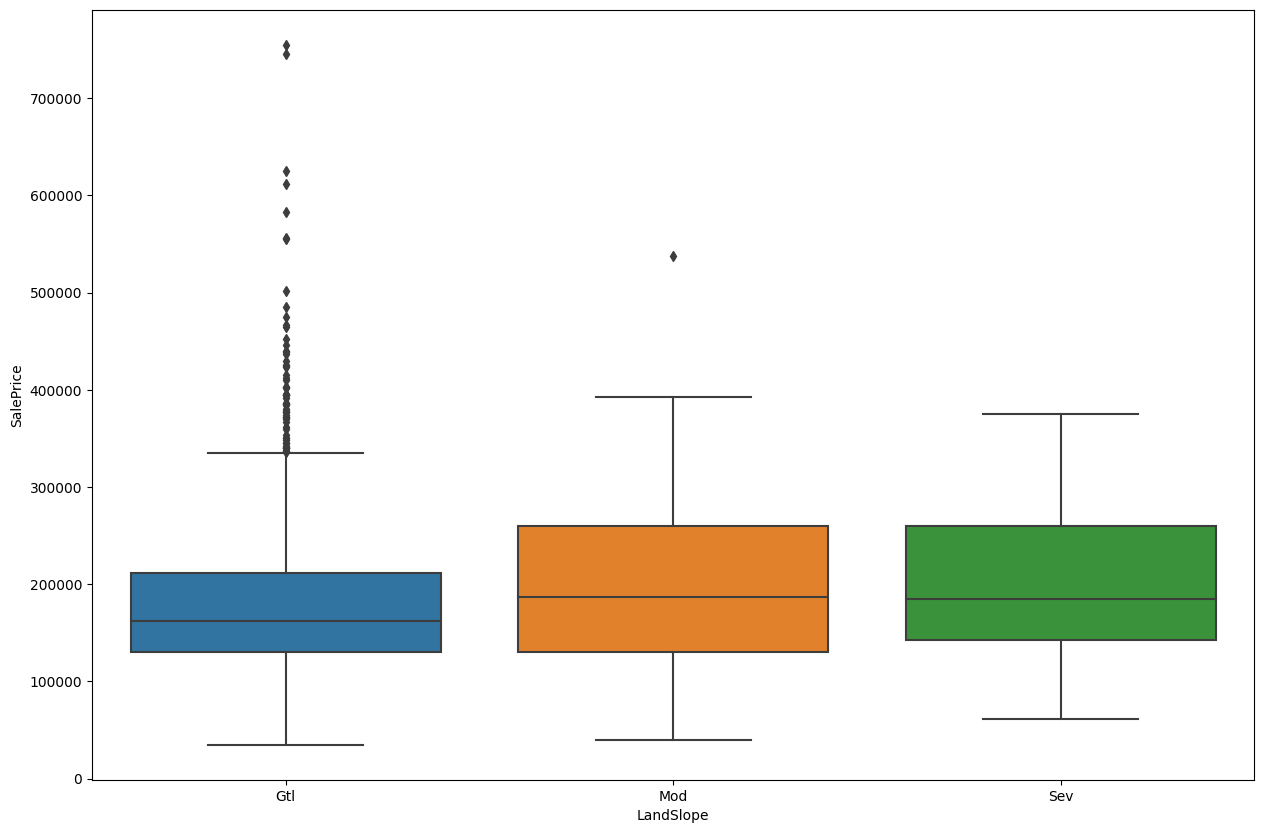

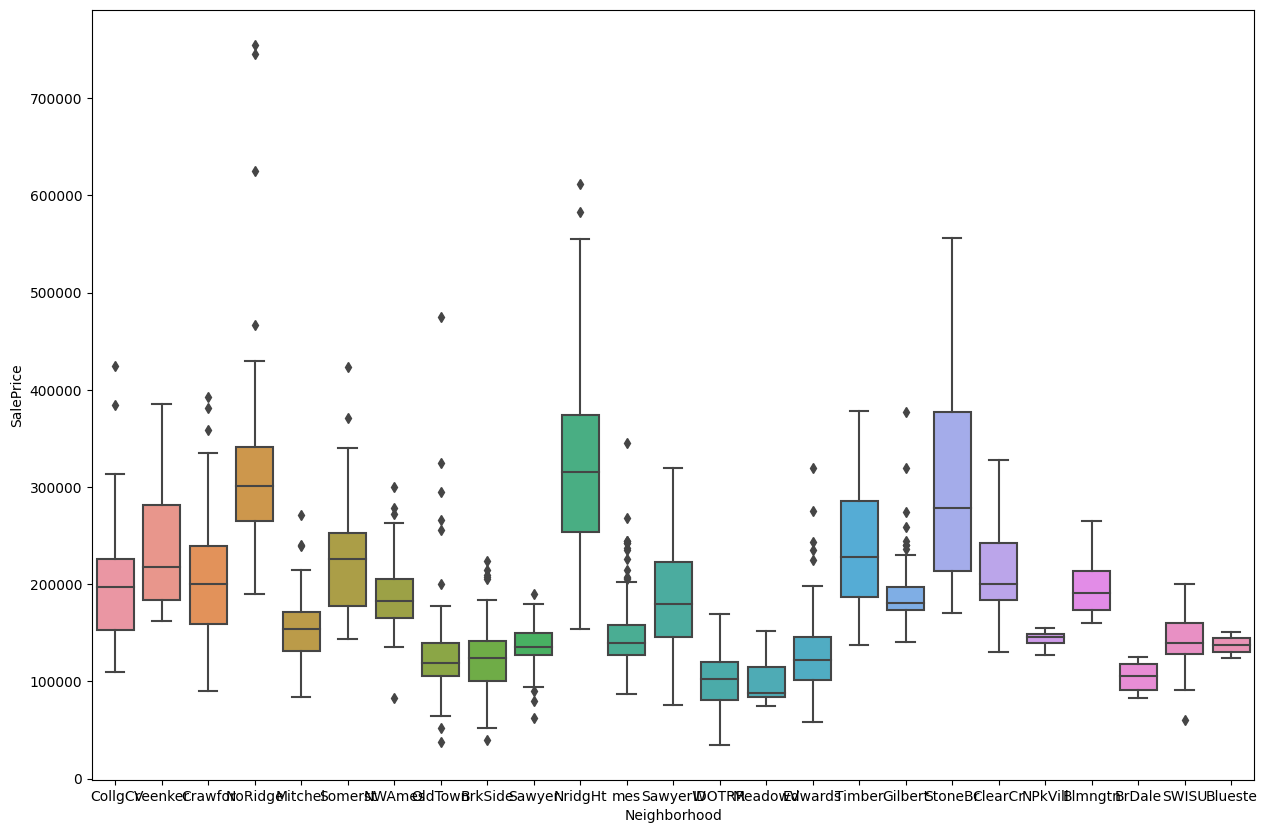

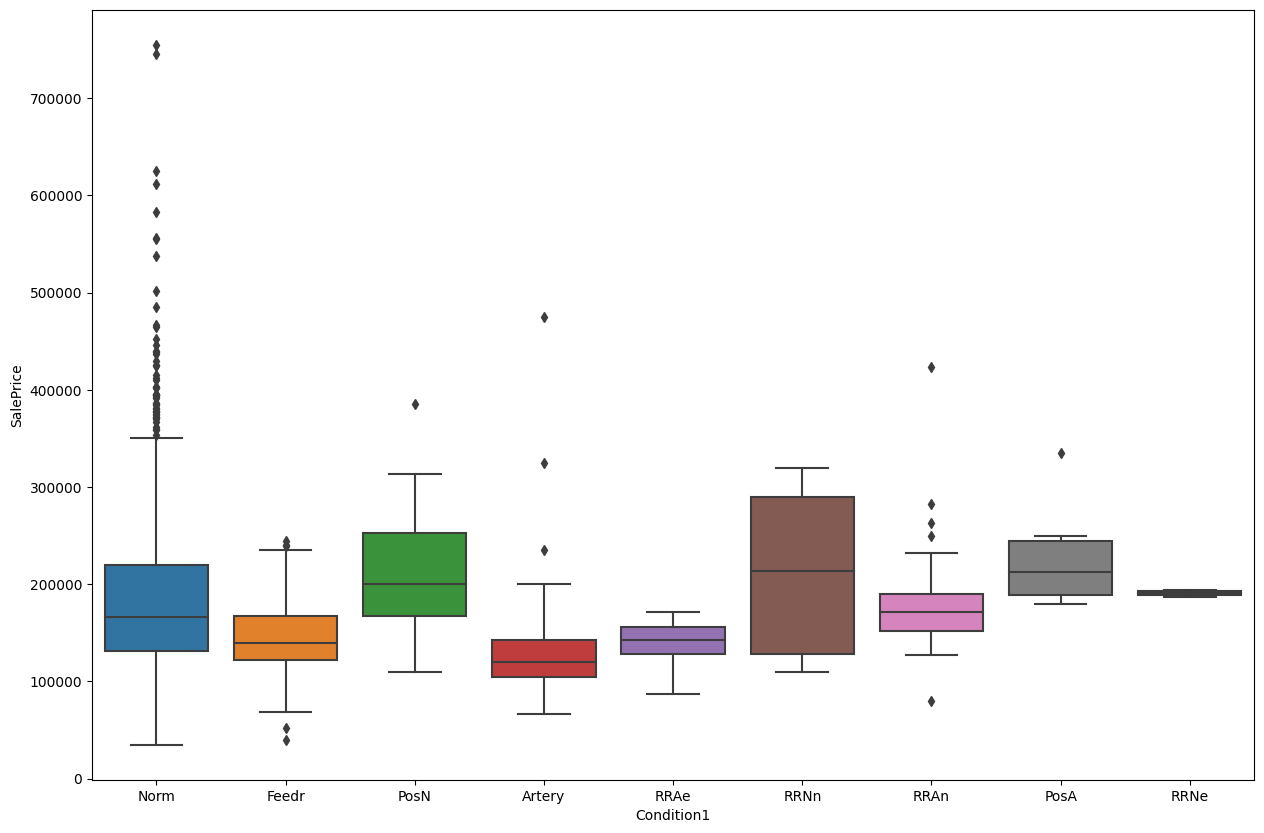

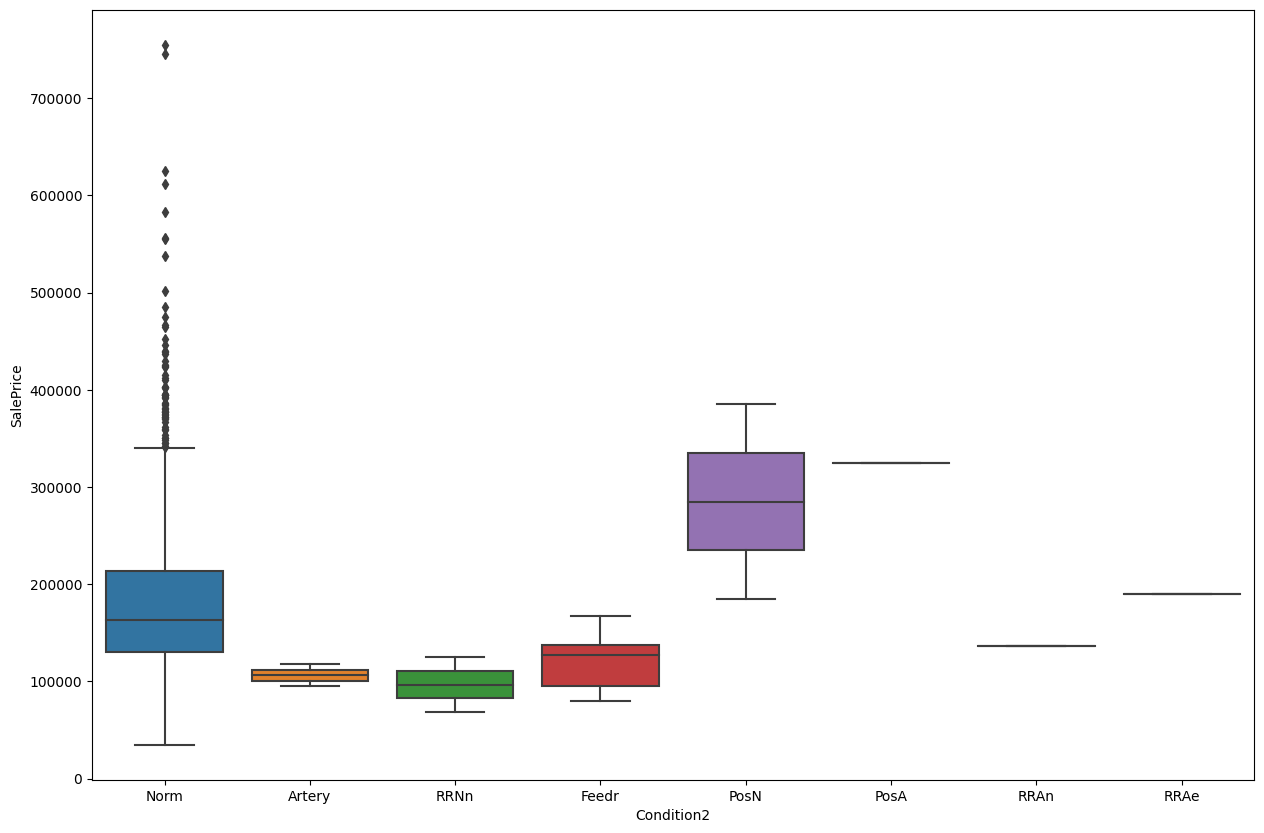

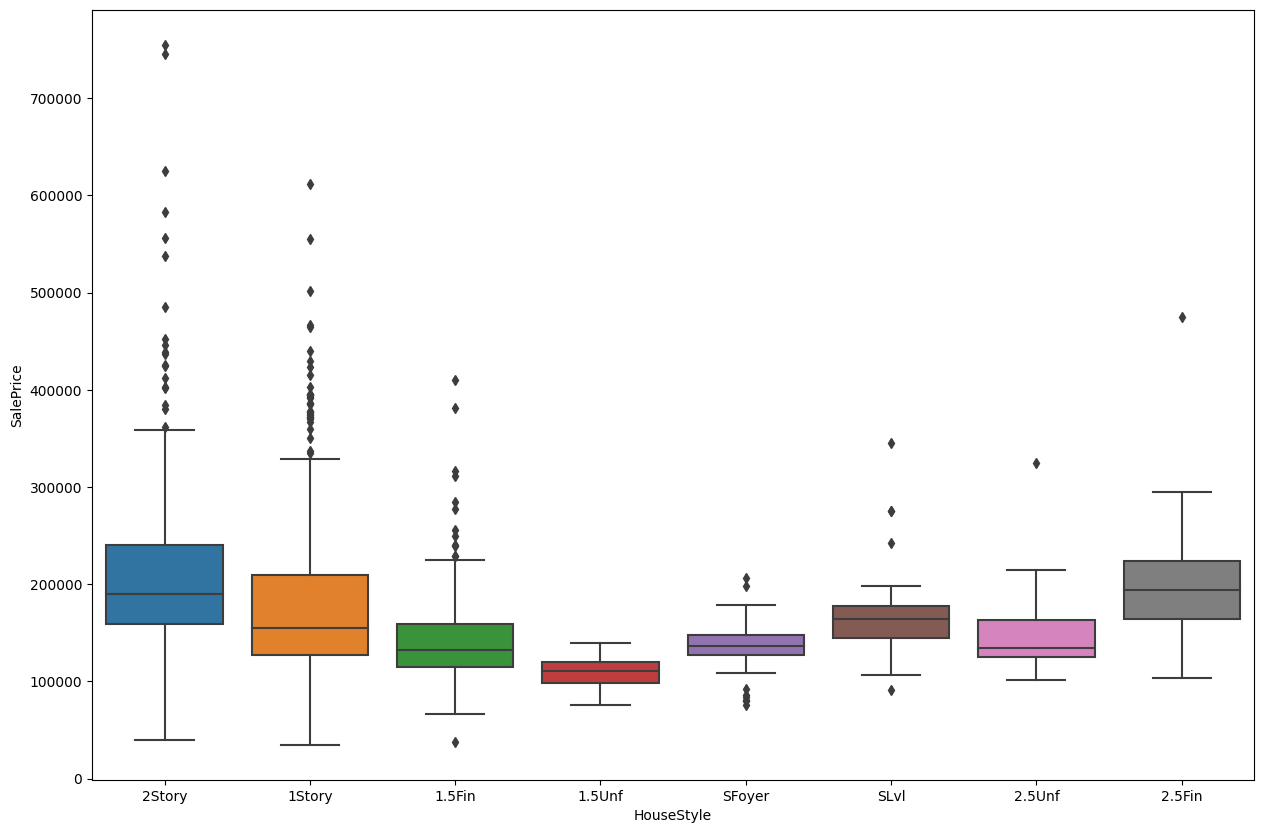

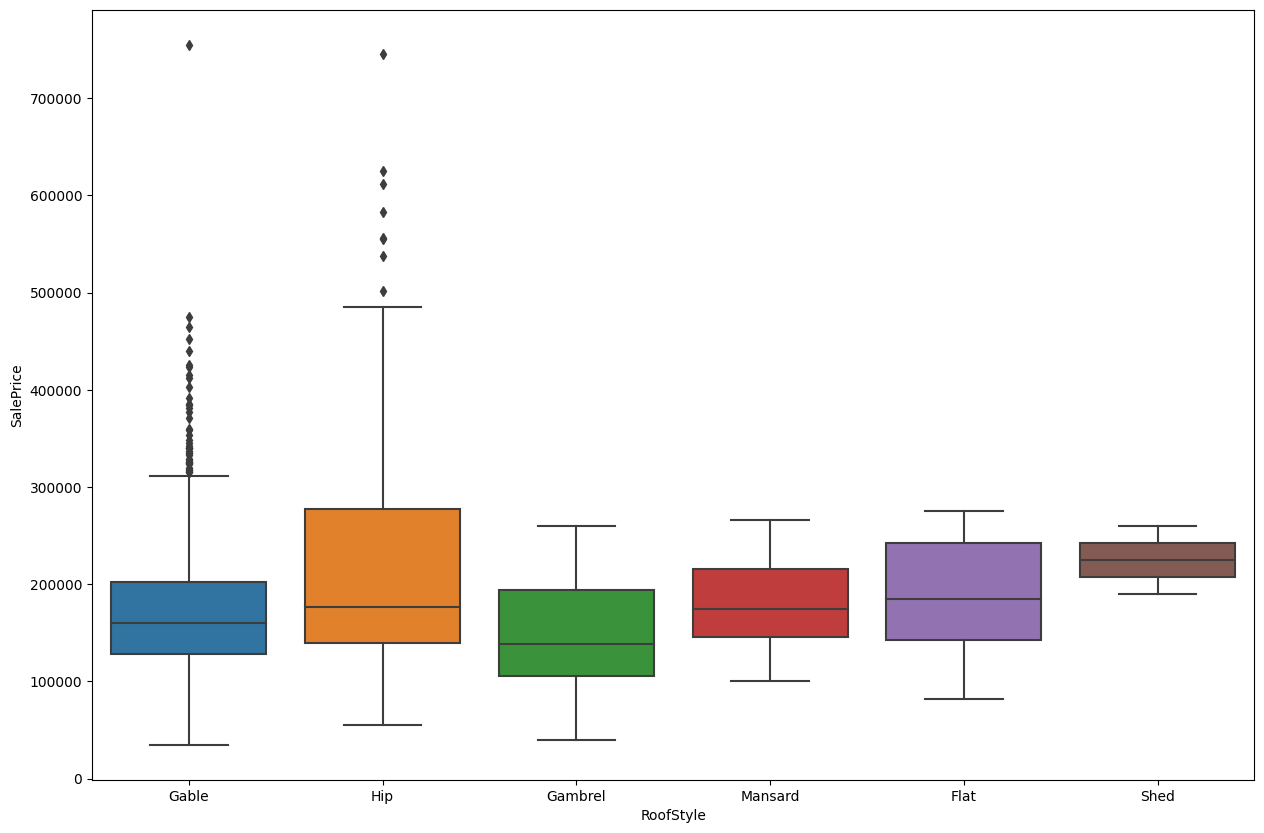

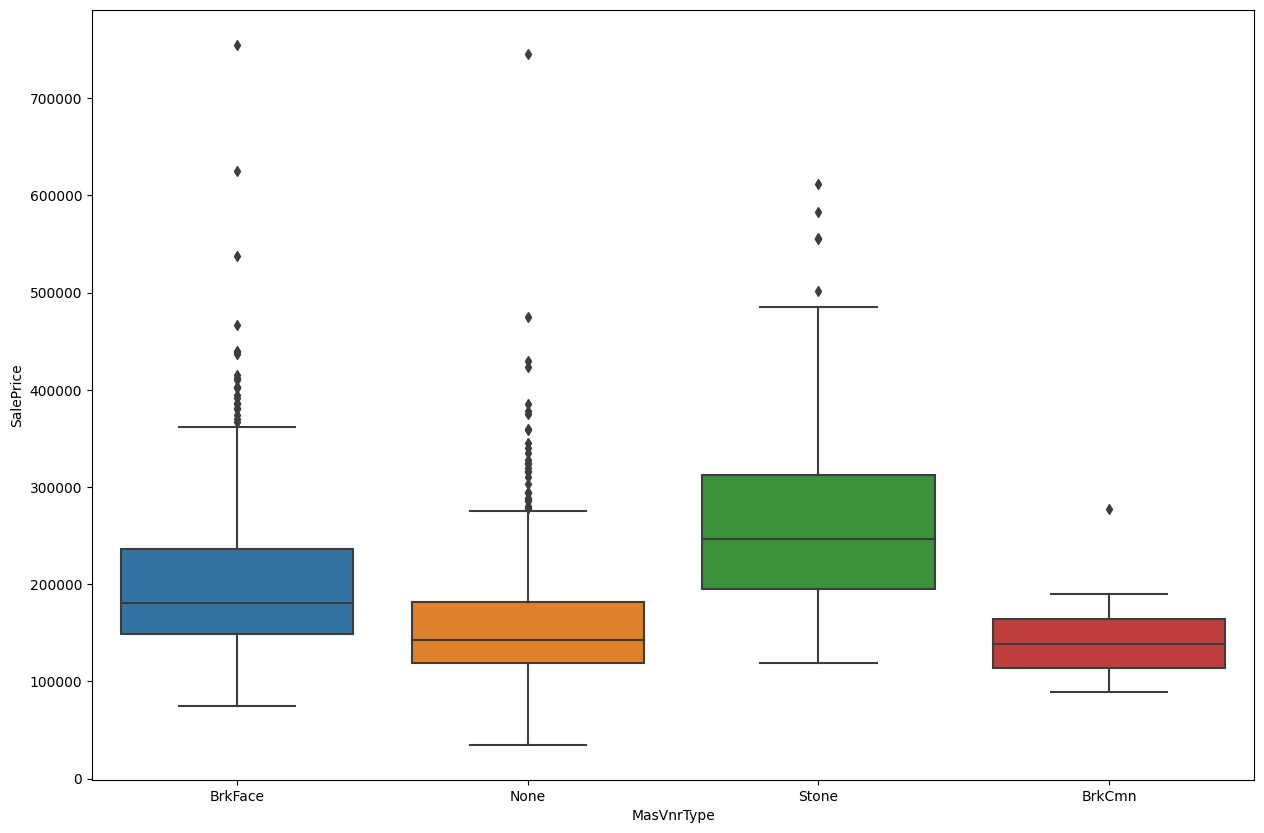

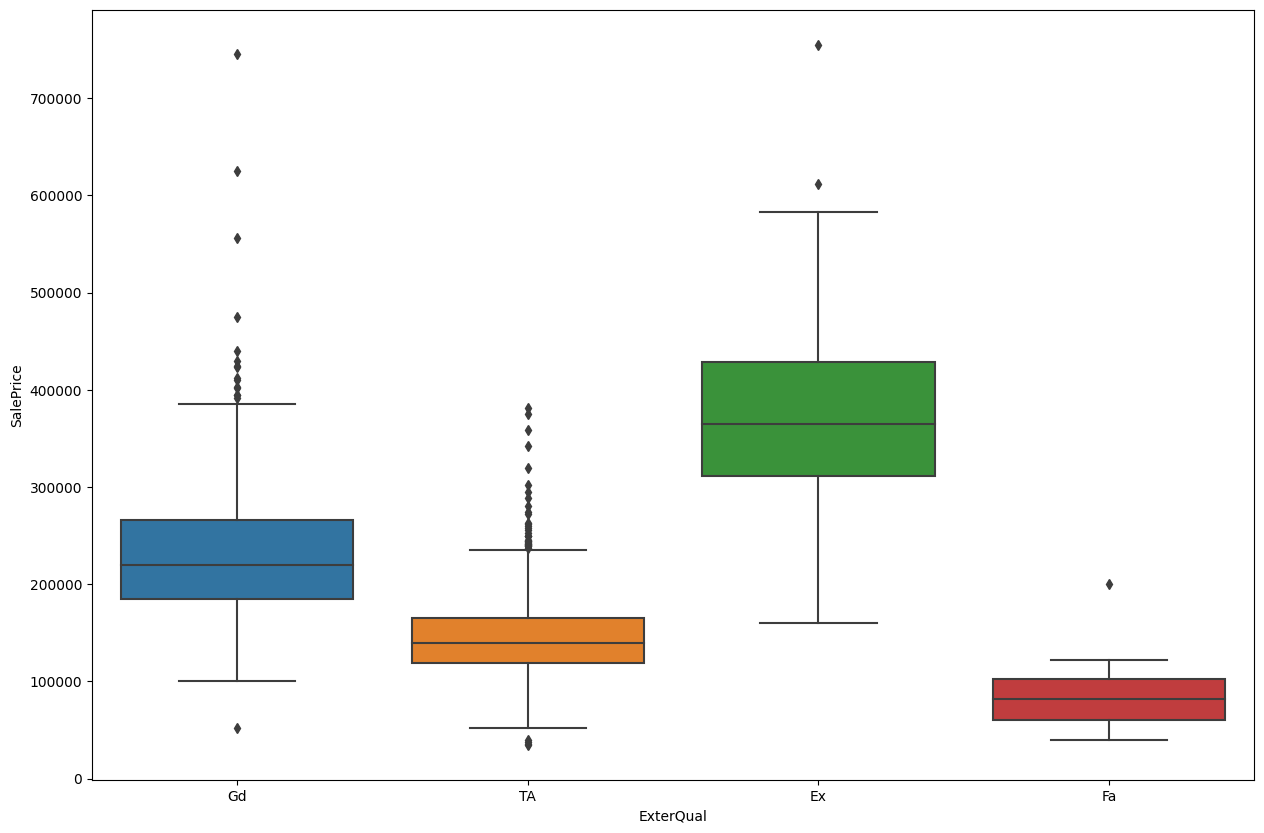

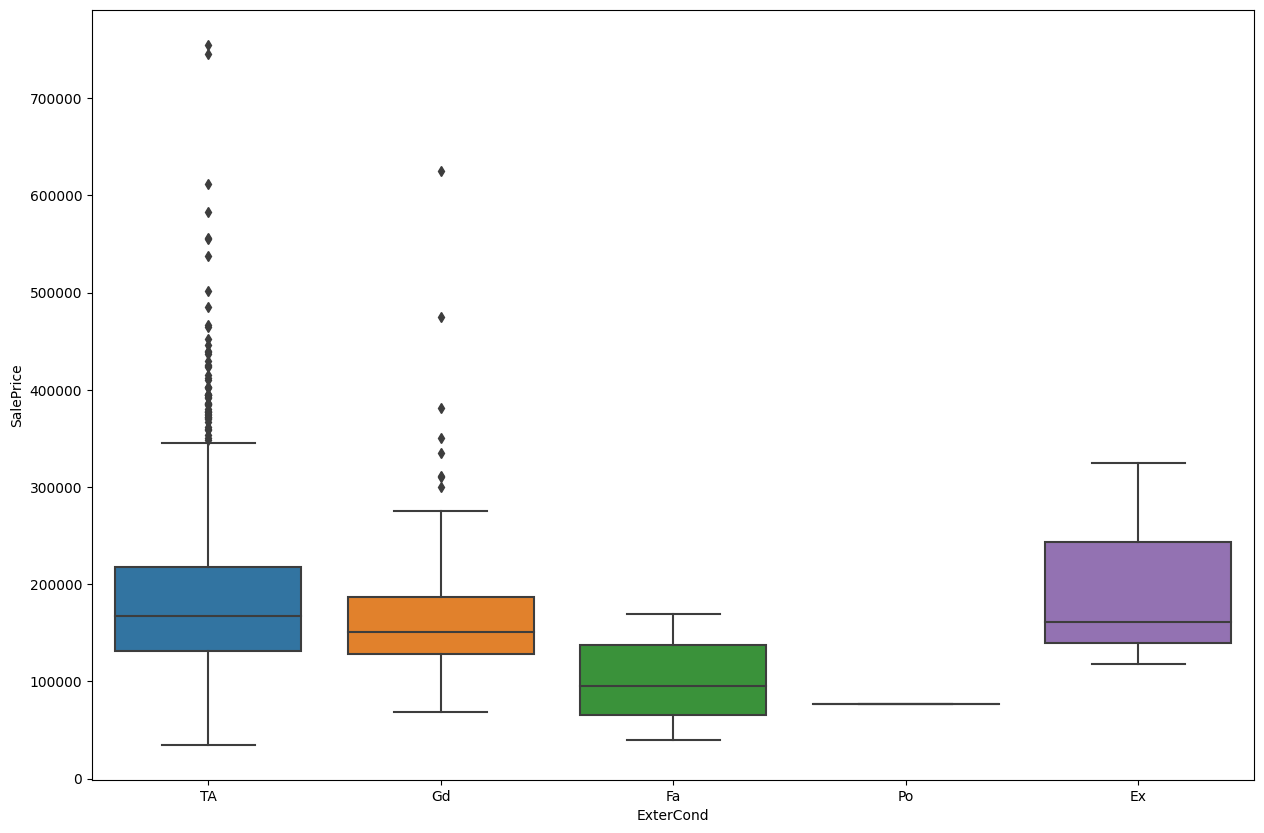

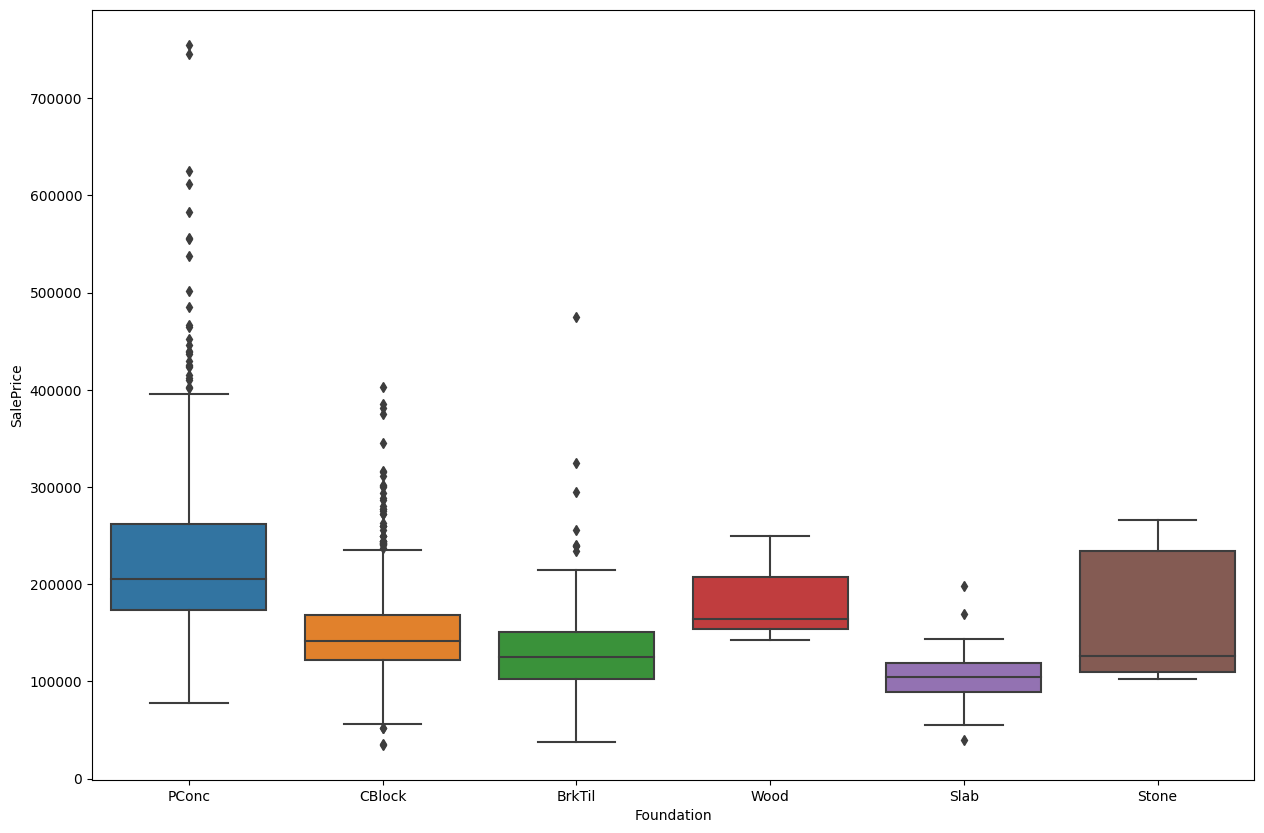

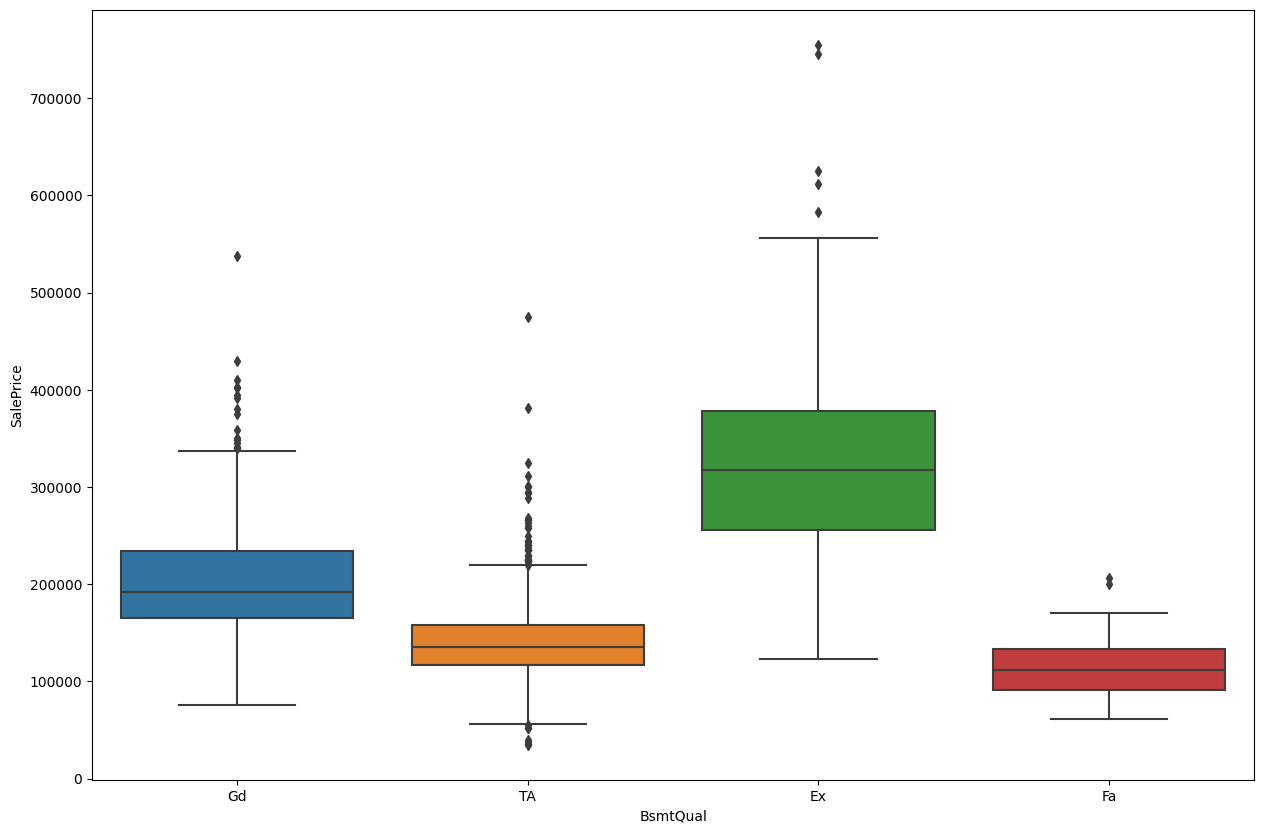

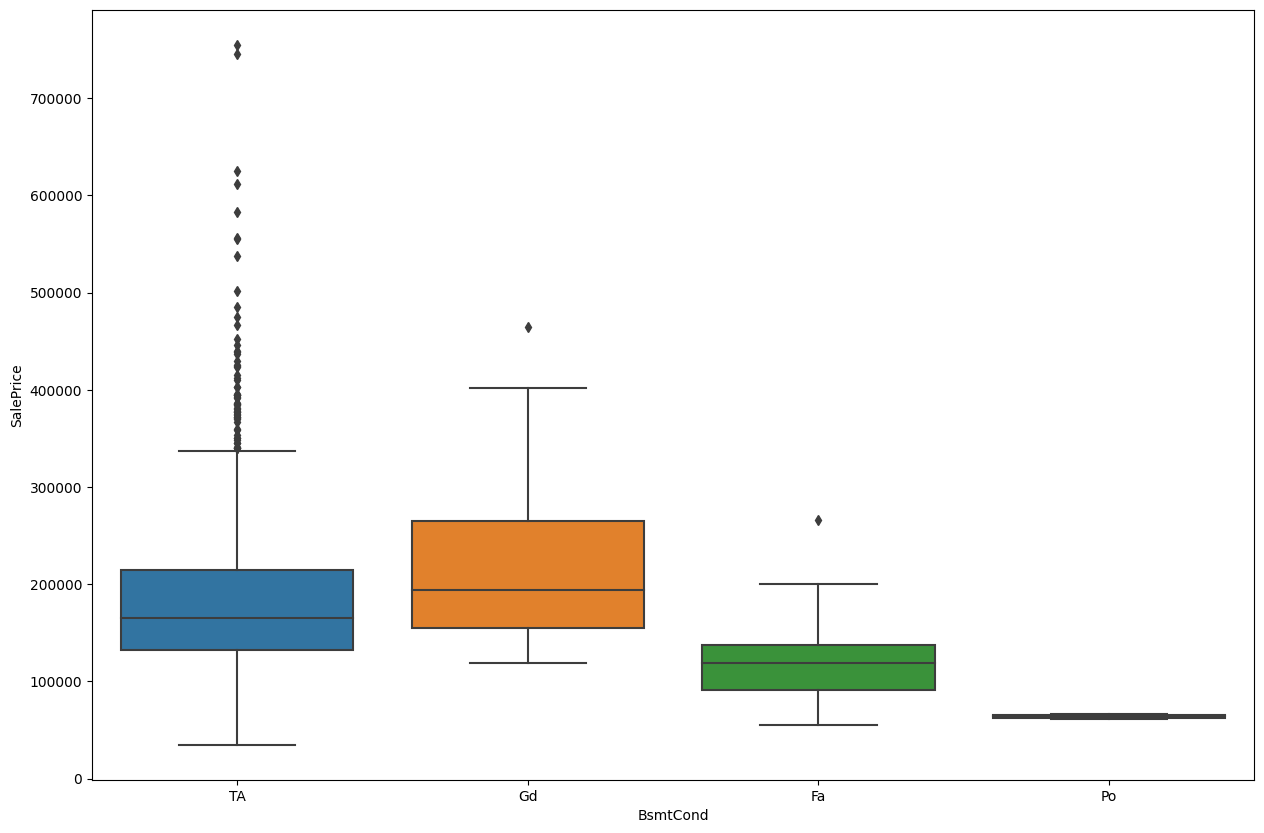

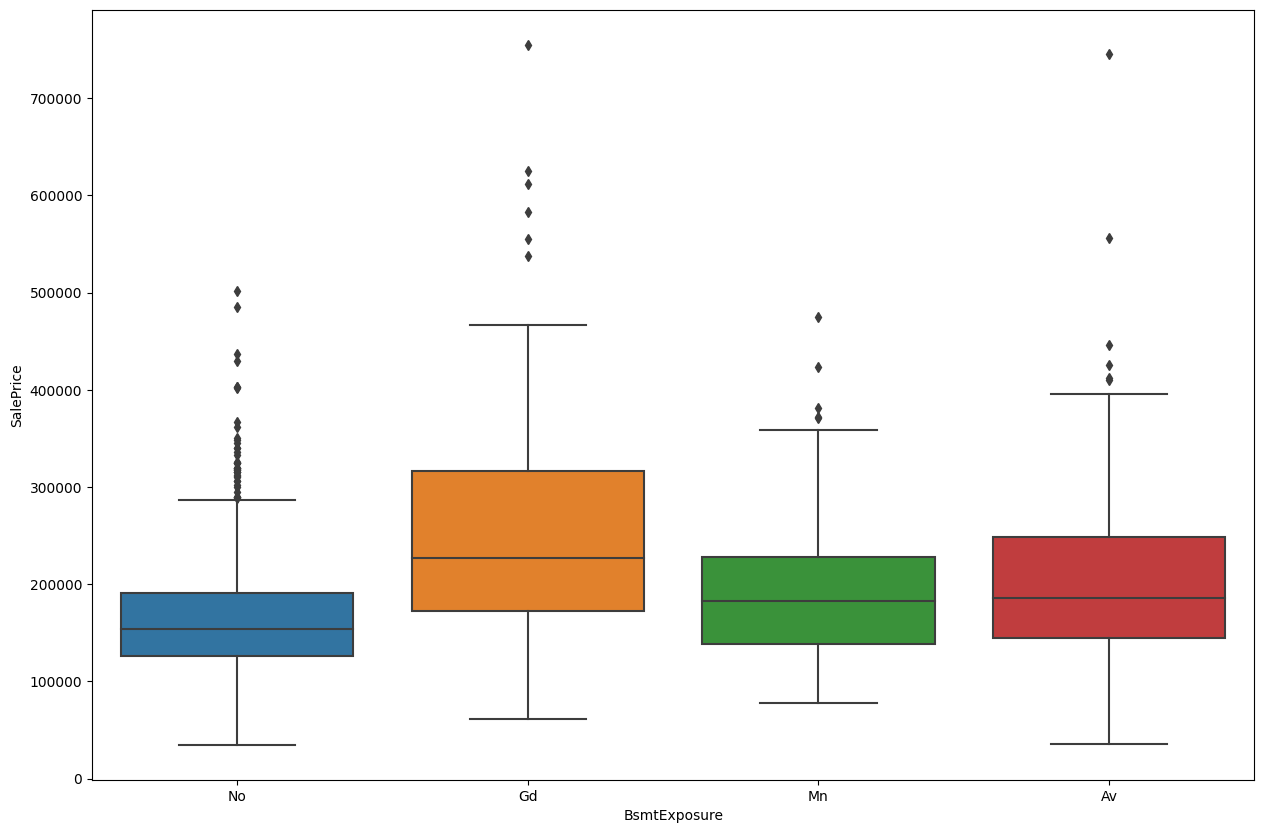

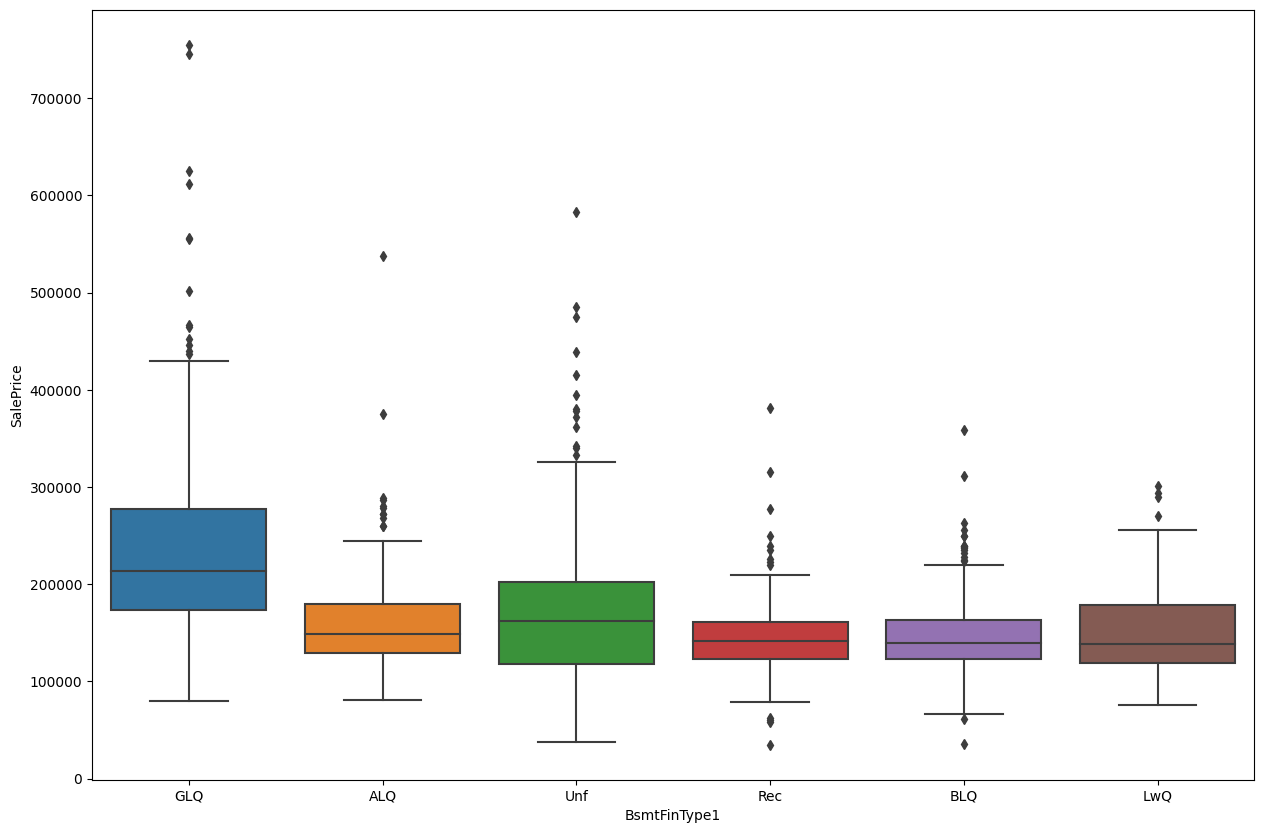

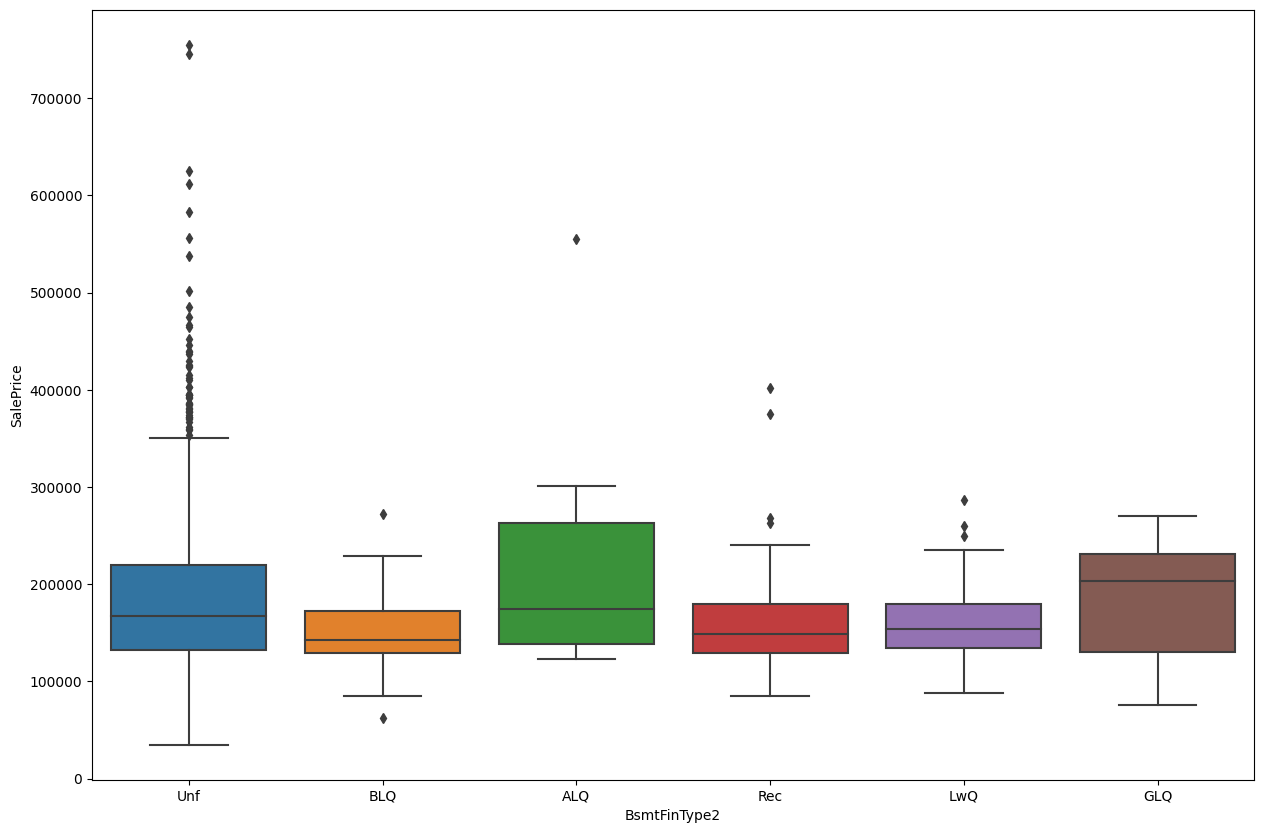

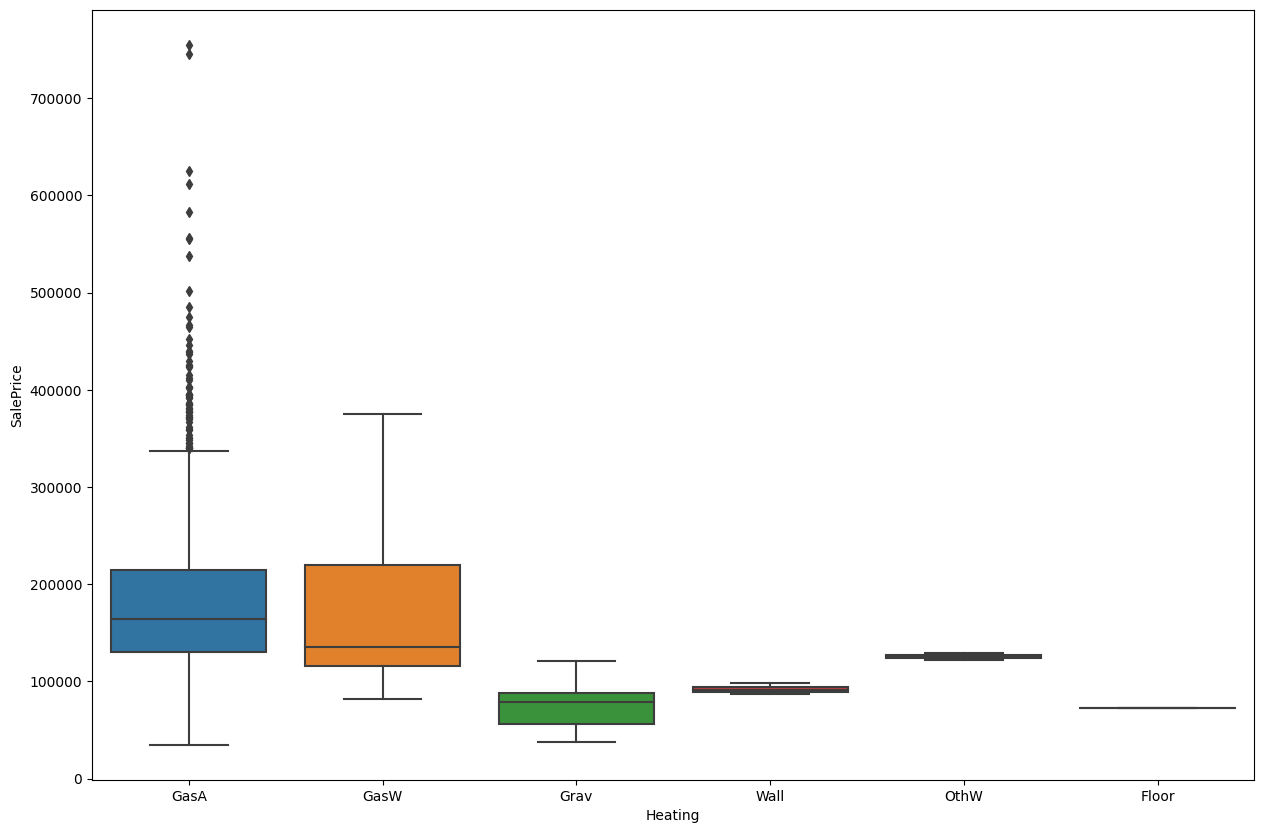

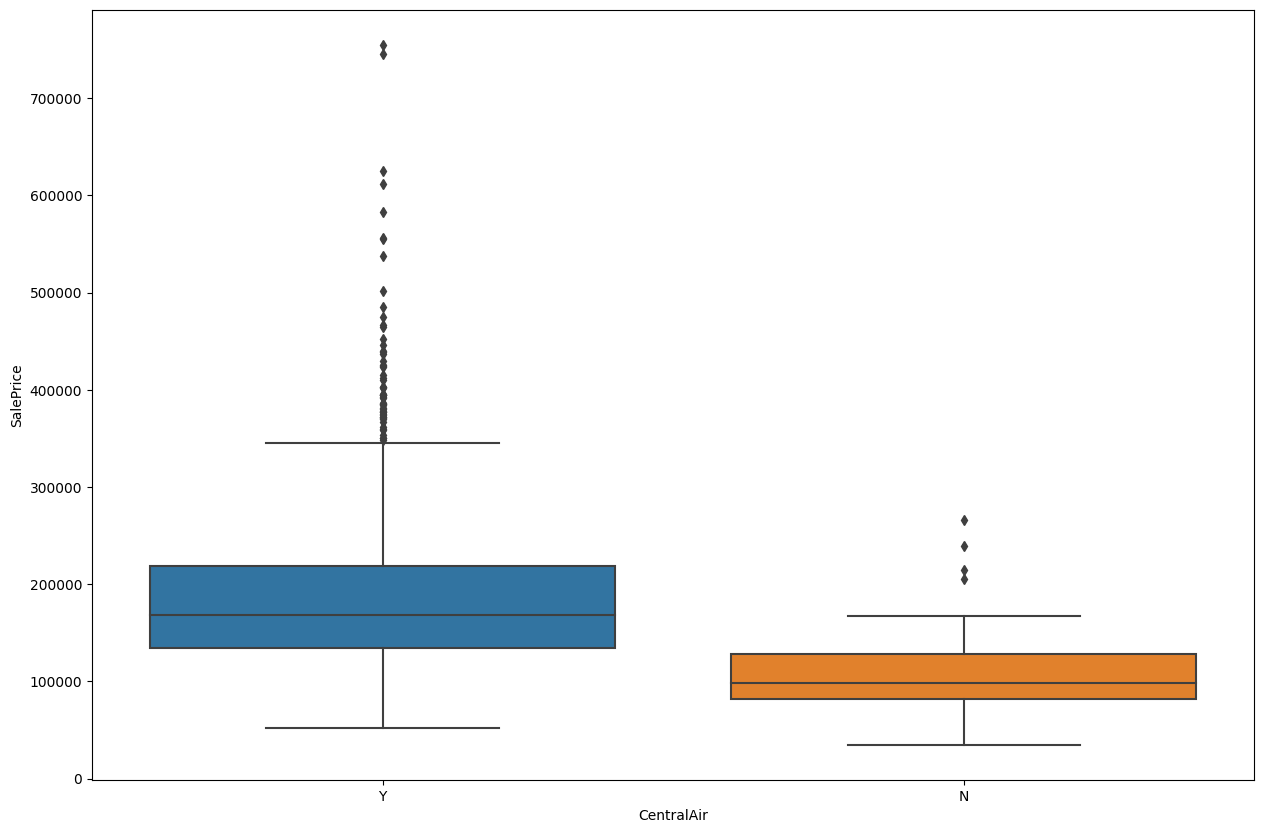

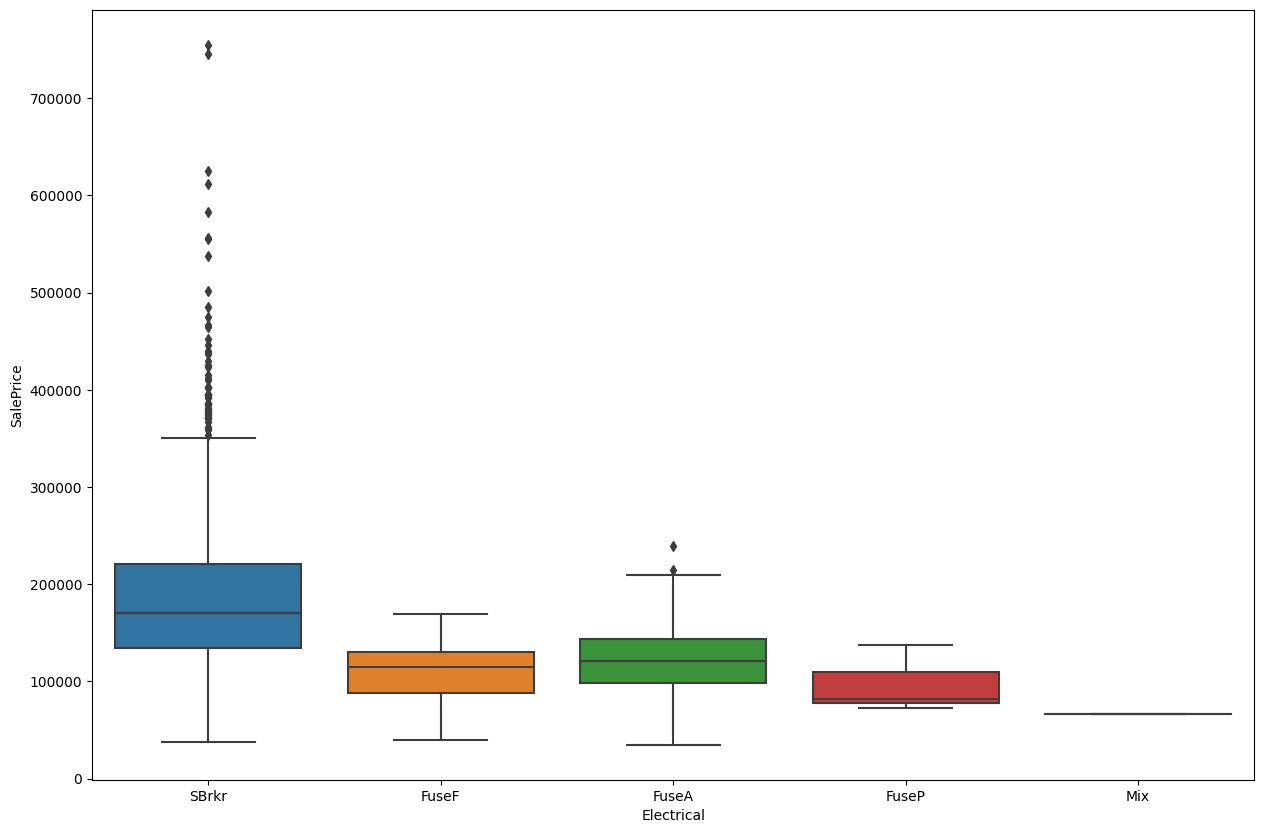

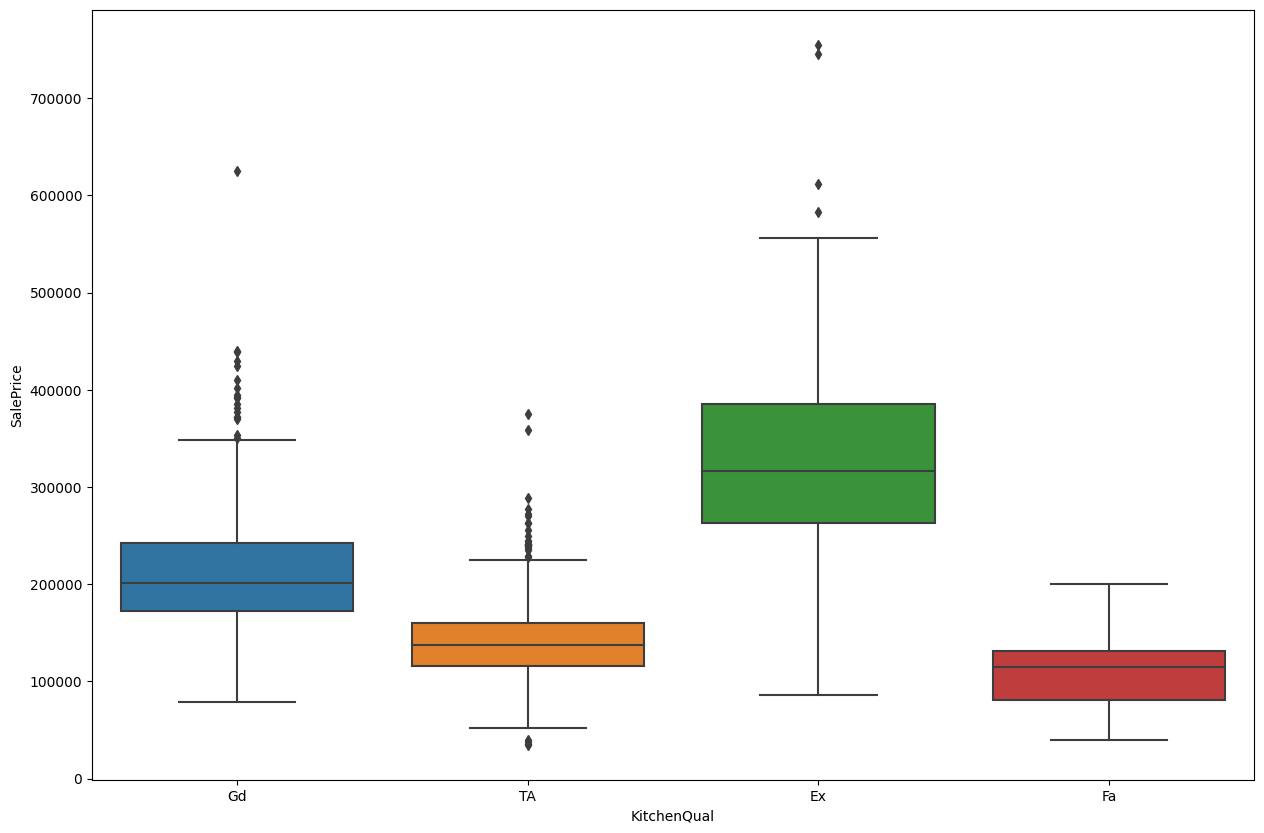

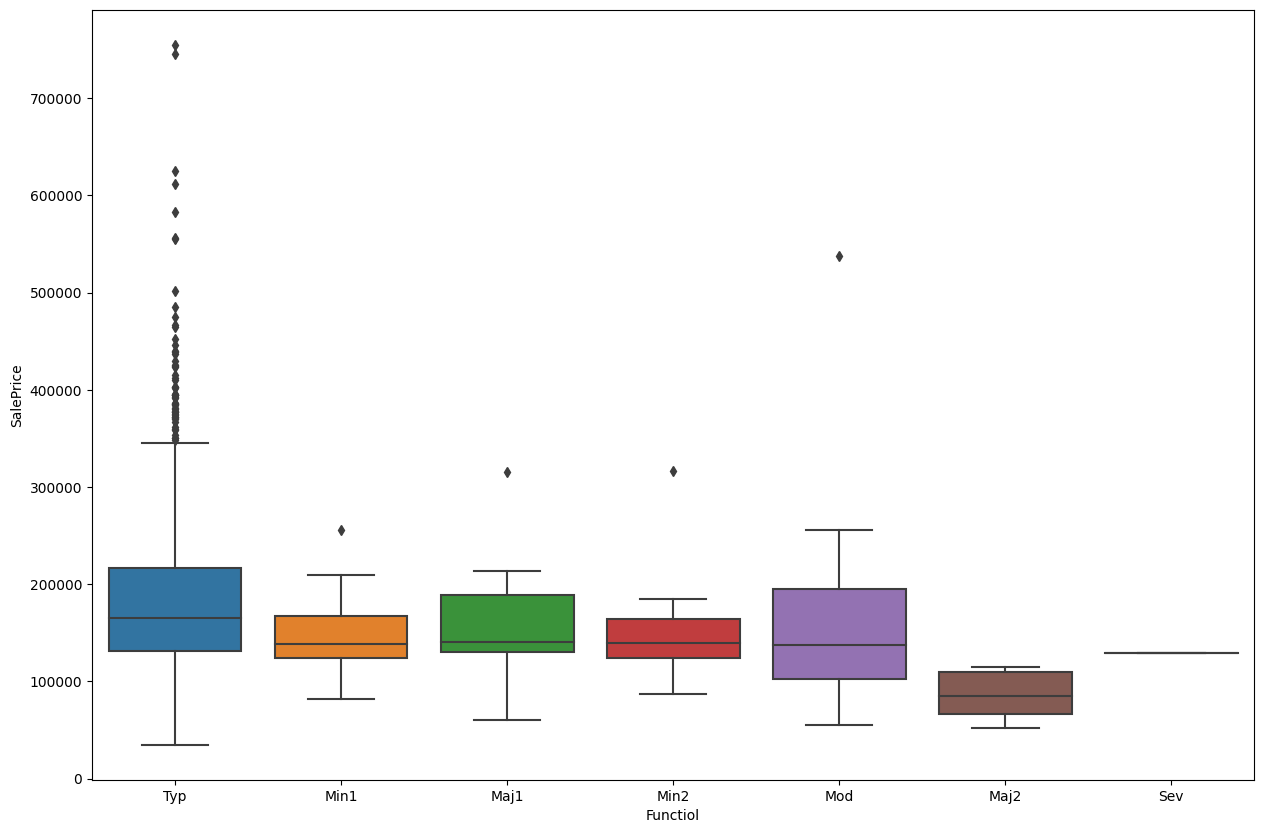

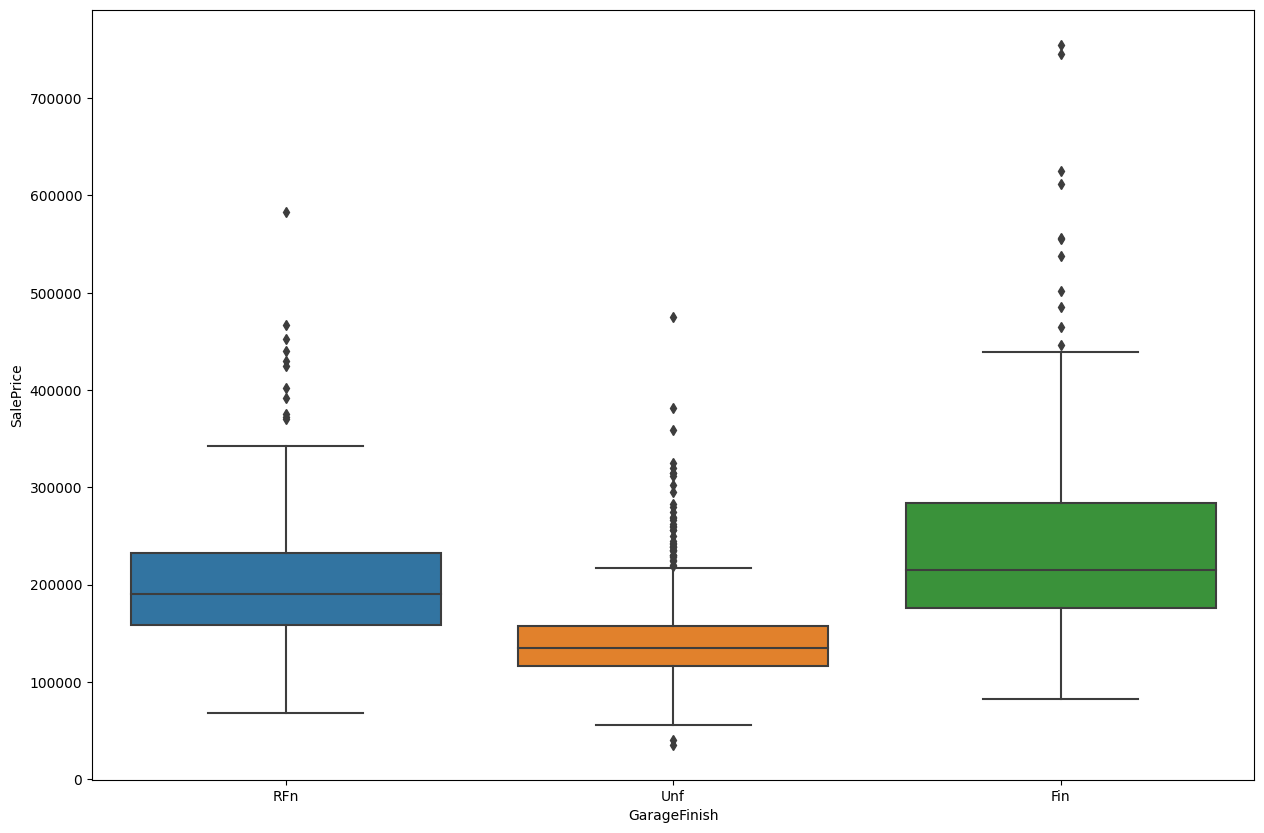

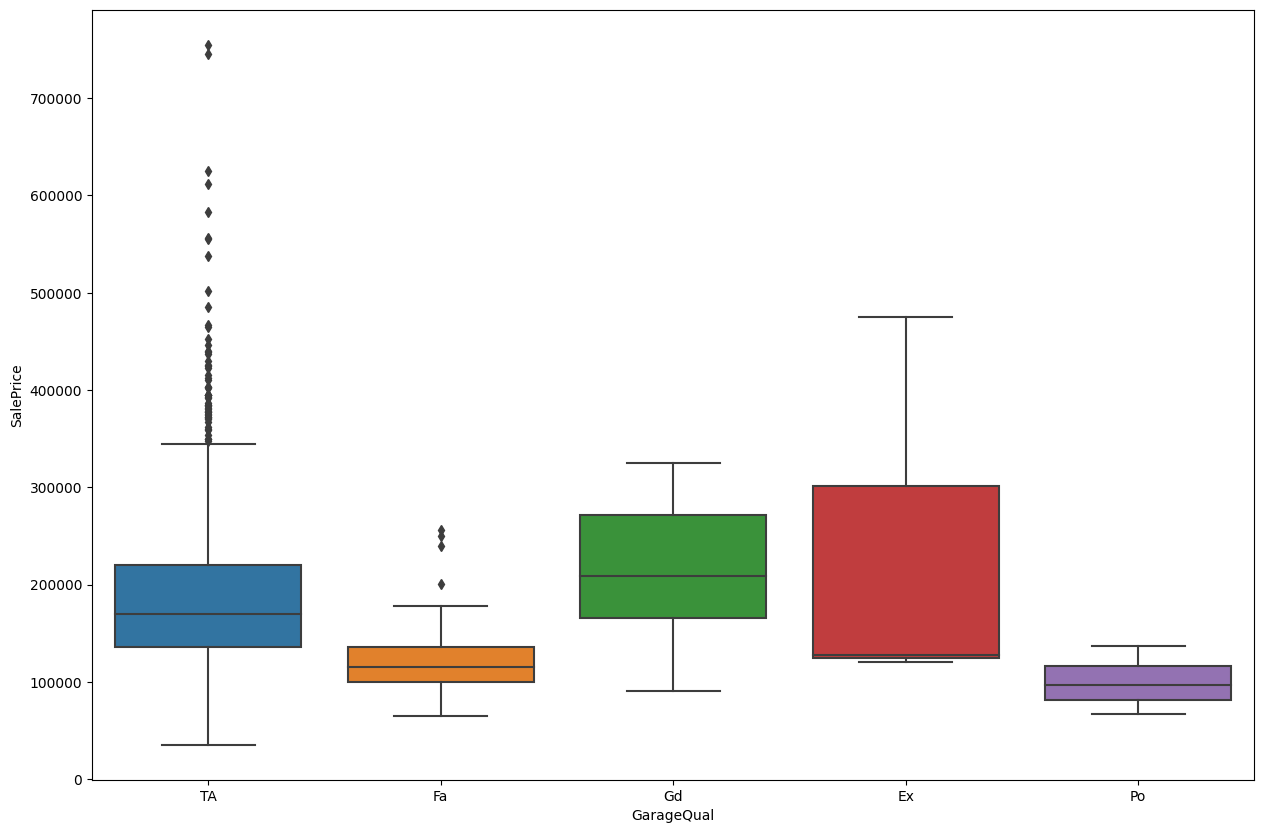

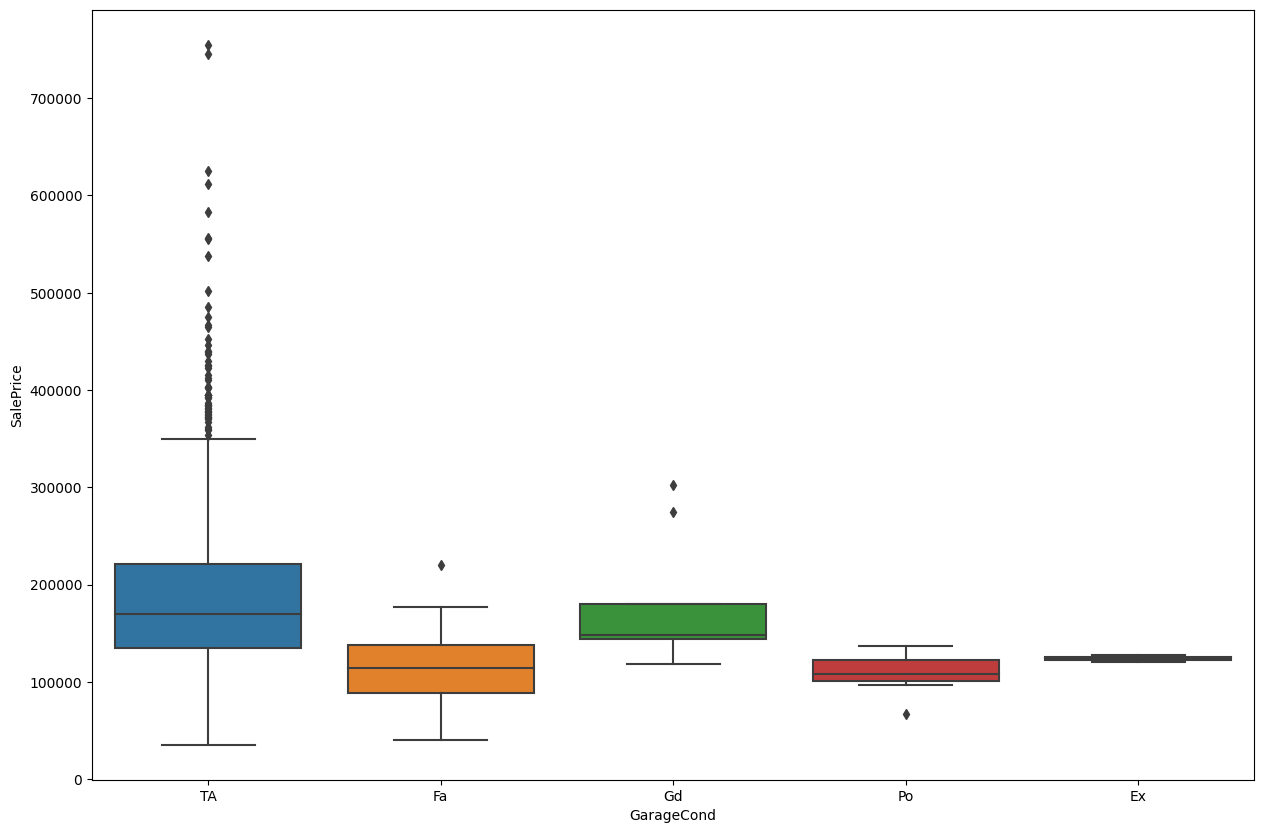

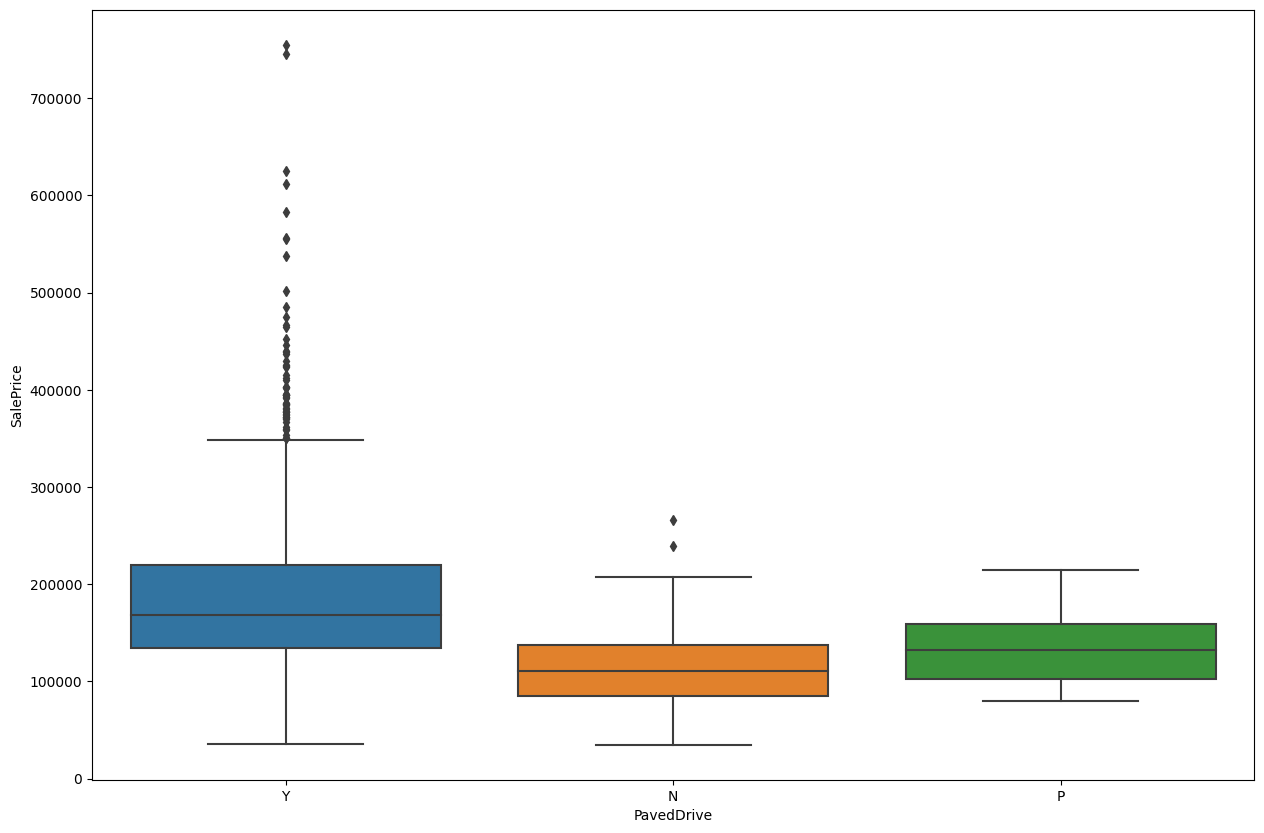

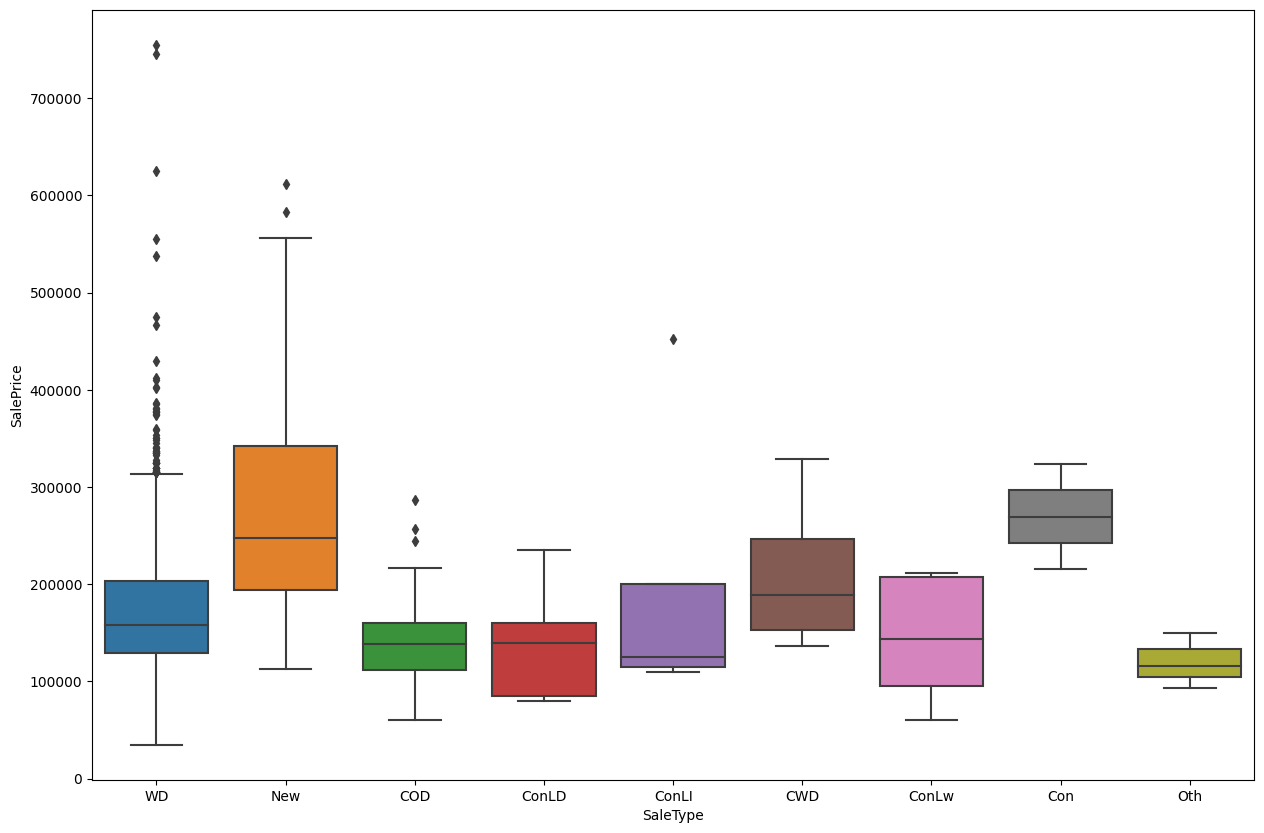

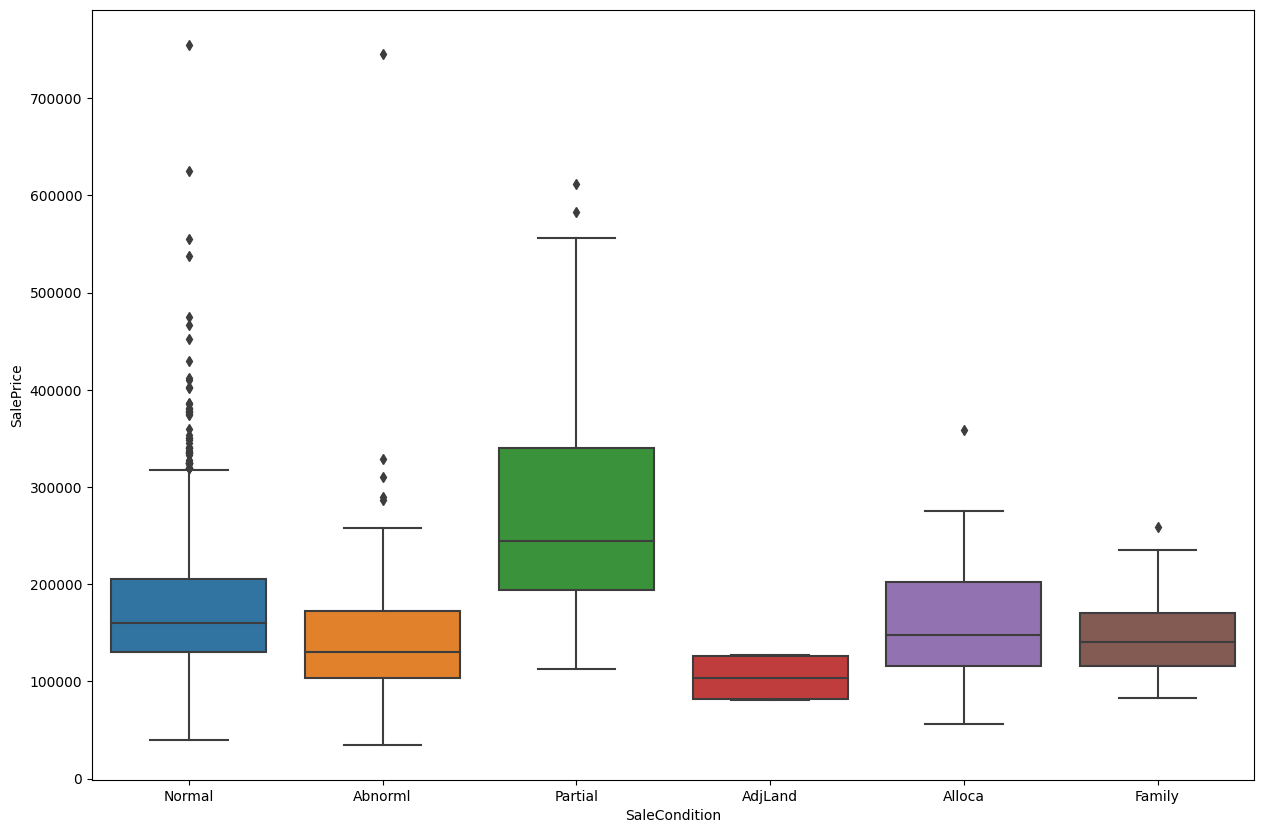

In [37]:
for cols in categorical_df.columns:
    plt.figure(figsize=(15,10))
    plt.xticks()
    sns.boxplot(cols,'SalePrice',data=df)

#### c.Identify significant variables using p-values and Chi-Square values

In [38]:
import scipy
from scipy.stats import chi2

In [39]:
inp_cols=[]
for cols in categorical_df_columns:
    ct_table=pd.crosstab(df[cols],df['SalePrice'])
    chi2_stat,p,dof,expected = scipy.stats.chi2_contingency(ct_table)
    print('#'*75)
    print('Column Name: ',cols)
    print(f'chi2 statistic:    {chi2_stat:5g}')
    print(f'p-value:           {p:.5g}')
    print(f'degrees of freedom:{dof}')
    print('expected frequencies:\n',expected)
    if (p>0.05):
        inp_cols.append(cols)
    print('#'*75)

###########################################################################
Column Name:  MSZoning
chi2 statistic:    3147.89
p-value:           4.3483e-11
degrees of freedom:2648
expected frequencies:
 [[0.00684932 0.00684932 0.00684932 ... 0.00684932 0.00684932 0.00684932]
 [0.04452055 0.04452055 0.04452055 ... 0.04452055 0.04452055 0.04452055]
 [0.0109589  0.0109589  0.0109589  ... 0.0109589  0.0109589  0.0109589 ]
 [0.78835616 0.78835616 0.78835616 ... 0.78835616 0.78835616 0.78835616]
 [0.14931507 0.14931507 0.14931507 ... 0.14931507 0.14931507 0.14931507]]
###########################################################################
###########################################################################
Column Name:  Street
chi2 statistic:    888.313
p-value:           8.3389e-09
degrees of freedom:662
expected frequencies:
 [[0.00410959 0.00410959 0.00410959 ... 0.00410959 0.00410959 0.00410959]
 [0.99589041 0.99589041 0.99589041 ... 0.99589041 0.99589041 0.99589041]]
########

###########################################################################
Column Name:  HouseStyle
chi2 statistic:    4596.79
p-value:           0.64826
degrees of freedom:4634
expected frequencies:
 [[0.10547945 0.10547945 0.10547945 ... 0.10547945 0.10547945 0.10547945]
 [0.00958904 0.00958904 0.00958904 ... 0.00958904 0.00958904 0.00958904]
 [0.49726027 0.49726027 0.49726027 ... 0.49726027 0.49726027 0.49726027]
 ...
 [0.30479452 0.30479452 0.30479452 ... 0.30479452 0.30479452 0.30479452]
 [0.02534247 0.02534247 0.02534247 ... 0.02534247 0.02534247 0.02534247]
 [0.04452055 0.04452055 0.04452055 ... 0.04452055 0.04452055 0.04452055]]
###########################################################################
###########################################################################
Column Name:  RoofStyle
chi2 statistic:    2665.68
p-value:           1
degrees of freedom:3310
expected frequencies:
 [[0.00890411 0.00890411 0.00890411 ... 0.00890411 0.00890411 0.00890411]
 [0.781506

###########################################################################
Column Name:  Heating
chi2 statistic:    4201.39
p-value:           2.4778e-24
degrees of freedom:3310
expected frequencies:
 [[6.84931507e-04 6.84931507e-04 6.84931507e-04 ... 6.84931507e-04
  6.84931507e-04 6.84931507e-04]
 [9.78082192e-01 9.78082192e-01 9.78082192e-01 ... 9.78082192e-01
  9.78082192e-01 9.78082192e-01]
 [1.23287671e-02 1.23287671e-02 1.23287671e-02 ... 1.23287671e-02
  1.23287671e-02 1.23287671e-02]
 [4.79452055e-03 4.79452055e-03 4.79452055e-03 ... 4.79452055e-03
  4.79452055e-03 4.79452055e-03]
 [1.36986301e-03 1.36986301e-03 1.36986301e-03 ... 1.36986301e-03
  1.36986301e-03 1.36986301e-03]
 [2.73972603e-03 2.73972603e-03 2.73972603e-03 ... 2.73972603e-03
  2.73972603e-03 2.73972603e-03]]
###########################################################################
###########################################################################
Column Name:  HeatingQC
chi2 statistic:    2411.06


###########################################################################
Column Name:  Fence
chi2 statistic:    521.585
p-value:           0.91411
degrees of freedom:567
expected frequencies:
 [[0.20996441 0.20996441 0.20996441 0.20996441 0.20996441 0.20996441
  0.20996441 0.20996441 0.20996441 0.20996441 0.41992883 0.20996441
  0.20996441 0.20996441 0.20996441 0.20996441 0.20996441 0.20996441
  0.20996441 0.62989324 0.20996441 0.20996441 0.41992883 0.20996441
  0.20996441 0.41992883 0.62989324 0.20996441 1.04982206 0.20996441
  0.20996441 0.62989324 0.20996441 0.20996441 0.20996441 0.20996441
  0.20996441 0.20996441 0.20996441 0.20996441 0.20996441 0.41992883
  0.20996441 0.20996441 0.41992883 0.41992883 0.20996441 0.20996441
  0.62989324 0.20996441 0.62989324 0.62989324 0.20996441 0.41992883
  1.25978648 0.62989324 0.83985765 0.20996441 0.20996441 0.20996441
  0.83985765 0.20996441 0.20996441 0.20996441 0.20996441 0.41992883
  0.41992883 0.62989324 0.20996441 0.20996441 0.20996441

In [40]:
inp_cols

['Alley',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'Electrical',
 'Functiol',
 'GarageType',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature']

## 5.Combine all the significant categorical and numerical variables

In [41]:
# for numercial
selected_df

#for categorical
inp_categorical_df=df[inp_cols]

In [45]:
inp_categorical_df

LandContour Utilities LandSlope Condition1 Condition2 BldgType  \
0            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1            Lvl    AllPub       Gtl      Feedr       Norm     1Fam   
2            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
3            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
4            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
...          ...       ...       ...        ...        ...      ...   
1455         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1456         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1457         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1458         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1459         Lvl    AllPub       Gtl       Norm       Norm     1Fam   

     HouseStyle RoofStyle RoofMatl Exterior1st  ... BsmtFinType2 HeatingQC  \
0        2Story     Gable  CompShg     VinylSd  ...          Unf        Ex   
1        1Story     Gable  CompShg     MetalSd  ...          Unf        Ex   
2        2Story     Gable  CompShg     VinylSd  ...          Unf        Ex   
3        2Story     Gable  CompShg     Wd Sdng  ...          Unf        Gd   
4        2Story     Gable  CompShg     VinylSd  ...          Unf        Ex   
...         ...       ...      ...         ...  ...          ...       ...   
1455     2Story     Gable  CompShg     VinylSd  ...          Unf        Ex   
1456     1Story     Gable  CompShg     Plywood  ...          Rec        TA   
1457     2Story     Gable  CompShg     CemntBd  ...          Unf        Ex   
1458     1Story       Hip  CompShg     MetalSd  ...          Rec        Gd   
1459     1Story     Gable  CompShg     HdBoard  ...          LwQ        Gd   

     Electrical Functiol GarageType GarageCond PavedDrive PoolQC  Fence  \
0         SBrkr      Typ     Attchd         TA          Y    NaN    NaN   
1         SBrkr      Typ     Attchd         TA          Y    NaN    NaN   
2         SBrkr      Typ     Attchd         TA          Y    NaN    NaN   
3         SBrkr      Typ     Detchd         TA          Y    NaN    NaN   
4         SBrkr      Typ     Attchd         TA          Y    NaN    NaN   
...         ...      ...        ...        ...        ...    ...    ...   
1455      SBrkr      Typ     Attchd         TA          Y    NaN    NaN   
1456      SBrkr     Min1     Attchd         TA          Y    NaN  MnPrv   
1457      SBrkr      Typ     Attchd         TA          Y    NaN  GdPrv   
1458      FuseA      Typ     Attchd         TA          Y    NaN    NaN   
1459      SBrkr      Typ     Attchd         TA          Y    NaN    NaN   

     MiscFeature  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
1455         NaN  
1456         NaN  
1457        Shed  
1458         NaN  
1459         NaN  

[1460 rows x 22 columns]

In [46]:
selected_df

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0        208500            7       1710           2         548          856   
1        181500            6       1262           2         460         1262   
2        223500            7       1786           2         608          920   
3        140000            7       1717           3         642          756   
4        250000            8       2198           3         836         1145   
...         ...          ...        ...         ...         ...          ...   
1455     175000            6       1647           2         460          953   
1456     210000            6       2073           2         500         1542   
1457     266500            7       2340           1         252         1152   
1458     142125            5       1078           1         240         1078   
1459     147500            5       1256           1         276         1256   

      FullBath  YearBuilt  
0            2       2003  
1            2       1976  
2            2       2001  
3            1       1915  
4            2       2000  
...        ...        ...  
1455         2       1999  
1456         2       1978  
1457         2       1941  
1458         1       1950  
1459         1       1965  

[1460 rows x 8 columns]

In [47]:
inp_df=inp_categorical_df.join(selected_df)

In [48]:
inp_df

LandContour Utilities LandSlope Condition1 Condition2 BldgType  \
0            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1            Lvl    AllPub       Gtl      Feedr       Norm     1Fam   
2            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
3            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
4            Lvl    AllPub       Gtl       Norm       Norm     1Fam   
...          ...       ...       ...        ...        ...      ...   
1455         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1456         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1457         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1458         Lvl    AllPub       Gtl       Norm       Norm     1Fam   
1459         Lvl    AllPub       Gtl       Norm       Norm     1Fam   

     HouseStyle RoofStyle RoofMatl Exterior1st  ...  Fence MiscFeature  \
0        2Story     Gable  CompShg     VinylSd  ...    NaN         NaN   
1        1Story     Gable  CompShg     MetalSd  ...    NaN         NaN   
2        2Story     Gable  CompShg     VinylSd  ...    NaN         NaN   
3        2Story     Gable  CompShg     Wd Sdng  ...    NaN         NaN   
4        2Story     Gable  CompShg     VinylSd  ...    NaN         NaN   
...         ...       ...      ...         ...  ...    ...         ...   
1455     2Story     Gable  CompShg     VinylSd  ...    NaN         NaN   
1456     1Story     Gable  CompShg     Plywood  ...  MnPrv         NaN   
1457     2Story     Gable  CompShg     CemntBd  ...  GdPrv        Shed   
1458     1Story       Hip  CompShg     MetalSd  ...    NaN         NaN   
1459     1Story     Gable  CompShg     HdBoard  ...    NaN         NaN   

     SalePrice OverallQual GrLivArea GarageCars GarageArea TotalBsmtSF  \
0       208500           7      1710          2        548         856   
1       181500           6      1262          2        460        1262   
2       223500           7      1786          2        608         920   
3       140000           7      1717          3        642         756   
4       250000           8      2198          3        836        1145   
...        ...         ...       ...        ...        ...         ...   
1455    175000           6      1647          2        460         953   
1456    210000           6      2073          2        500        1542   
1457    266500           7      2340          1        252        1152   
1458    142125           5      1078          1        240        1078   
1459    147500           5      1256          1        276        1256   

     FullBath YearBuilt  
0           2      2003  
1           2      1976  
2           2      2001  
3           1      1915  
4           2      2000  
...       ...       ...  
1455        2      1999  
1456        2      1978  
1457        2      1941  
1458        1      1950  
1459        1      1965  

[1460 rows x 30 columns]

## 6.Plot box plot for the new dataset to find the variables with outliers

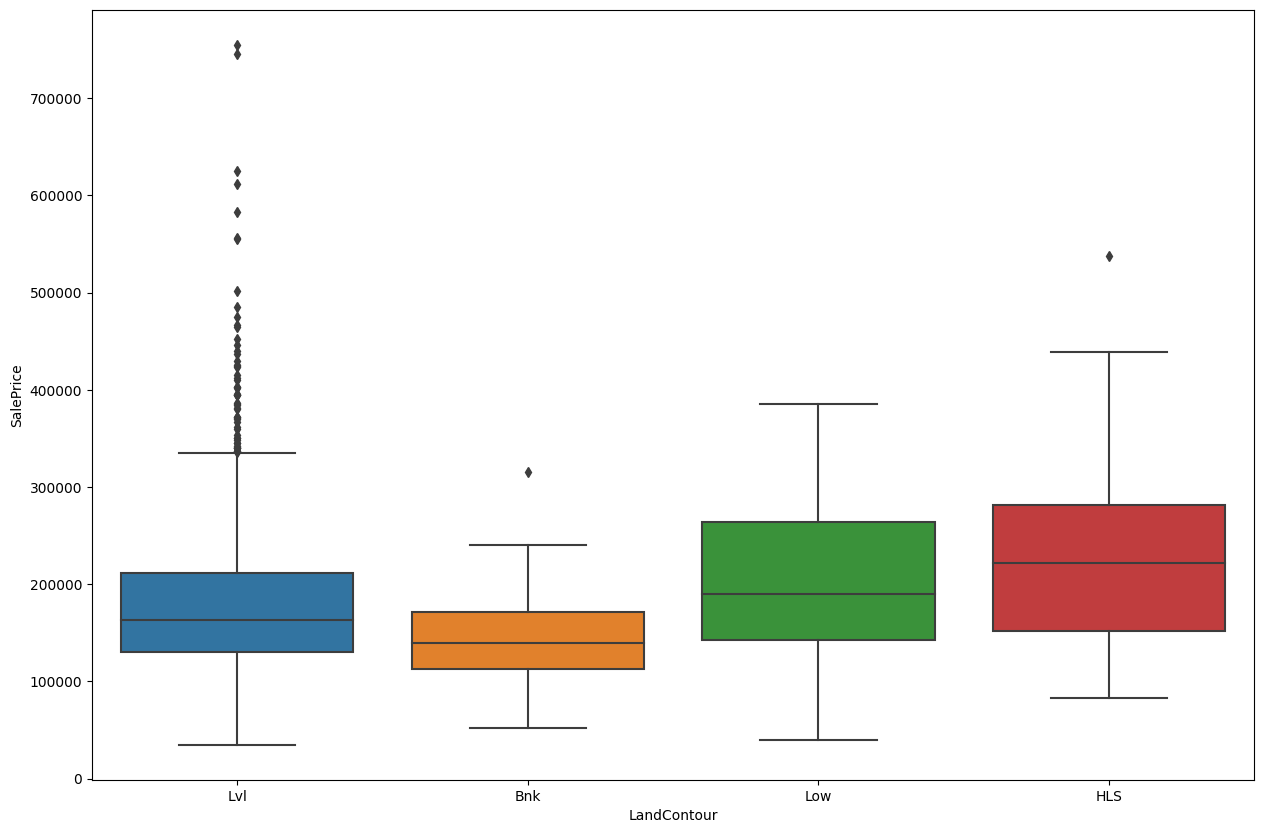

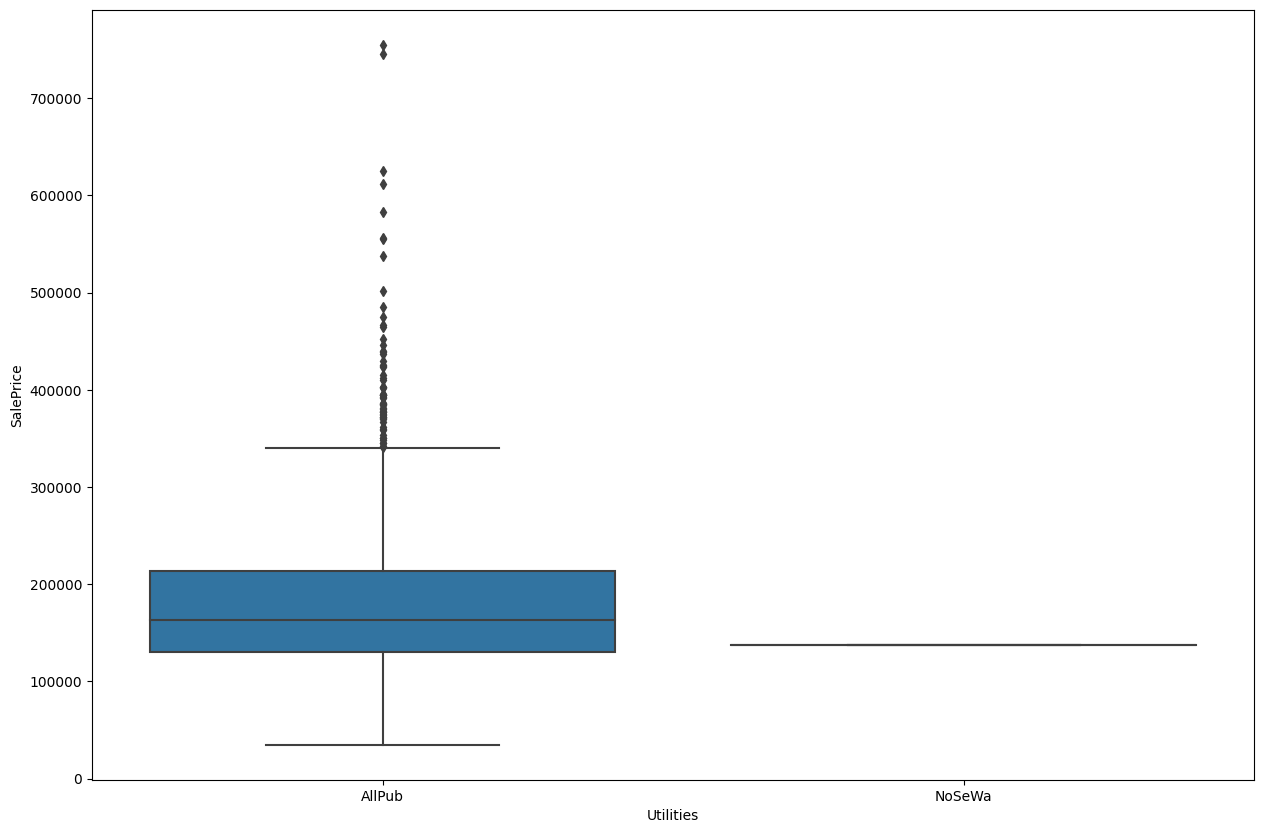

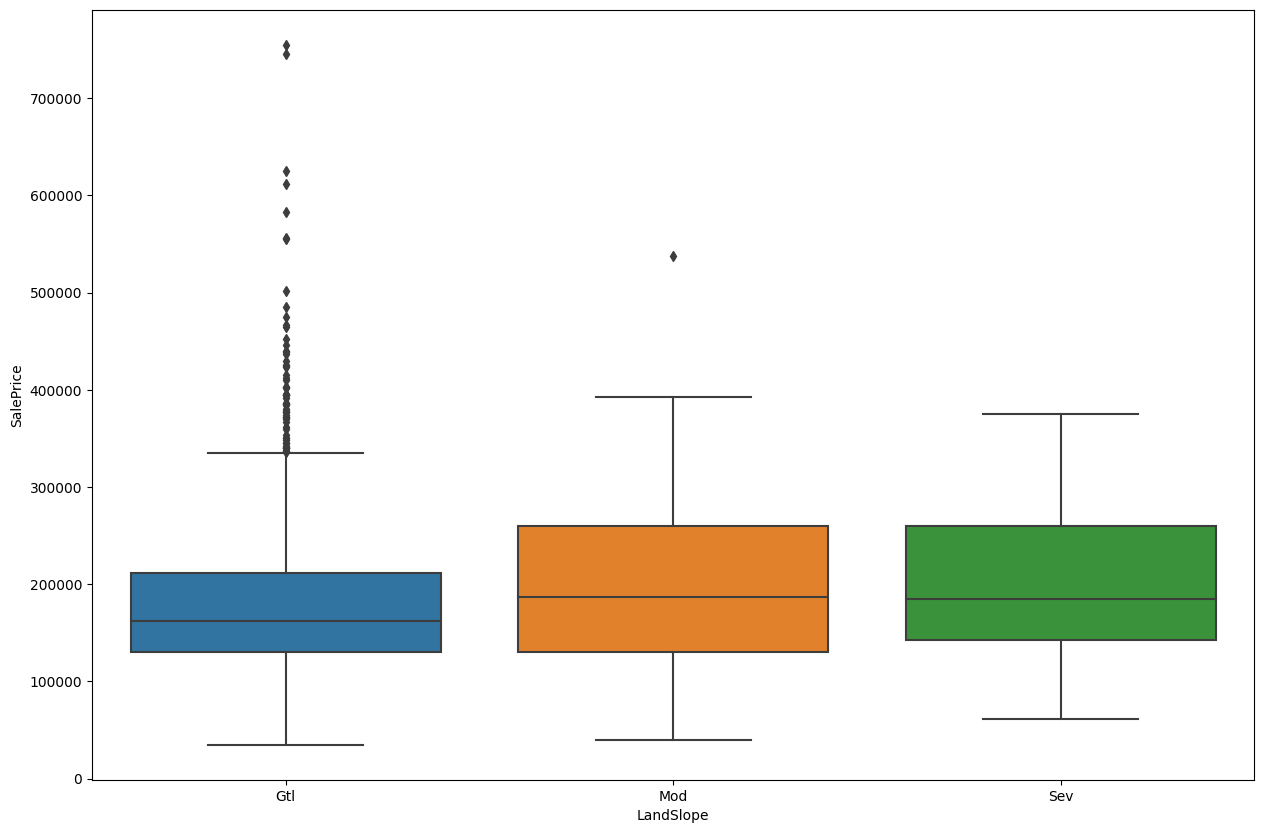

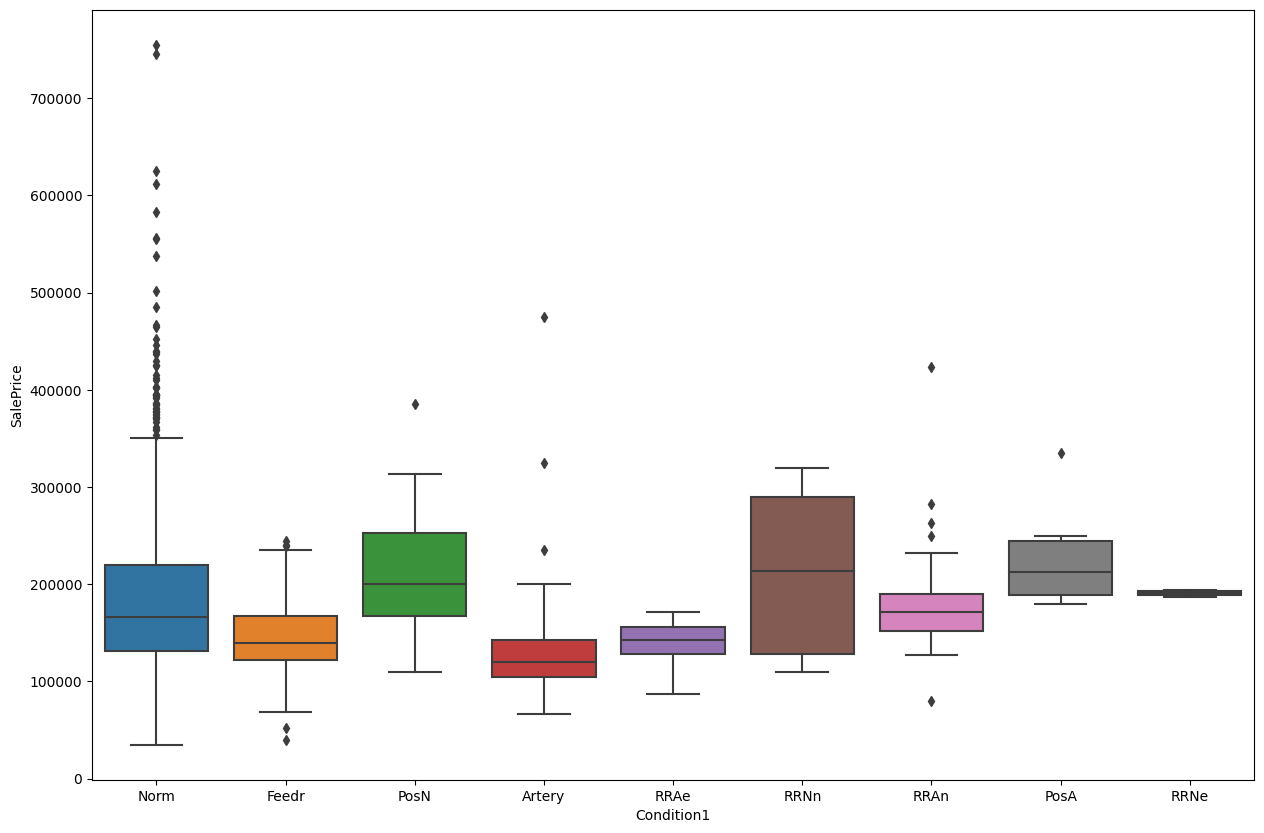

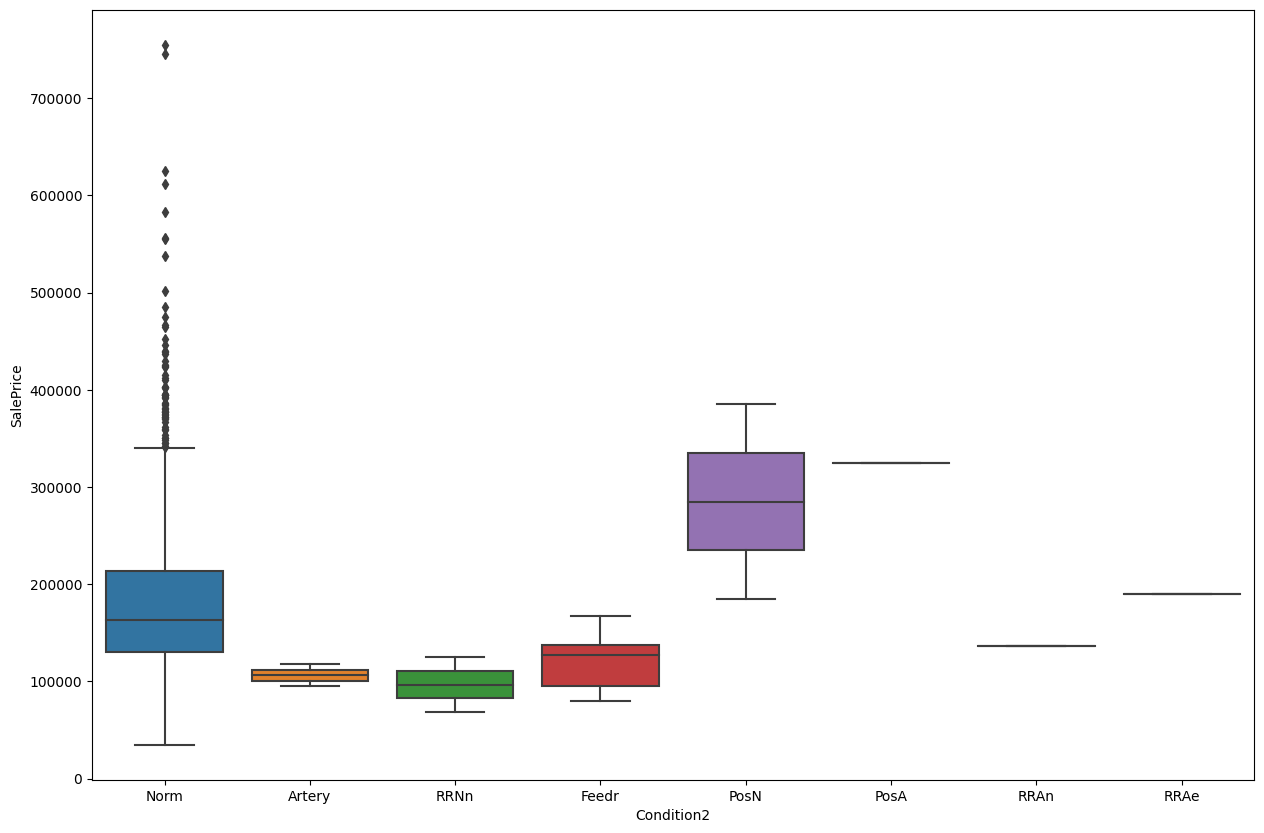

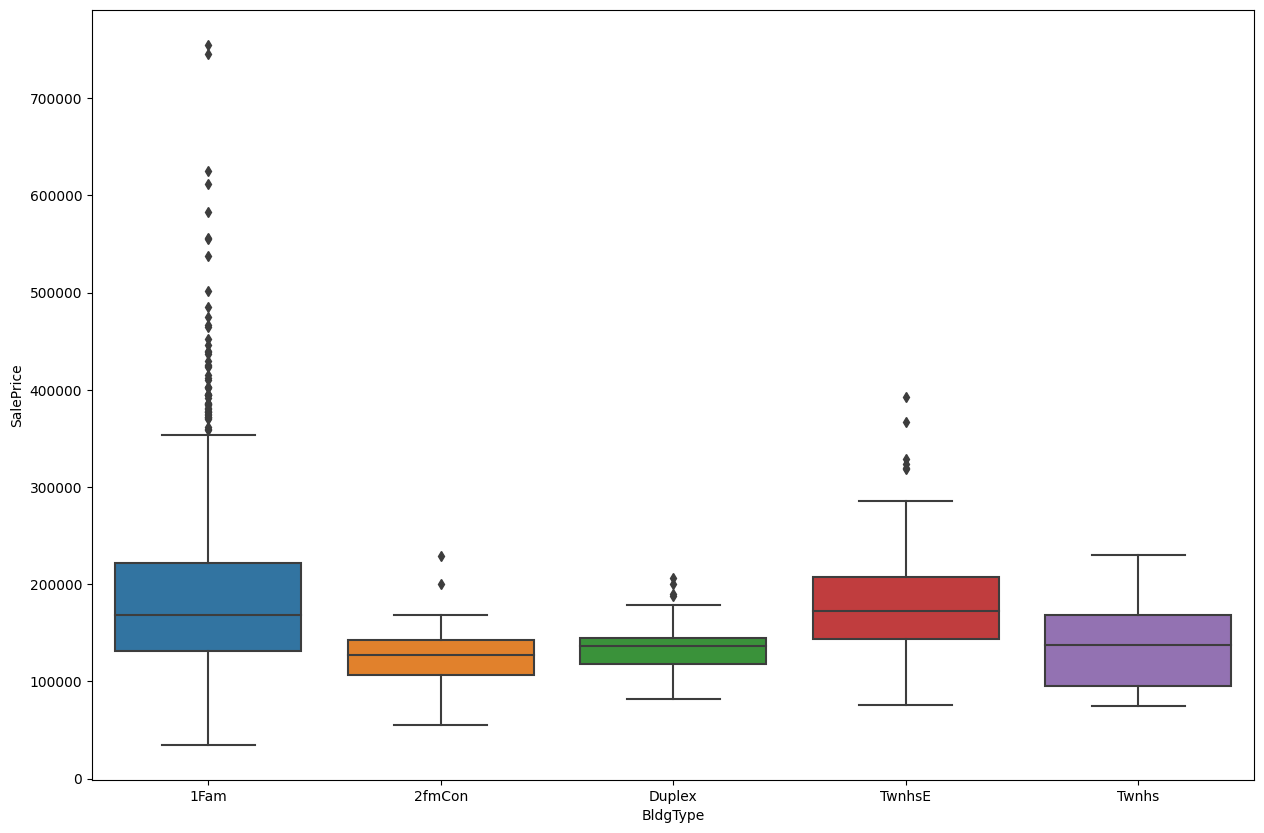

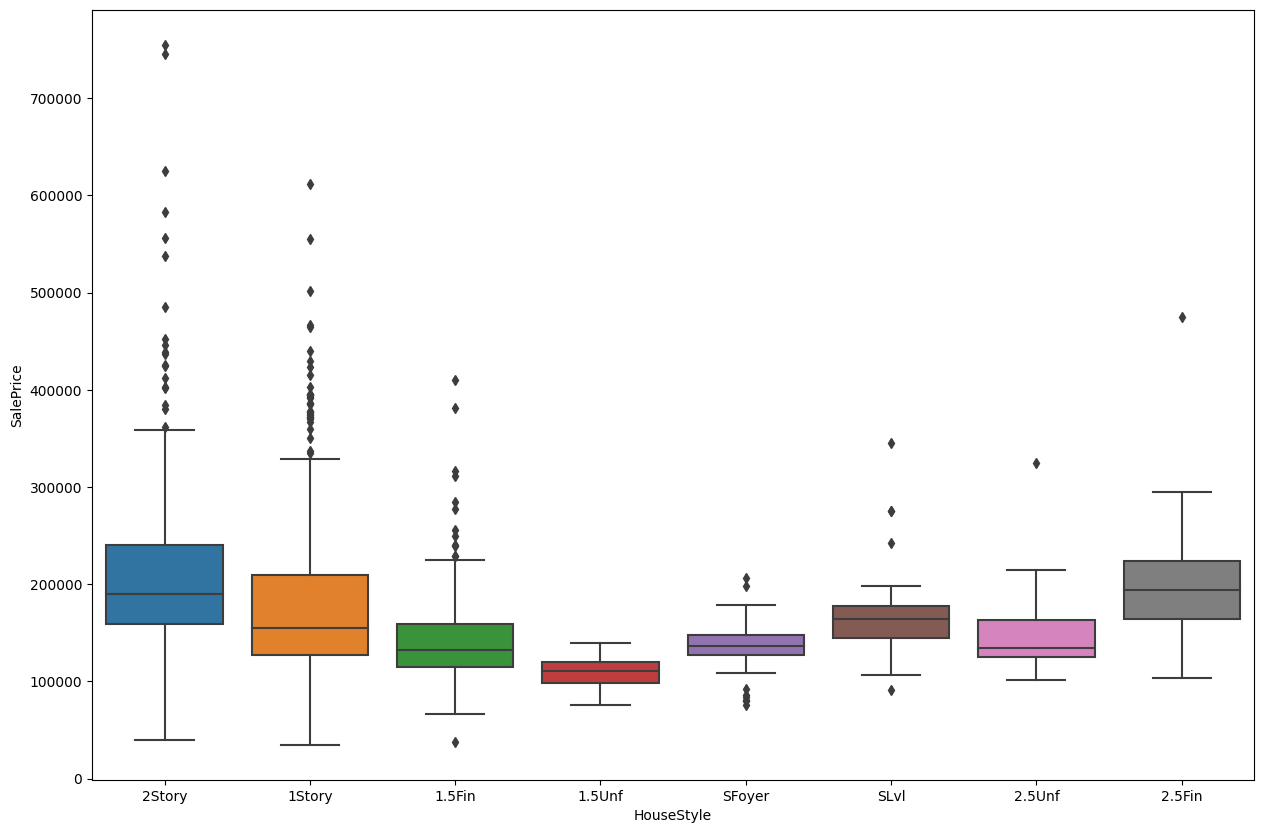

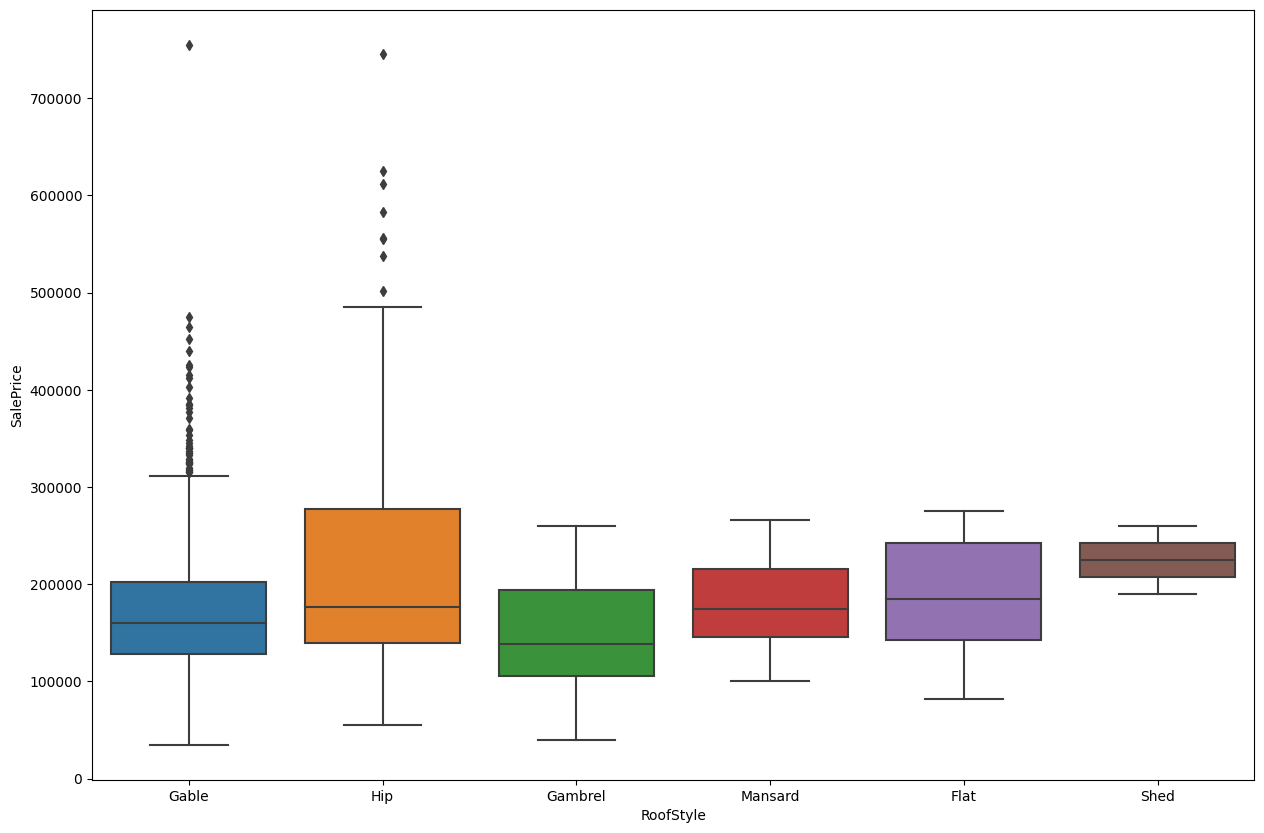

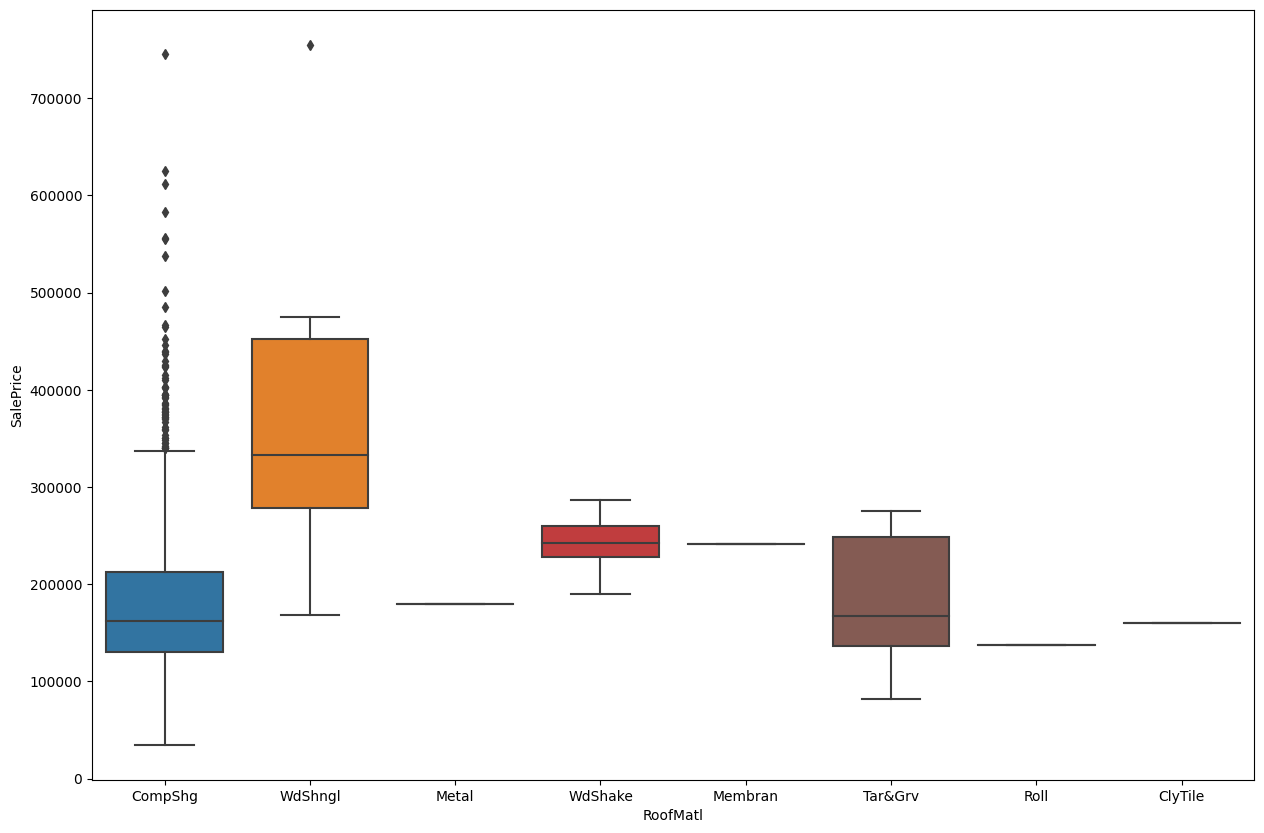

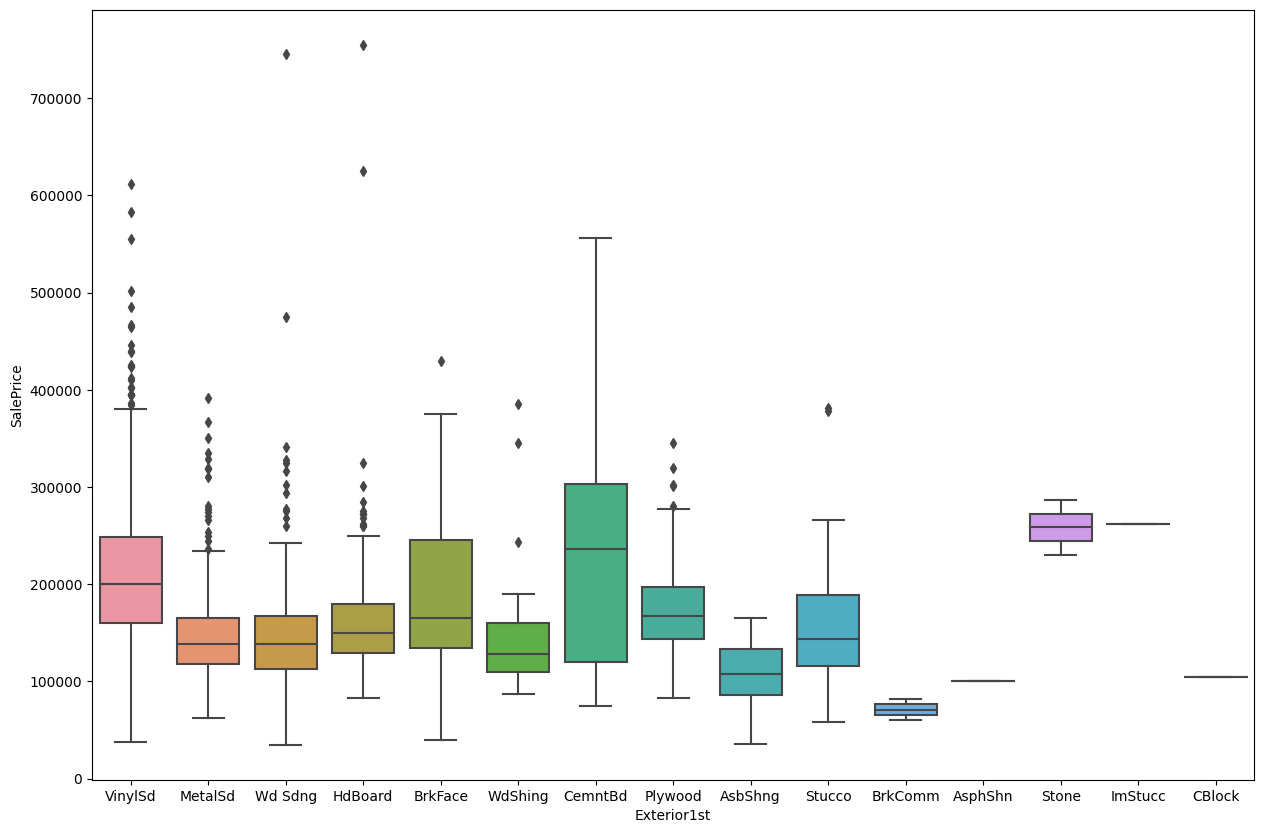

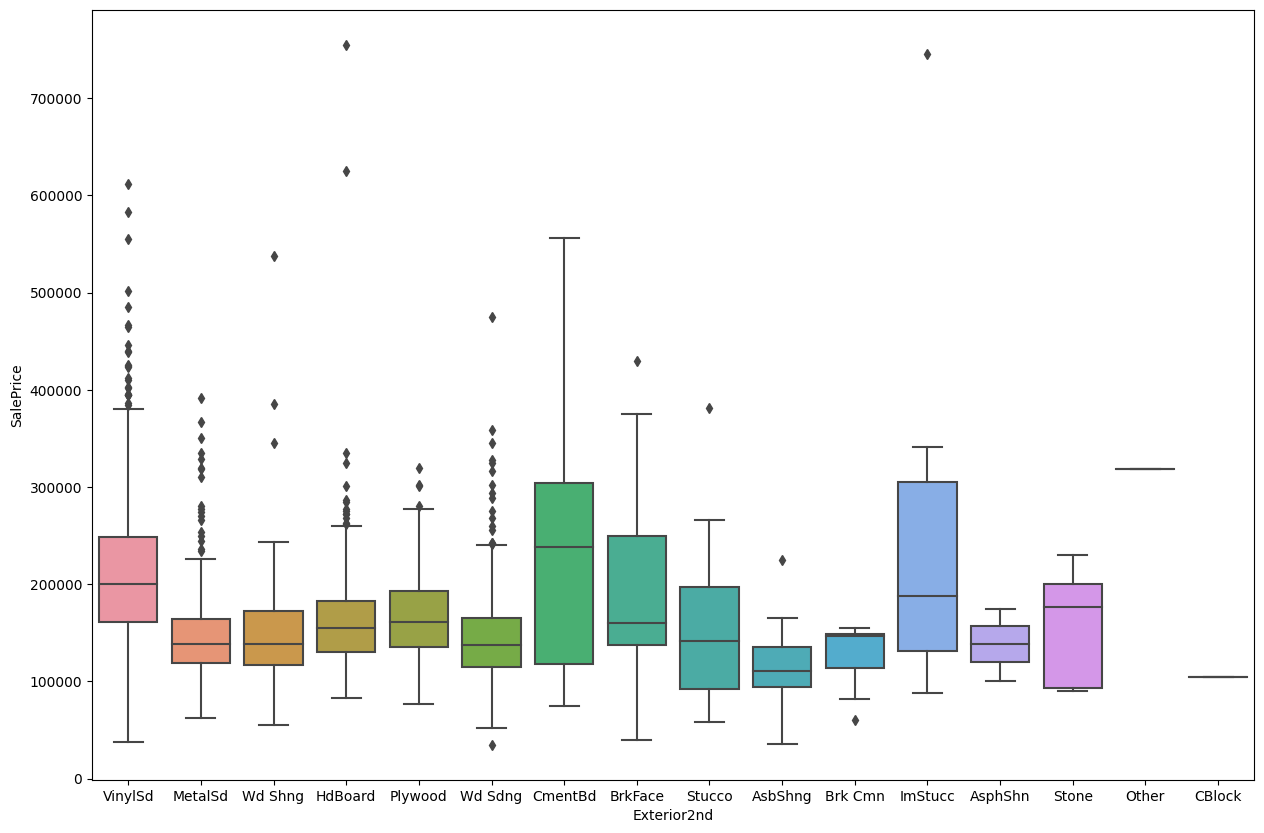

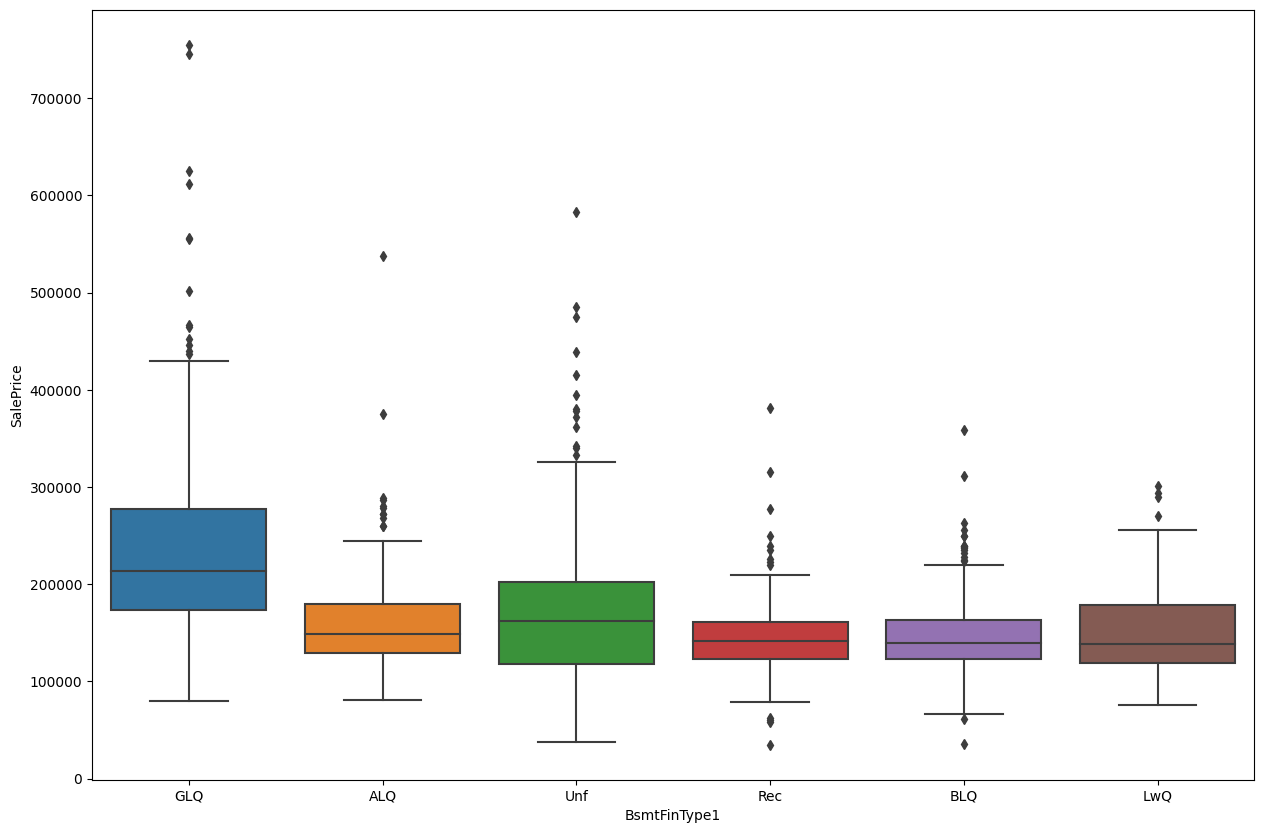

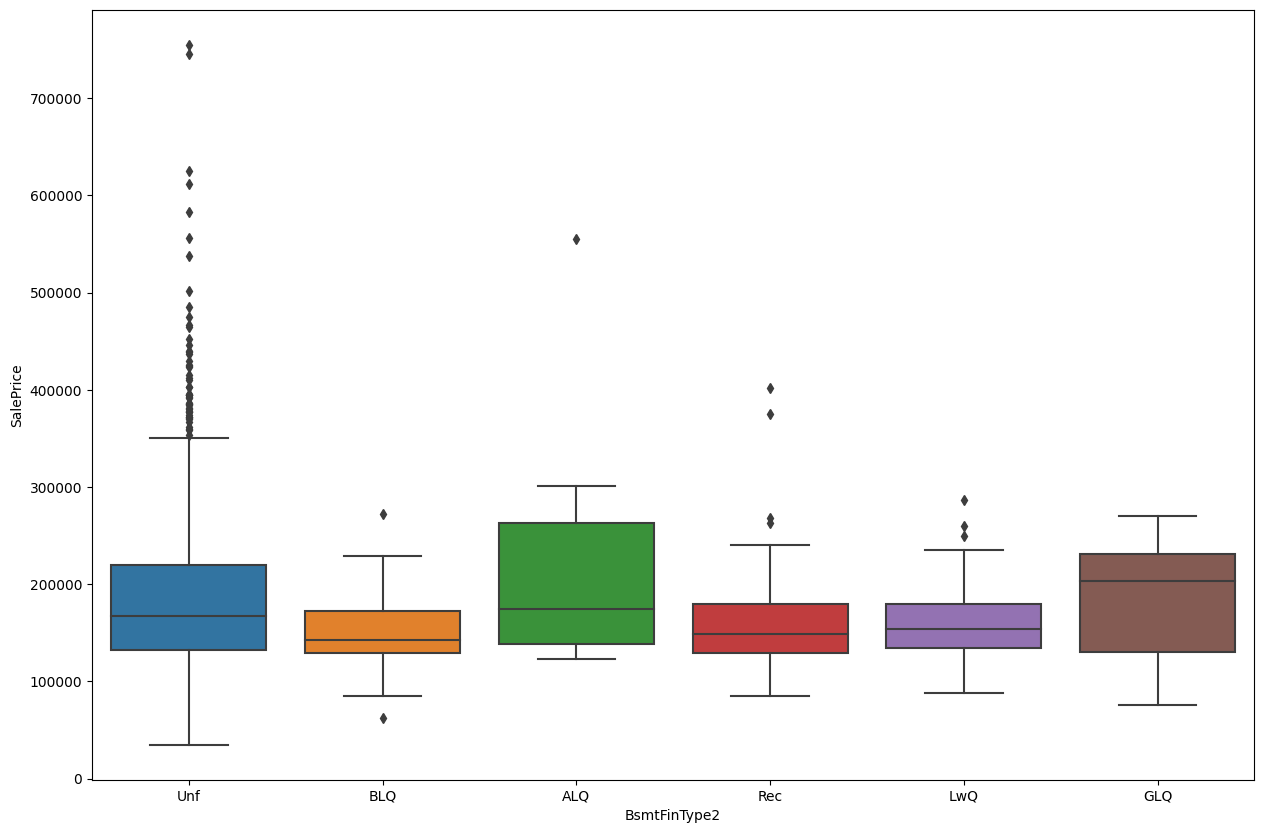

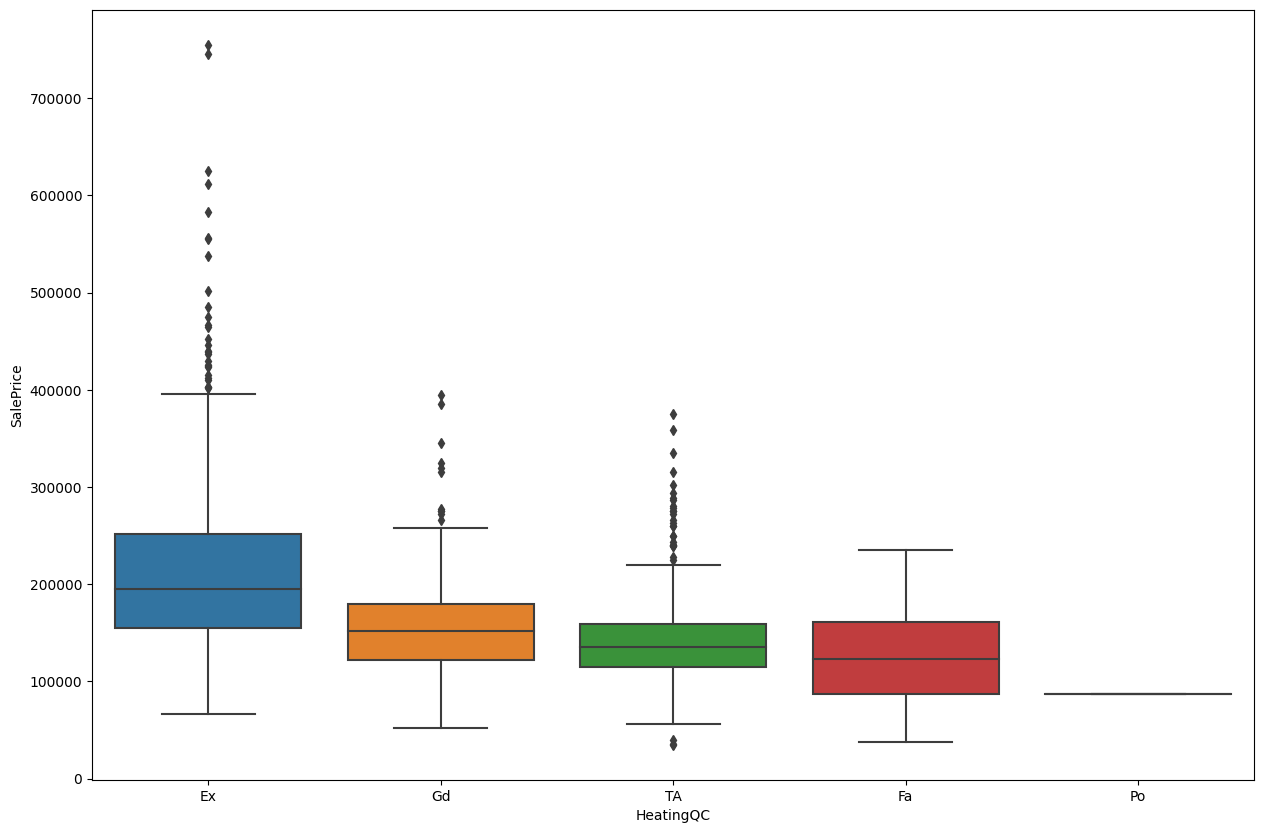

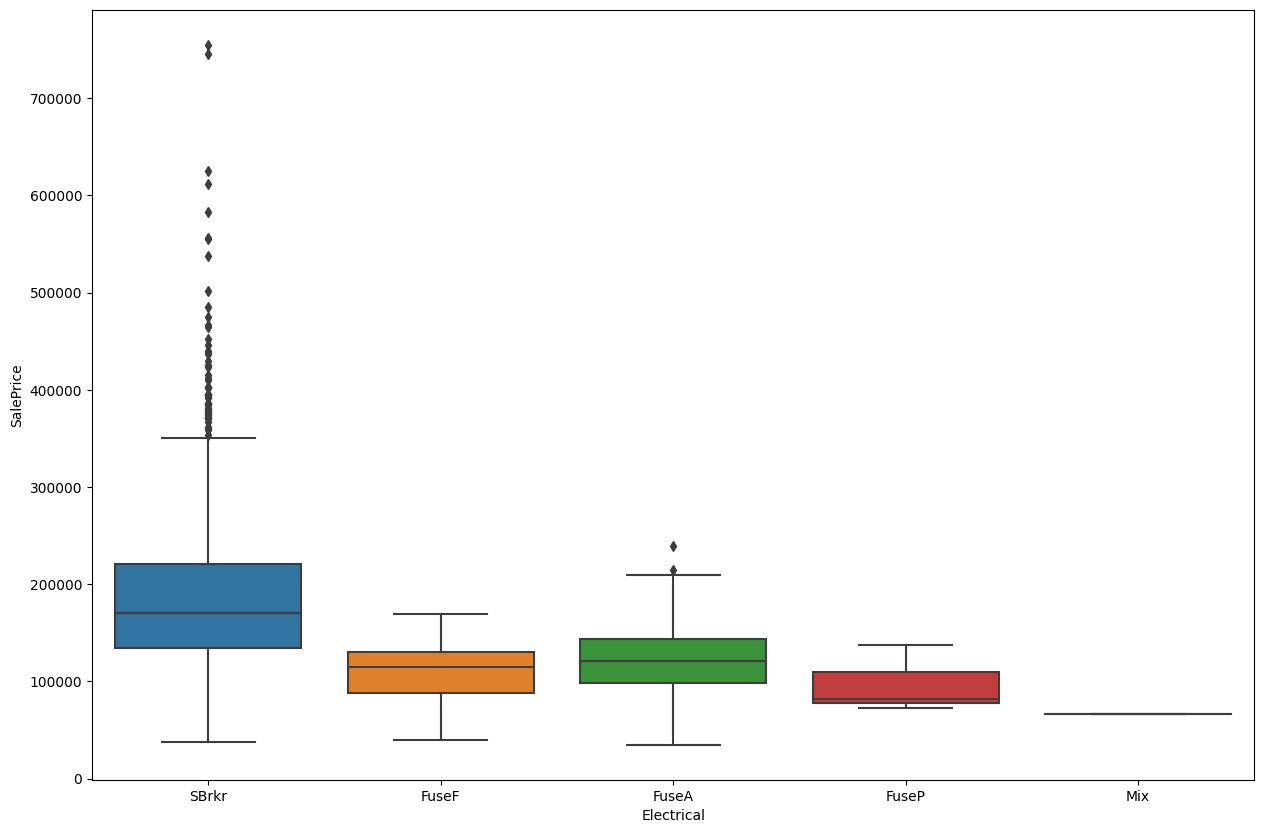

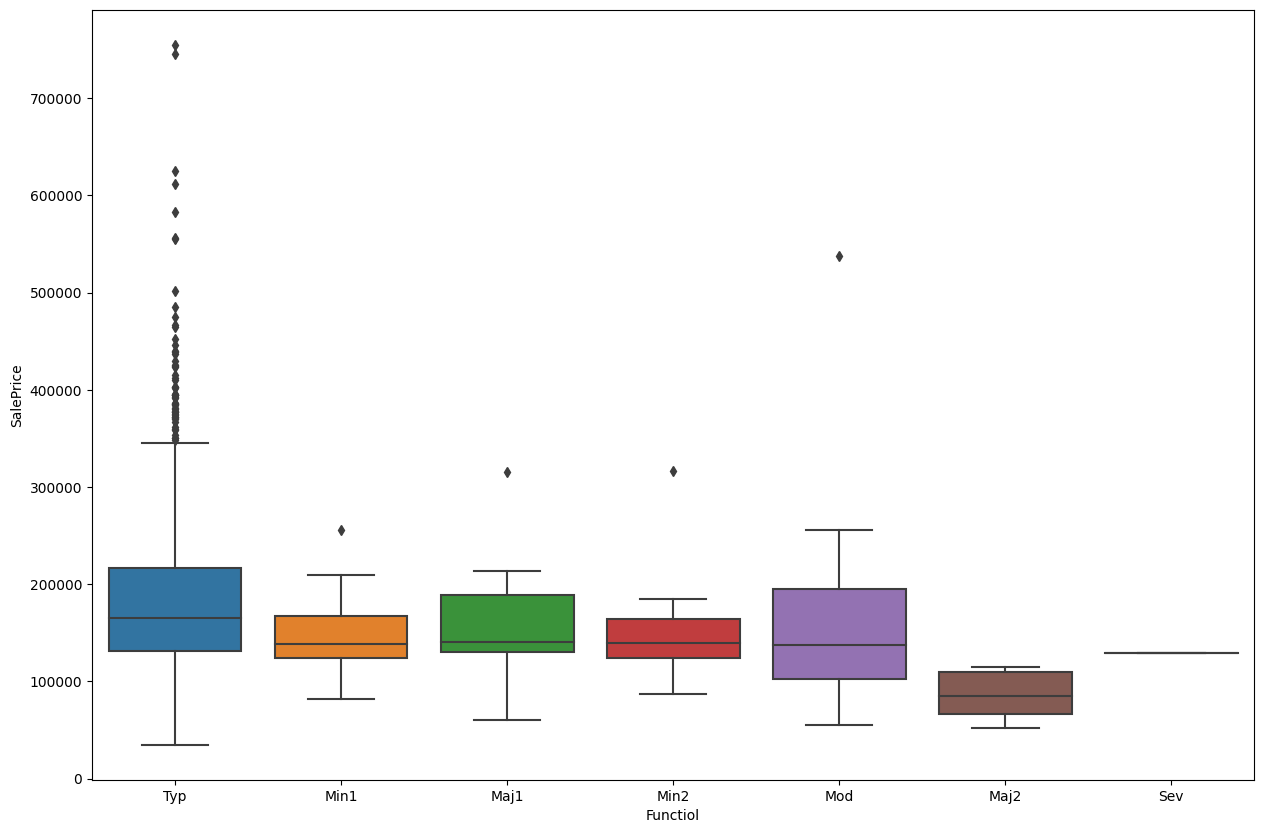

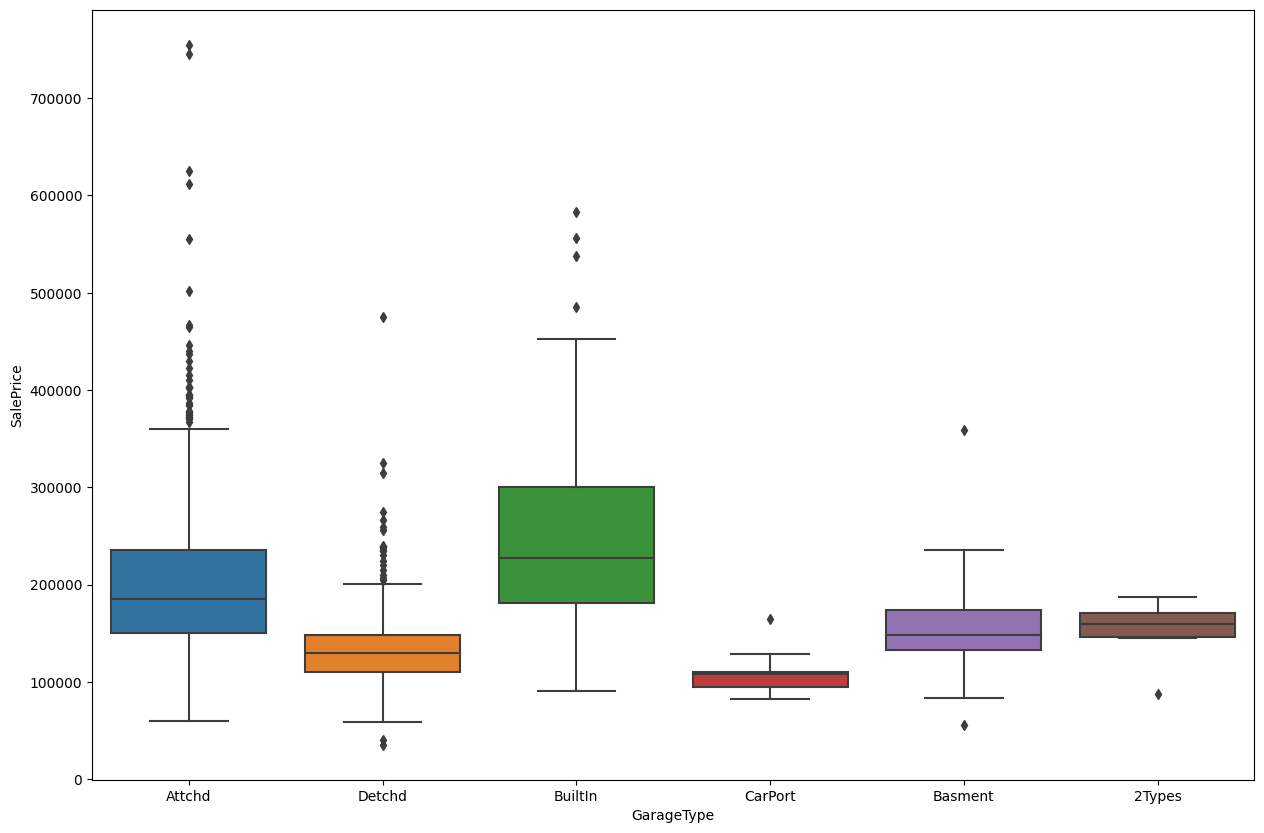

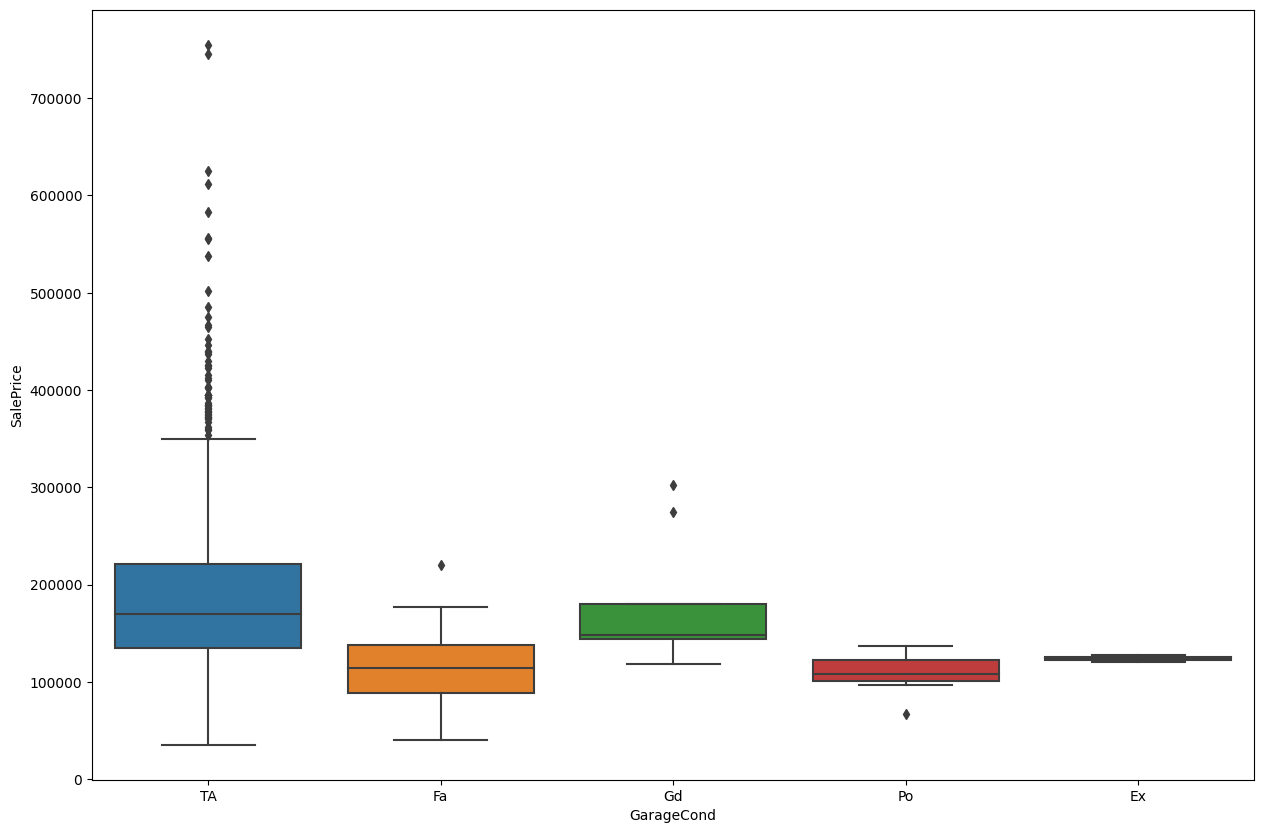

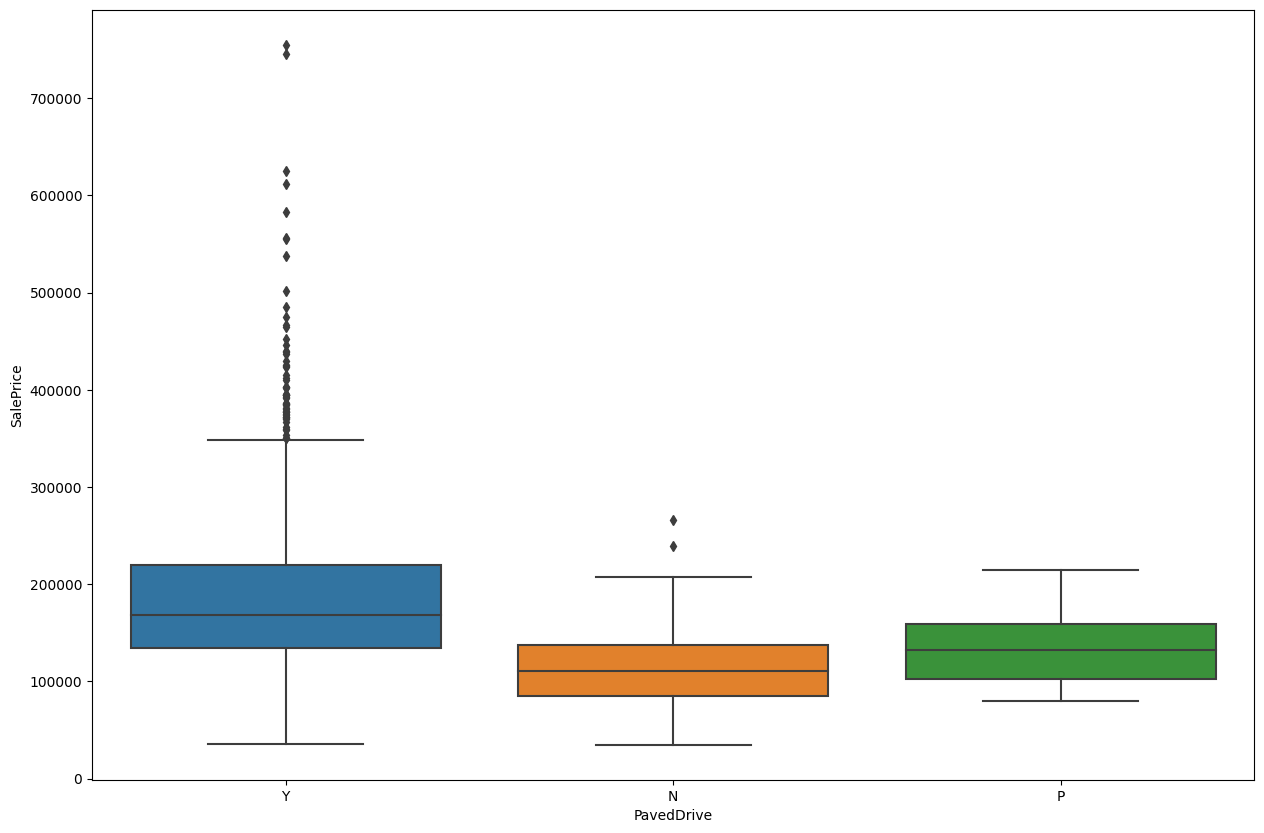

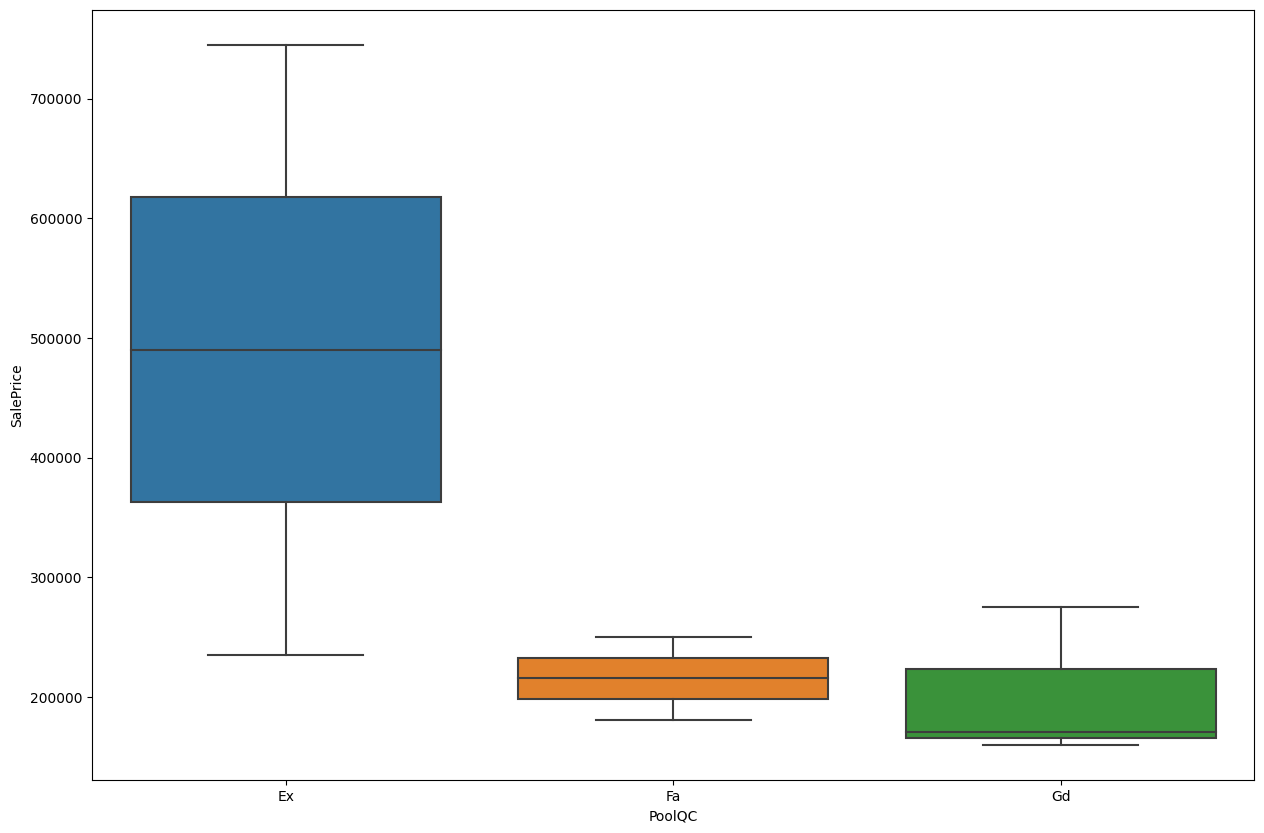

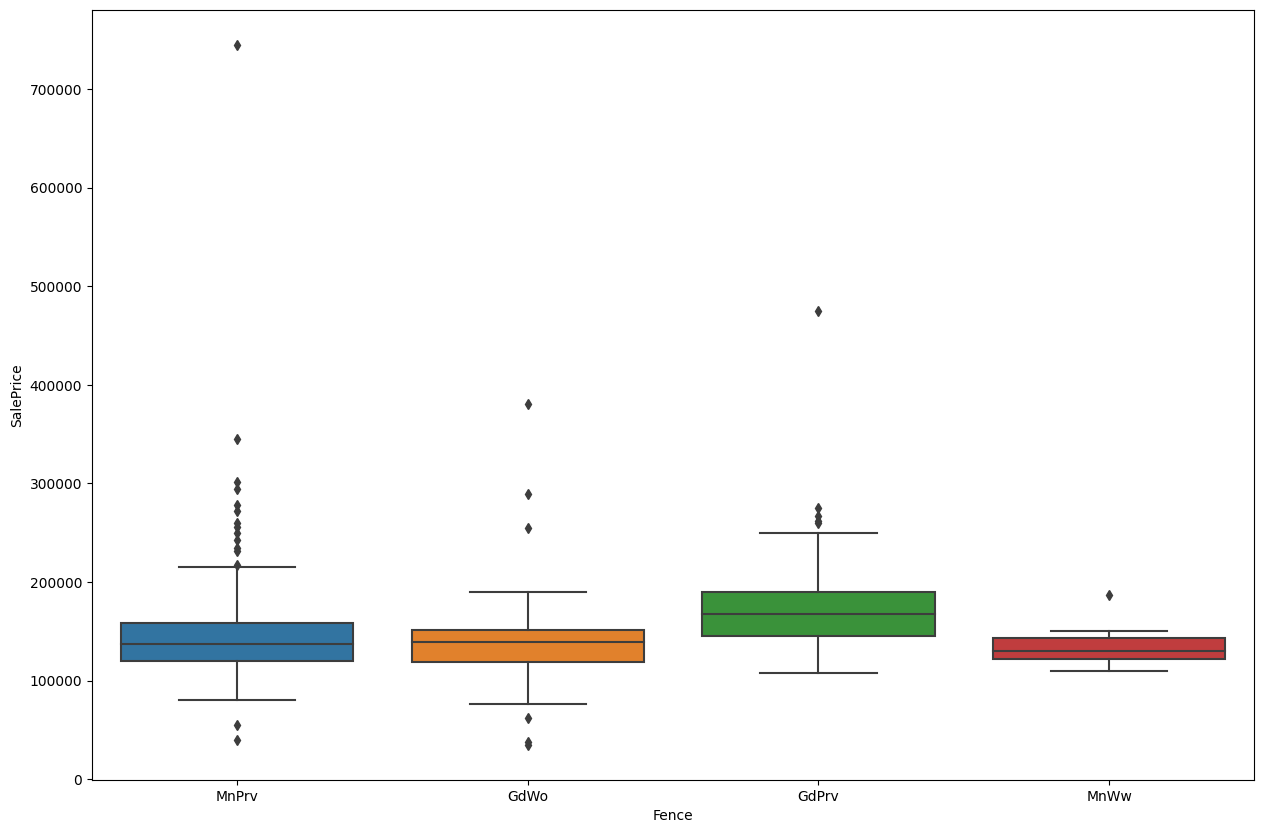

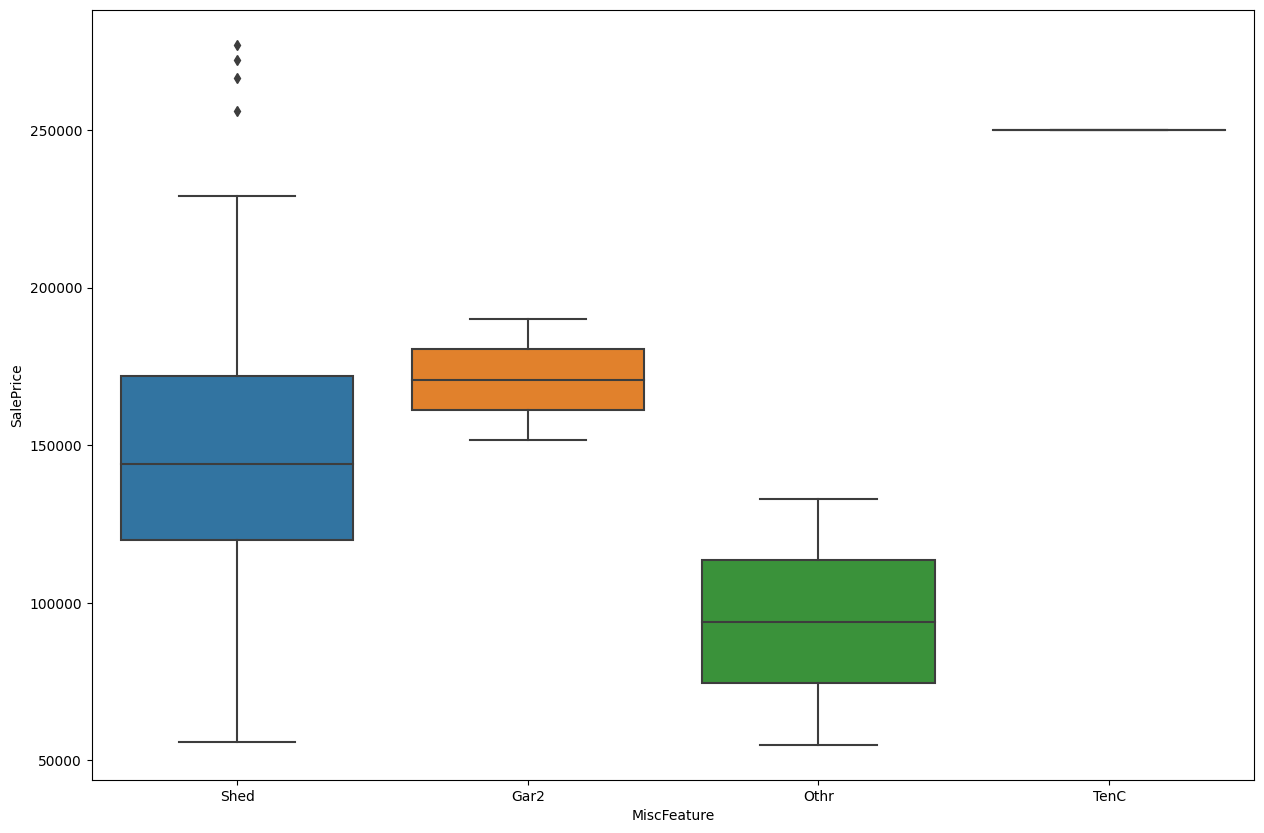

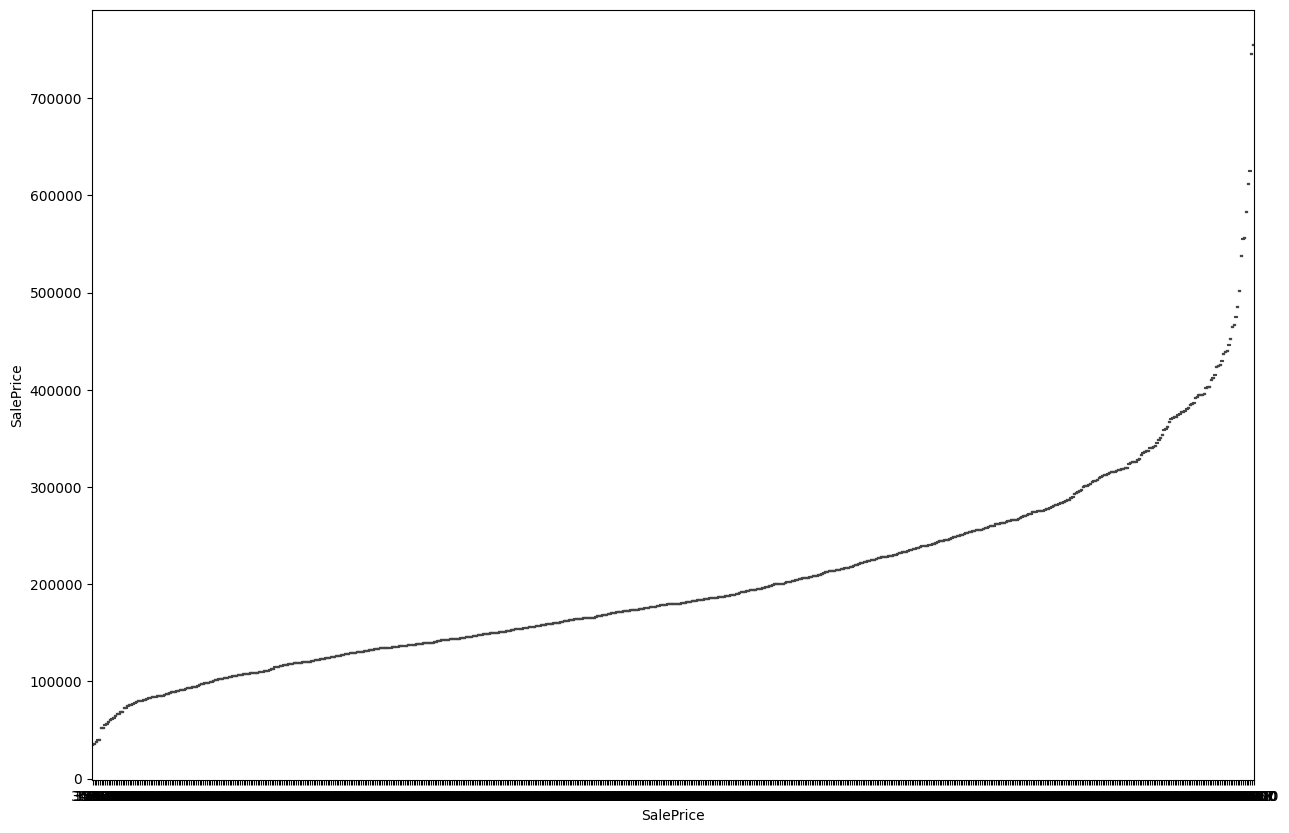

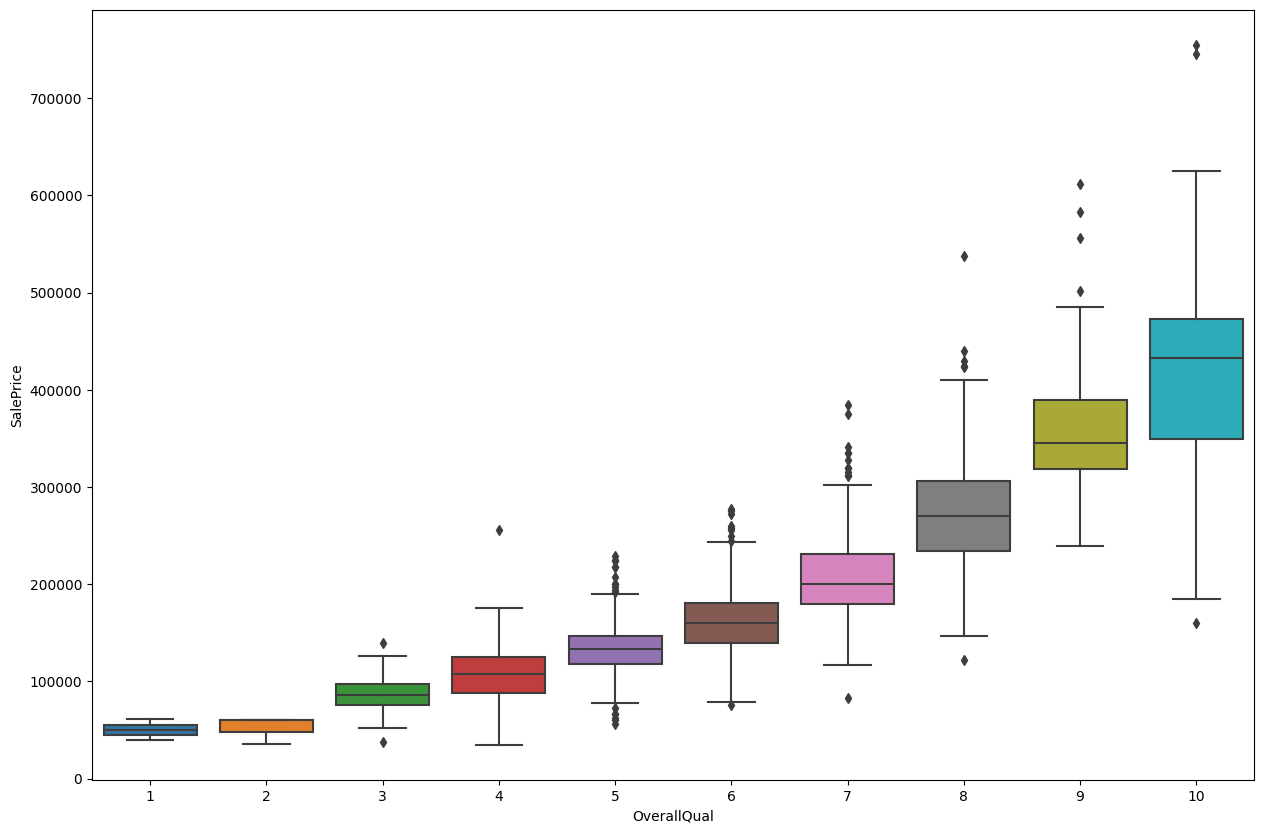

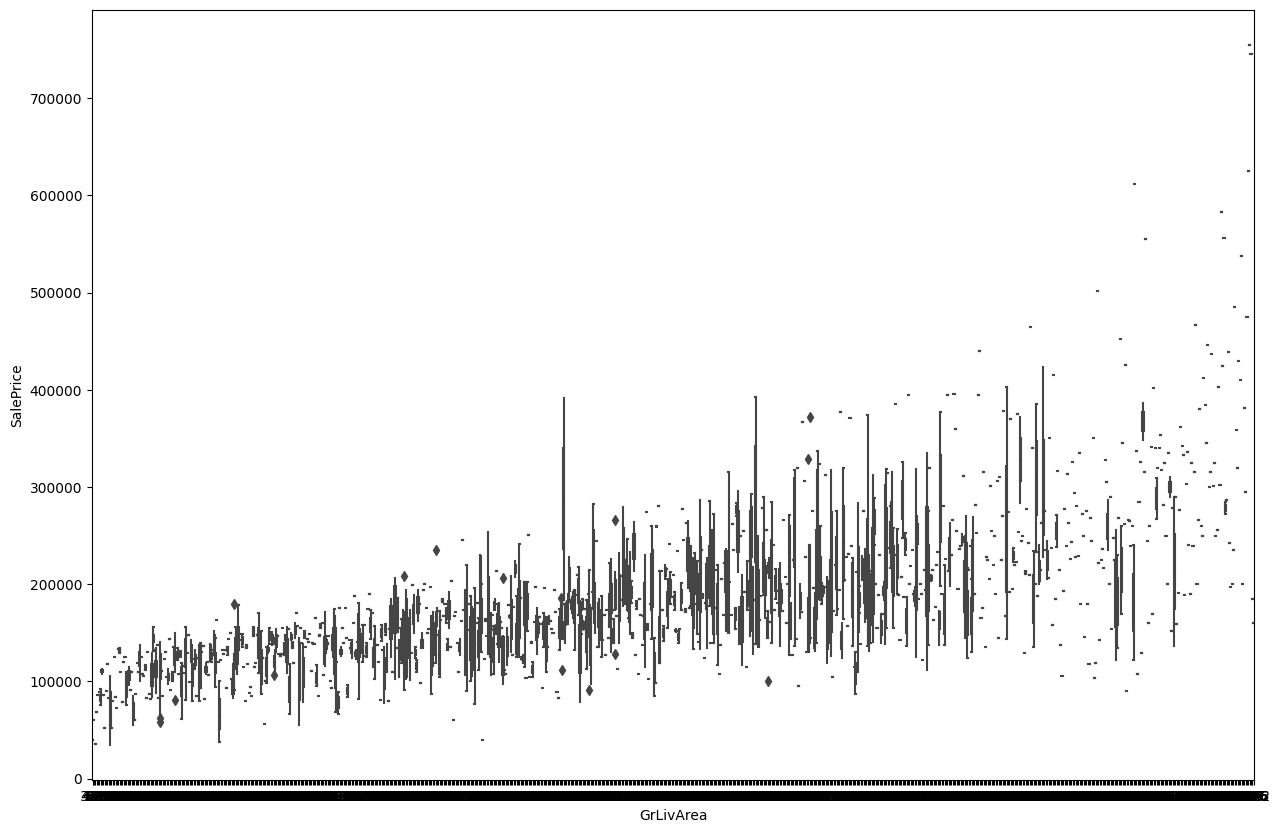

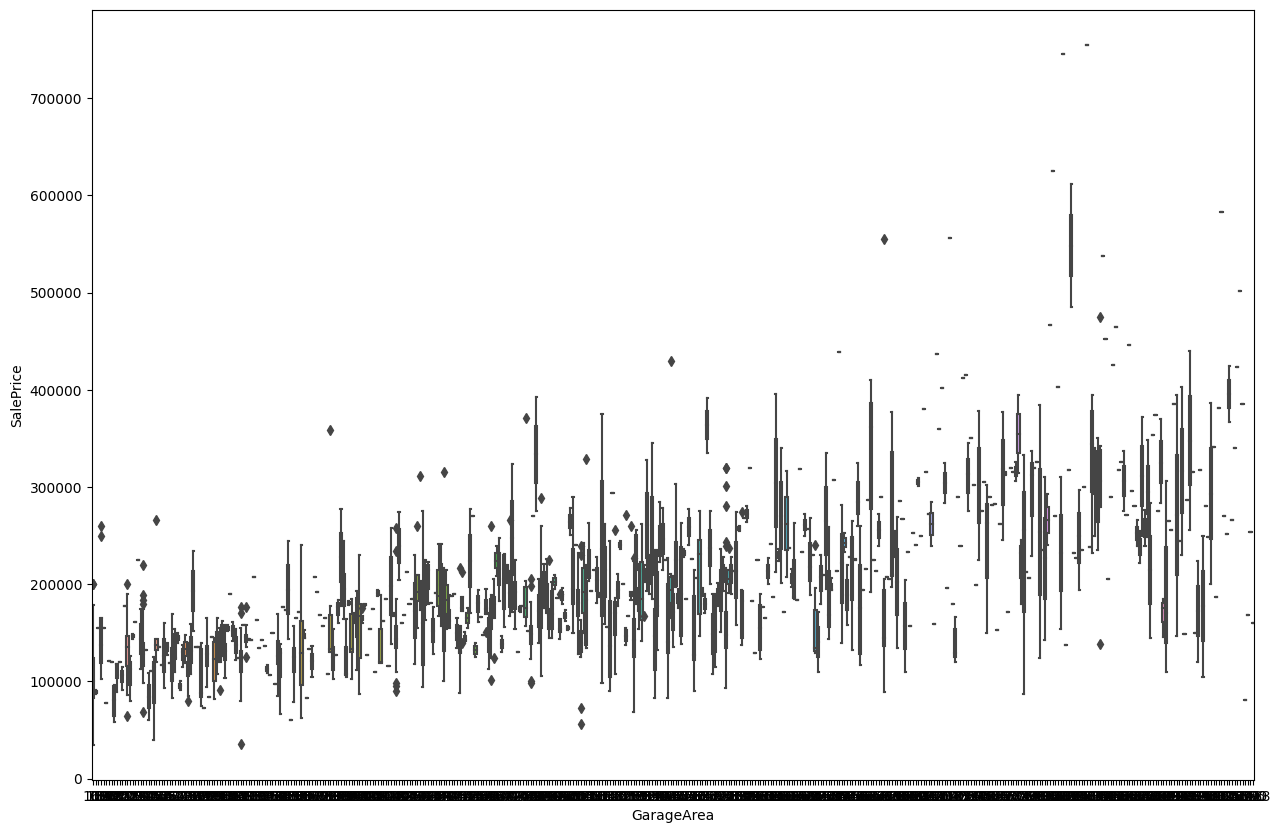

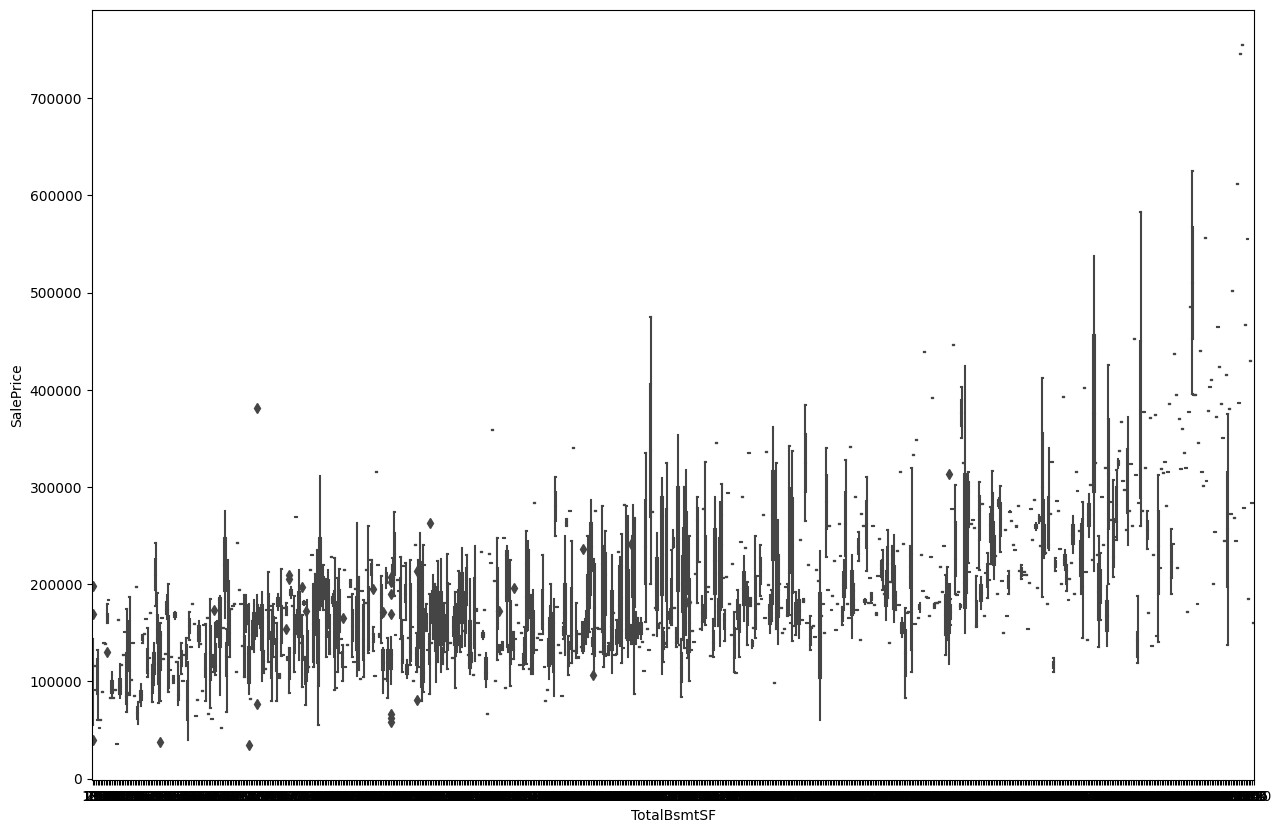

In [51]:
for cols in inp_df.columns:
    plt.figure(figsize=(15,10))
    plt.xticks()
    sns.boxplot(cols,'SalePrice',data=df)